# Business Case #2 - Predict Hotel Booking Cancellations

## Authors:
#### Débora Santos (m20200748), Diana Furtado (m20200590),Pedro Henrique Medeiros (m20200742), Rebeca Pinheiro (m20201096)

#### Group D - D4B Consulting

### Installing and import packages

Maybe it will be necessary install some 'special' packages to this notebook works. 

Please follow the next cells and check if it's necessary

In [1]:
#IMPORT LIBRARIES
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from os.path import join
%matplotlib inline
from collections import Counter
from itertools import product
from math import ceil
import warnings
warnings.filterwarnings("ignore")

# Seeting seaborn style
sns.set()

#Missing values
from sklearn.impute import KNNImputer
#Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder, RobustScaler

#Correlation matrix/Visualizations
import phik
import matplotlib.cm as cm
from sklearn.metrics import pairwise_distances
from pandas_profiling import ProfileReport 
%config InlineBackend.figure_format = 'retina' 

#outliers detection
from scipy.stats import iqr as IQR
from scipy import stats
from sklearn.neighbors import LocalOutlierFactor
from sklearn import svm
from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeClassifier

# split the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GroupShuffleSplit


# data preparation
from sklearn.feature_selection import VarianceThreshold 
from sklearn.pipeline import Pipeline

# feature selection
from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_classif

# model selection


# predictive models
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# plot data
from matplotlib import pyplot


# metrics results
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix

Collect initial data

In [2]:
#import dataset
df = pd.read_csv('H2.csv',sep=",")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Describe, explore and assess data quality

In [3]:
# First look at the dataframe
df.head()

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  StaysInWeekNights  Adults  Children  Babies       Meal Country  MarketSegment DistributionChannel  IsRepeatedGuest  PreviousCancellations  PreviousBookingsNotCanceled  ReservedRoomType  AssignedRoomType  BookingChanges      DepositType        Agent      Company  DaysInWaitingList CustomerType   ADR  RequiredCarParkingSpaces  TotalOfSpecialRequests ReservationStatus ReservationStatusDate
0           0         6             2015             July                     27                      1                     0                  2       1       0.0       0  HB            PRT  Offline TA/TO               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 6         NULL                  0    Transient   0.0                         0                       0         Check-Out            2015-07-03
1           1        88             2015             July                     27                      1                     0                  4       2       0.0       0  BB            PRT      Online TA               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 9         NULL                  0    Transient  76.5                         0                       1          Canceled            2015-07-01
2           1        65             2015             July                     27                      1                     0                  4       1       0.0       0  BB            PRT      Online TA               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 9         NULL                  0    Transient  68.0                         0                       1          Canceled            2015-04-30
3           1        92             2015             July                     27                      1                     2                  4       2       0.0       0  BB            PRT      Online TA               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 9         NULL                  0    Transient  76.5                         0                       2          Canceled            2015-06-23
4           1       100             2015             July                     27                      2                     0                  2       2       0.0       0  BB            PRT      Online TA               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 9         NULL                  0    Transient  76.5                         0                       1          Canceled            2015-04-02

In [4]:
# First look at the dataframe
df.tail()

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  StaysInWeekNights  Adults  Children  Babies       Meal Country  MarketSegment DistributionChannel  IsRepeatedGuest  PreviousCancellations  PreviousBookingsNotCanceled  ReservedRoomType  AssignedRoomType  BookingChanges      DepositType        Agent      Company  DaysInWaitingList CustomerType     ADR  RequiredCarParkingSpaces  TotalOfSpecialRequests ReservationStatus ReservationStatusDate
79325           0        23             2017           August                     35                     30                     2                  5       2       0.0       0  BB            BEL  Offline TA/TO               TA/TO                0                      0                            0  A                 A                              0  No Deposit               394         NULL                  0    Transient   96.14                         0                       0         Check-Out            2017-09-06
79326           0       102             2017           August                     35                     31                     2                  5       3       0.0       0  BB            FRA      Online TA               TA/TO                0                      0                            0  E                 E                              0  No Deposit                 9         NULL                  0    Transient  225.43                         0                       2         Check-Out            2017-09-07
79327           0        34             2017           August                     35                     31                     2                  5       2       0.0       0  BB            DEU      Online TA               TA/TO                0                      0                            0  D                 D                              0  No Deposit                 9         NULL                  0    Transient  157.71                         0                       4         Check-Out            2017-09-07
79328           0       109             2017           August                     35                     31                     2                  5       2       0.0       0  BB            GBR      Online TA               TA/TO                0                      0                            0  A                 A                              0  No Deposit                89         NULL                  0    Transient  104.40                         0                       0         Check-Out            2017-09-07
79329           0       205             2017           August                     35                     29                     2                  7       2       0.0       0  HB            DEU      Online TA               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 9         NULL                  0    Transient  151.20                         0                       2         Check-Out            2017-09-07

In [5]:
# Data types and null values verification
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [6]:
# Summary statistics for all variables
df.describe(include='all').transpose()

count unique               top   freq        mean        std   min   25%   50%   75%   max
IsCanceled                   79330    NaN               NaN    NaN     0.41727   0.493111     0     0     0     1     1
LeadTime                     79330    NaN               NaN    NaN     109.736    110.949     0    23    74   163   629
ArrivalDateYear              79330    NaN               NaN    NaN     2016.17   0.699181  2015  2016  2016  2017  2017
ArrivalDateMonth             79330     12            August   8983         NaN        NaN   NaN   NaN   NaN   NaN   NaN
ArrivalDateWeekNumber        79330    NaN               NaN    NaN     27.1774    13.3985     1    17    27    38    53
ArrivalDateDayOfMonth        79330    NaN               NaN    NaN     15.7866    8.72845     1     8    16    23    31
StaysInWeekendNights         79330    NaN               NaN    NaN    0.795185   0.885026     0     0     1     2    16
StaysInWeekNights            79330    NaN               NaN    NaN     2.18296    1.45642     0     1     2     3    41
Adults                       79330    NaN               NaN    NaN     1.85098   0.509292     0     2     2     2     4
Children                     79326    NaN               NaN    NaN   0.0913698   0.372177     0     0     0     0     3
Babies                       79330    NaN               NaN    NaN  0.00494138  0.0843233     0     0     0     0    10
Meal                         79330      4         BB         62305         NaN        NaN   NaN   NaN   NaN   NaN   NaN
Country                      79306    166               PRT  30960         NaN        NaN   NaN   NaN   NaN   NaN   NaN
MarketSegment                79330      8         Online TA  38748         NaN        NaN   NaN   NaN   NaN   NaN   NaN
DistributionChannel          79330      5             TA/TO  68945         NaN        NaN   NaN   NaN   NaN   NaN   NaN
IsRepeatedGuest              79330    NaN               NaN    NaN   0.0256145   0.157983     0     0     0     0     1
PreviousCancellations        79330    NaN               NaN    NaN   0.0797428   0.415472     0     0     0     0    21
PreviousBookingsNotCanceled  79330    NaN               NaN    NaN    0.132371    1.69341     0     0     0     0    72
ReservedRoomType             79330      8  A                 62595         NaN        NaN   NaN   NaN   NaN   NaN   NaN
AssignedRoomType             79330      9  A                 57007         NaN        NaN   NaN   NaN   NaN   NaN   NaN
BookingChanges               79330    NaN               NaN    NaN    0.187369    0.60862     0     0     0     0    21
DepositType                  79330      3   No Deposit       66442         NaN        NaN   NaN   NaN   NaN   NaN   NaN
Agent                        79330    224                 9  31955         NaN        NaN   NaN   NaN   NaN   NaN   NaN
Company                      79330    208              NULL  75641         NaN        NaN   NaN   NaN   NaN   NaN   NaN
DaysInWaitingList            79330    NaN               NaN    NaN     3.22677    20.8709     0     0     0     0   391
CustomerType                 79330      4         Transient  59404         NaN        NaN   NaN   NaN   NaN   NaN   NaN
ADR                          79330    NaN               NaN    NaN     105.304     43.603     0  79.2  99.9   126  5400
RequiredCarParkingSpaces     79330    NaN               NaN    NaN   0.0243666   0.154919     0     0     0     0     3
TotalOfSpecialRequests       79330    NaN               NaN    NaN    0.546918   0.780776     0     0     0     1     5
ReservationStatus            79330      3         Check-Out  46228         NaN        NaN   NaN   NaN   NaN   NaN   NaN
ReservationStatusDate        79330    864        2015-10-21   1416         NaN        NaN   NaN   NaN   NaN   NaN   NaN

In [7]:
#PANDAS PROFILING.

#prof = ProfileReport(df)
#prof.to_file(output_file='H2_Profile.html')

In [8]:
# Replace possible empty values with NaN
df.replace("", np.nan, inplace=True)

# Function to show missing values and their percentages
def missing_data(df):
    l = []
    for col in df.columns:
        missing = df[col].isnull().sum(axis=0)
        percentage = missing/df.shape[0]
        l.append([col,missing,percentage*100])
        df_missing = pd.DataFrame(l, columns = ['Feature','missing','percentage'])
        df_missing = df_missing.sort_values('missing',axis=0, ascending = False)    
    return df_missing

# Check the percentage of missing values
df_missing = missing_data(df)
df_missing = df_missing[df_missing['missing']>0]
df_missing

Feature  missing  percentage
12   Country       24    0.030253
9   Children        4    0.005042

In [9]:
# Check duplicated observations
df.loc[df.duplicated(keep=False), :]

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  StaysInWeekNights  Adults  Children  Babies       Meal Country  MarketSegment DistributionChannel  IsRepeatedGuest  PreviousCancellations  PreviousBookingsNotCanceled  ReservedRoomType  AssignedRoomType  BookingChanges      DepositType        Agent      Company  DaysInWaitingList     CustomerType     ADR  RequiredCarParkingSpaces  TotalOfSpecialRequests ReservationStatus ReservationStatusDate
8               1        62             2015             July                     27                      2                     2                  3       2       0.0       0  BB            PRT      Online TA               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 8         NULL                  0        Transient   76.50                         0                       1           No-Show            2015-07-02
9               1        62             2015             July                     27                      2                     2                  3       2       0.0       0  BB            PRT      Online TA               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 8         NULL                  0        Transient   76.50                         0                       1           No-Show            2015-07-02
10              0        43             2015             July                     27                      3                     0                  2       2       0.0       0  HB            PRT         Groups               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 1         NULL                  0  Transient-Party   86.00                         0                       0         Check-Out            2015-07-05
12              0        43             2015             July                     27                      3                     0                  2       2       0.0       0  HB            PRT         Groups               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 1         NULL                  0  Transient-Party   86.00                         0                       0         Check-Out            2015-07-05
17              0        43             2015             July                     27                      3                     0                  2       2       0.0       0  HB            PRT         Groups               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 1         NULL                  0  Transient-Party   86.00                         0                       0         Check-Out            2015-07-05
...           ...       ...              ...              ...                    ...                    ...                   ...                ...     ...       ...     ...        ...     ...            ...                 ...              ...                    ...                          ...               ...               ...             ...              ...          ...          ...                ...              ...     ...                       ...                     ...               ...                   ...
79292           0        63             2017           August                     35                     31                     0                  3       3       0.0       0  BB            SWE      Online TA               TA/TO                0                      0                            0  D                 D

#### Some preprocessing

In [10]:
# Make a copy of the dataframe
df1 = df.copy()
# Drop rows with missing values (28 rows, representing 0.035% of the dataset - including Children=NA)
df1 = df1.dropna()

In [11]:
# Drop ADR == 5400 (1 row)
df1 = df1[df1['ADR']!=5400]

In [12]:
# Drop the reservations with 0 adults (382 rows (0.48% of the dataset))
df1 = df1[df1['Adults']!=0]
df1

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  StaysInWeekNights  Adults  Children  Babies       Meal Country  MarketSegment DistributionChannel  IsRepeatedGuest  PreviousCancellations  PreviousBookingsNotCanceled  ReservedRoomType  AssignedRoomType  BookingChanges      DepositType        Agent      Company  DaysInWaitingList CustomerType     ADR  RequiredCarParkingSpaces  TotalOfSpecialRequests ReservationStatus ReservationStatusDate
0               0         6             2015             July                     27                      1                     0                  2       1       0.0       0  HB            PRT  Offline TA/TO               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 6         NULL                  0    Transient    0.00                         0                       0         Check-Out            2015-07-03
1               1        88             2015             July                     27                      1                     0                  4       2       0.0       0  BB            PRT      Online TA               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 9         NULL                  0    Transient   76.50                         0                       1          Canceled            2015-07-01
2               1        65             2015             July                     27                      1                     0                  4       1       0.0       0  BB            PRT      Online TA               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 9         NULL                  0    Transient   68.00                         0                       1          Canceled            2015-04-30
3               1        92             2015             July                     27                      1                     2                  4       2       0.0       0  BB            PRT      Online TA               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 9         NULL                  0    Transient   76.50                         0                       2          Canceled            2015-06-23
4               1       100             2015             July                     27                      2                     0                  2       2       0.0       0  BB            PRT      Online TA               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 9         NULL                  0    Transient   76.50                         0                       1          Canceled            2015-04-02
...           ...       ...              ...              ...                    ...                    ...                   ...                ...     ...       ...     ...        ...     ...            ...                 ...              ...                    ...                          ...               ...               ...             ...              ...          ...          ...                ...          ...     ...                       ...                     ...               ...                   ...
79325           0        23             2017           August                     35                     30                     2                  5       2       0.0       0  BB            BEL  Offline TA/TO               TA/TO                0                      0                            0  A                 A                            

#### Some feature engineering

In [13]:
# Creation the 2 new variables
# Creates two new variables Days_before_cancel and Days_until_cancel
df1['ArrivalDate'] = df1['ArrivalDateYear'].map(str) + '-' + df['ArrivalDateMonth'].map(str) + '-' + df['ArrivalDateDayOfMonth'].map(str)
df1

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  StaysInWeekNights  Adults  Children  Babies       Meal Country  MarketSegment DistributionChannel  IsRepeatedGuest  PreviousCancellations  PreviousBookingsNotCanceled  ReservedRoomType  AssignedRoomType  BookingChanges      DepositType        Agent      Company  DaysInWaitingList CustomerType     ADR  RequiredCarParkingSpaces  TotalOfSpecialRequests ReservationStatus ReservationStatusDate     ArrivalDate
0               0         6             2015             July                     27                      1                     0                  2       1       0.0       0  HB            PRT  Offline TA/TO               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 6         NULL                  0    Transient    0.00                         0                       0         Check-Out            2015-07-03     2015-July-1
1               1        88             2015             July                     27                      1                     0                  4       2       0.0       0  BB            PRT      Online TA               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 9         NULL                  0    Transient   76.50                         0                       1          Canceled            2015-07-01     2015-July-1
2               1        65             2015             July                     27                      1                     0                  4       1       0.0       0  BB            PRT      Online TA               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 9         NULL                  0    Transient   68.00                         0                       1          Canceled            2015-04-30     2015-July-1
3               1        92             2015             July                     27                      1                     2                  4       2       0.0       0  BB            PRT      Online TA               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 9         NULL                  0    Transient   76.50                         0                       2          Canceled            2015-06-23     2015-July-1
4               1       100             2015             July                     27                      2                     0                  2       2       0.0       0  BB            PRT      Online TA               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 9         NULL                  0    Transient   76.50                         0                       1          Canceled            2015-04-02     2015-July-2
...           ...       ...              ...              ...                    ...                    ...                   ...                ...     ...       ...     ...        ...     ...            ...                 ...              ...                    ...                          ...               ...               ...             ...              ...          ...          ...                ...          ...     ...                       ...                     ...               ...                   ...             ...
79325           0        23             2017           August                     35                     30                     2                  5       2       0.0       0  BB            BEL  Offline TA/TO               TA/TO      

In [14]:
# Transform ReservationStatusDate and ArrivalDate to datetime
df1['ReservationStatusDate'] =  pd.to_datetime(df1['ReservationStatusDate'])
df1['ArrivalDate'] =  pd.to_datetime(df1['ArrivalDate'])
# Creates new variable DateDifference (difference between the Arrival date and the last status update date)
df1['DateDifference'] = (pd.DatetimeIndex(df1['ArrivalDate'])-pd.DatetimeIndex(df1['ReservationStatusDate'])).days

In [15]:
df1['Days_before_cancel'] = np.where(df1['ReservationStatus']=='Canceled', df1['DateDifference'], 0)

In [16]:
# Creates new variable Days_until_cancel (LeadTime minus DateDifference)
df1['Days_until_cancel'] = np.where(df1['ReservationStatus']=='Canceled', df1['LeadTime'].sub(df1['DateDifference'], axis=0), 0)
df1.head(5)

IsCanceled  LeadTime  ArrivalDateYear ArrivalDateMonth  ArrivalDateWeekNumber  ArrivalDateDayOfMonth  StaysInWeekendNights  StaysInWeekNights  Adults  Children  Babies       Meal Country  MarketSegment DistributionChannel  IsRepeatedGuest  PreviousCancellations  PreviousBookingsNotCanceled  ReservedRoomType  AssignedRoomType  BookingChanges      DepositType        Agent      Company  DaysInWaitingList CustomerType   ADR  RequiredCarParkingSpaces  TotalOfSpecialRequests ReservationStatus ReservationStatusDate ArrivalDate  DateDifference  Days_before_cancel  Days_until_cancel
0           0         6             2015             July                     27                      1                     0                  2       1       0.0       0  HB            PRT  Offline TA/TO               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 6         NULL                  0    Transient   0.0                         0                       0         Check-Out            2015-07-03  2015-07-01              -2                   0                  0
1           1        88             2015             July                     27                      1                     0                  4       2       0.0       0  BB            PRT      Online TA               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 9         NULL                  0    Transient  76.5                         0                       1          Canceled            2015-07-01  2015-07-01               0                   0                 88
2           1        65             2015             July                     27                      1                     0                  4       1       0.0       0  BB            PRT      Online TA               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 9         NULL                  0    Transient  68.0                         0                       1          Canceled            2015-04-30  2015-07-01              62                  62                  3
3           1        92             2015             July                     27                      1                     2                  4       2       0.0       0  BB            PRT      Online TA               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 9         NULL                  0    Transient  76.5                         0                       2          Canceled            2015-06-23  2015-07-01               8                   8                 84
4           1       100             2015             July                     27                      2                     0                  2       2       0.0       0  BB            PRT      Online TA               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 9         NULL                  0    Transient  76.5                         0                       1          Canceled            2015-04-02  2015-07-02              91                  91                  9

In [17]:
# We decided to drop variables DateDifference, ArrivalDate, ArrivalDateYear, ArrivalDateWeekNumber, ArrivalDateDayOfMonth as they won't be relevant for this analysis
# However we decided to keep ArrivalDateMonth
# We dropped variable Country as it has quality issues
df1.drop(['DateDifference','ArrivalDateYear','ArrivalDateWeekNumber','ArrivalDateDayOfMonth','ArrivalDate','Country'], axis=1, inplace=True)
df1

IsCanceled  LeadTime ArrivalDateMonth  StaysInWeekendNights  StaysInWeekNights  Adults  Children  Babies       Meal  MarketSegment DistributionChannel  IsRepeatedGuest  PreviousCancellations  PreviousBookingsNotCanceled  ReservedRoomType  AssignedRoomType  BookingChanges      DepositType        Agent      Company  DaysInWaitingList CustomerType     ADR  RequiredCarParkingSpaces  TotalOfSpecialRequests ReservationStatus ReservationStatusDate  Days_before_cancel  Days_until_cancel
0               0         6             July                     0                  2       1       0.0       0  HB         Offline TA/TO               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 6         NULL                  0    Transient    0.00                         0                       0         Check-Out            2015-07-03                   0                  0
1               1        88             July                     0                  4       2       0.0       0  BB             Online TA               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 9         NULL                  0    Transient   76.50                         0                       1          Canceled            2015-07-01                   0                 88
2               1        65             July                     0                  4       1       0.0       0  BB             Online TA               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 9         NULL                  0    Transient   68.00                         0                       1          Canceled            2015-04-30                  62                  3
3               1        92             July                     2                  4       2       0.0       0  BB             Online TA               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 9         NULL                  0    Transient   76.50                         0                       2          Canceled            2015-06-23                   8                 84
4               1       100             July                     0                  2       2       0.0       0  BB             Online TA               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 9         NULL                  0    Transient   76.50                         0                       1          Canceled            2015-04-02                  91                  9
...           ...       ...              ...                   ...                ...     ...       ...     ...        ...            ...                 ...              ...                    ...                          ...               ...               ...             ...              ...          ...          ...                ...          ...     ...                       ...                     ...               ...                   ...                 ...                ...
79325           0        23           August                     2                  5       2       0.0       0  BB         Offline TA/TO               TA/TO                0                      0                            0  A                 A                              0  No Deposit               394         NULL                  0    Transient   96.14                         0                       0         Check-Out            2017-09-06                   0                  0
79326           0       102           August                     2             

In [18]:
# Room type - Creates a new feature where 1 if ReservedRoomType=AssignedRoomType; 0 otherwise
df1['RoomType_change'] = np.where(df1['ReservedRoomType'] == df1['AssignedRoomType'], 0, 1)
df1

IsCanceled  LeadTime ArrivalDateMonth  StaysInWeekendNights  StaysInWeekNights  Adults  Children  Babies       Meal  MarketSegment DistributionChannel  IsRepeatedGuest  PreviousCancellations  PreviousBookingsNotCanceled  ReservedRoomType  AssignedRoomType  BookingChanges      DepositType        Agent      Company  DaysInWaitingList CustomerType     ADR  RequiredCarParkingSpaces  TotalOfSpecialRequests ReservationStatus ReservationStatusDate  Days_before_cancel  Days_until_cancel  RoomType_change
0               0         6             July                     0                  2       1       0.0       0  HB         Offline TA/TO               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 6         NULL                  0    Transient    0.00                         0                       0         Check-Out            2015-07-03                   0                  0                0
1               1        88             July                     0                  4       2       0.0       0  BB             Online TA               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 9         NULL                  0    Transient   76.50                         0                       1          Canceled            2015-07-01                   0                 88                0
2               1        65             July                     0                  4       1       0.0       0  BB             Online TA               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 9         NULL                  0    Transient   68.00                         0                       1          Canceled            2015-04-30                  62                  3                0
3               1        92             July                     2                  4       2       0.0       0  BB             Online TA               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 9         NULL                  0    Transient   76.50                         0                       2          Canceled            2015-06-23                   8                 84                0
4               1       100             July                     0                  2       2       0.0       0  BB             Online TA               TA/TO                0                      0                            0  A                 A                              0  No Deposit                 9         NULL                  0    Transient   76.50                         0                       1          Canceled            2015-04-02                  91                  9                0
...           ...       ...              ...                   ...                ...     ...       ...     ...        ...            ...                 ...              ...                    ...                          ...               ...               ...             ...              ...          ...          ...                ...          ...     ...                       ...                     ...               ...                   ...                 ...                ...              ...
79325           0        23           August                     2                  5       2       0.0       0  BB         Offline TA/TO               TA/TO                0                      0                            0  A                 A                              0  No Deposit               394         NULL                  0    Transient   96.14                         0                       0         Check-Out            2017-09-06

In [19]:
# Define metric features
metric_features = ['LeadTime','ADR','DaysInWaitingList','TotalOfSpecialRequests','Adults','Children','Babies',
                   'BookingChanges','PreviousCancellations','PreviousBookingsNotCanceled','RequiredCarParkingSpaces', 
                   'StaysInWeekendNights', 'StaysInWeekNights','Days_before_cancel','Days_until_cancel']
# Define non-metric features
non_metric_features = df1.columns.drop(metric_features).to_list()

In [20]:
#Check the non_metric_features
non_metric_features

['IsCanceled',
 'ArrivalDateMonth',
 'Meal',
 'MarketSegment',
 'DistributionChannel',
 'IsRepeatedGuest',
 'ReservedRoomType',
 'AssignedRoomType',
 'DepositType',
 'Agent',
 'Company',
 'CustomerType',
 'ReservationStatus',
 'ReservationStatusDate',
 'RoomType_change']

In [21]:
#Check the metric_features
metric_features

['LeadTime',
 'ADR',
 'DaysInWaitingList',
 'TotalOfSpecialRequests',
 'Adults',
 'Children',
 'Babies',
 'BookingChanges',
 'PreviousCancellations',
 'PreviousBookingsNotCanceled',
 'RequiredCarParkingSpaces',
 'StaysInWeekendNights',
 'StaysInWeekNights',
 'Days_before_cancel',
 'Days_until_cancel']

### Correlation

##### In order to perform the model is useless and harmful to keep variables that are highly correlated with each other, because it leads to redudancy of the data. It is also useless to keep variables that are lowly correlated with the target variable as they are irrelevant to the model.
##### * Because we will be implementing a feature selection model further in the modelling part, we have decided to not drop any feature based on its low correlation with the target variable, for now.
##### * We have also checked for linear relationships in the dataset and because there are not many, we opted to use Spearman correlation in the analysis of metric features.

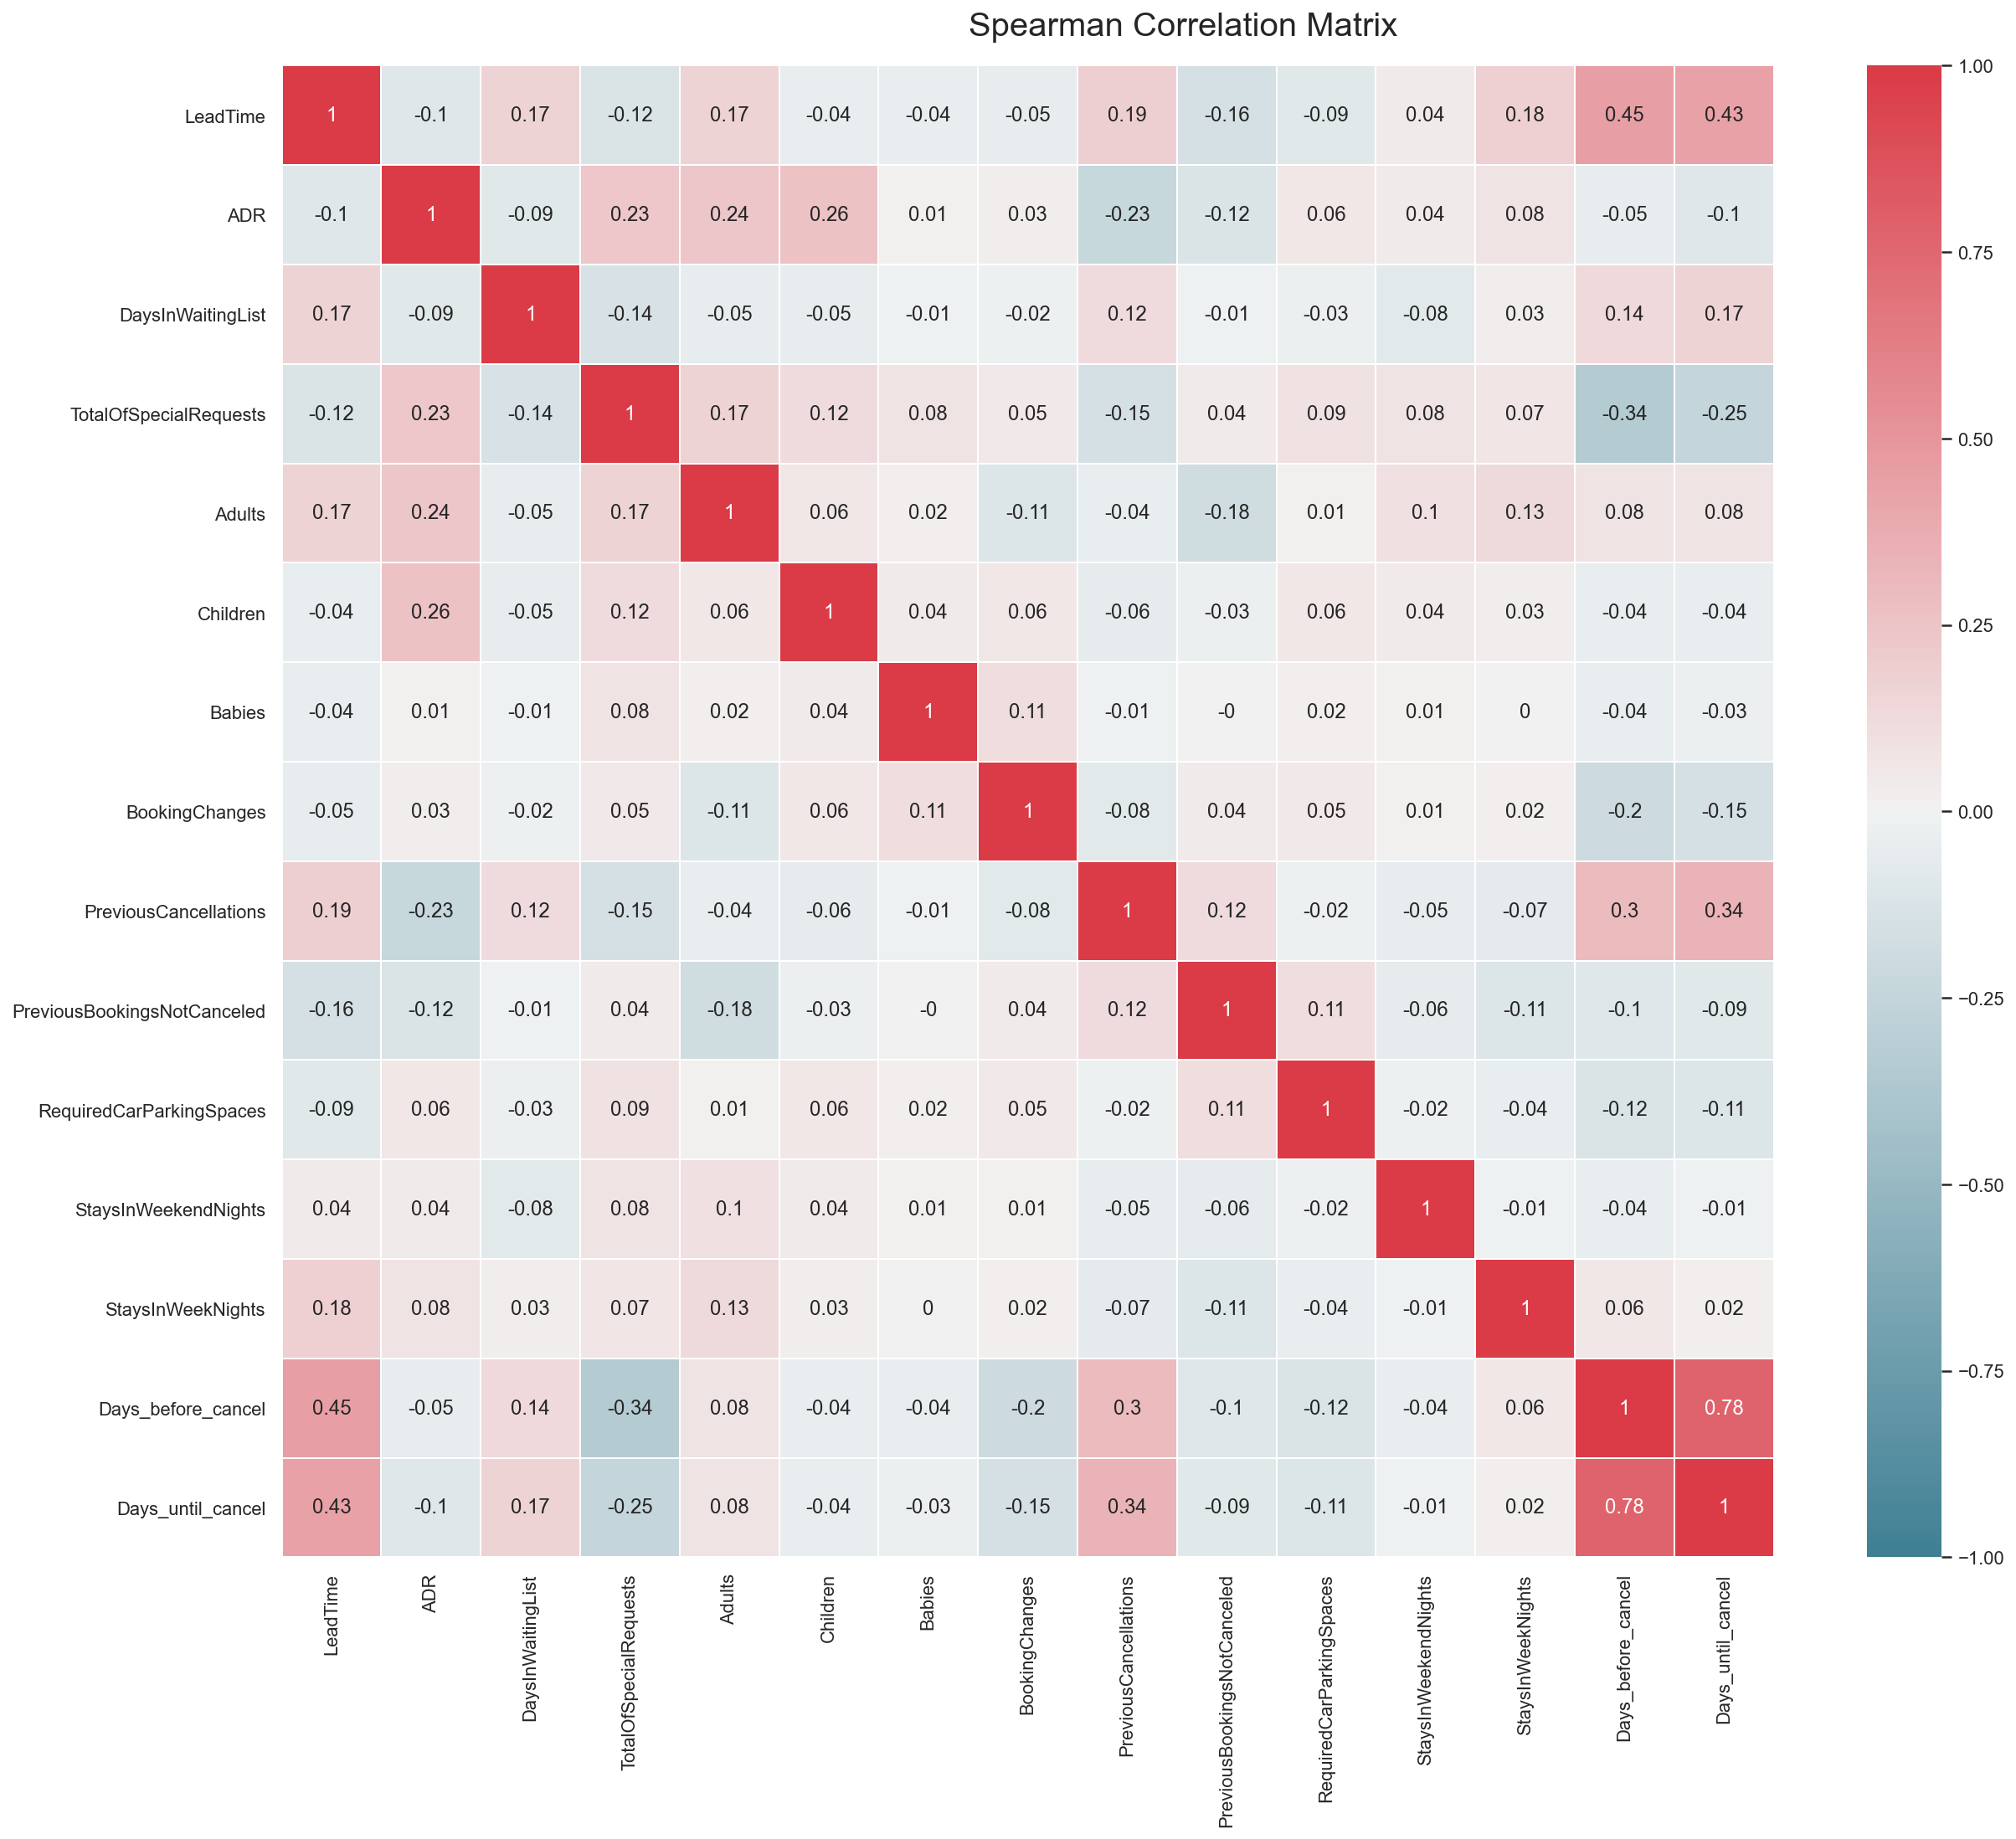

In [22]:
# Spearman Correlation matrix

# Set correlation matrix
correlation = np.round(df1[metric_features].corr(method='spearman'),2)
## Set layout
fig = plt.figure(figsize=(20, 15))
sns.heatmap(data=correlation, annot = correlation.values,cmap=sns.diverging_palette(220, 10, as_cmap=True), 
             vmin=-1, vmax=1, center=0, square=True, linewidths=.5)
fig.subplots_adjust(top=0.95)
fig.suptitle("Spearman Correlation Matrix", fontsize=20)

plt.show()

interval columns not set, guessing: ['IsCanceled', 'LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children', 'Babies', 'IsRepeatedGuest', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'BookingChanges', 'DaysInWaitingList', 'ADR', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'Days_before_cancel', 'Days_until_cancel', 'RoomType_change']


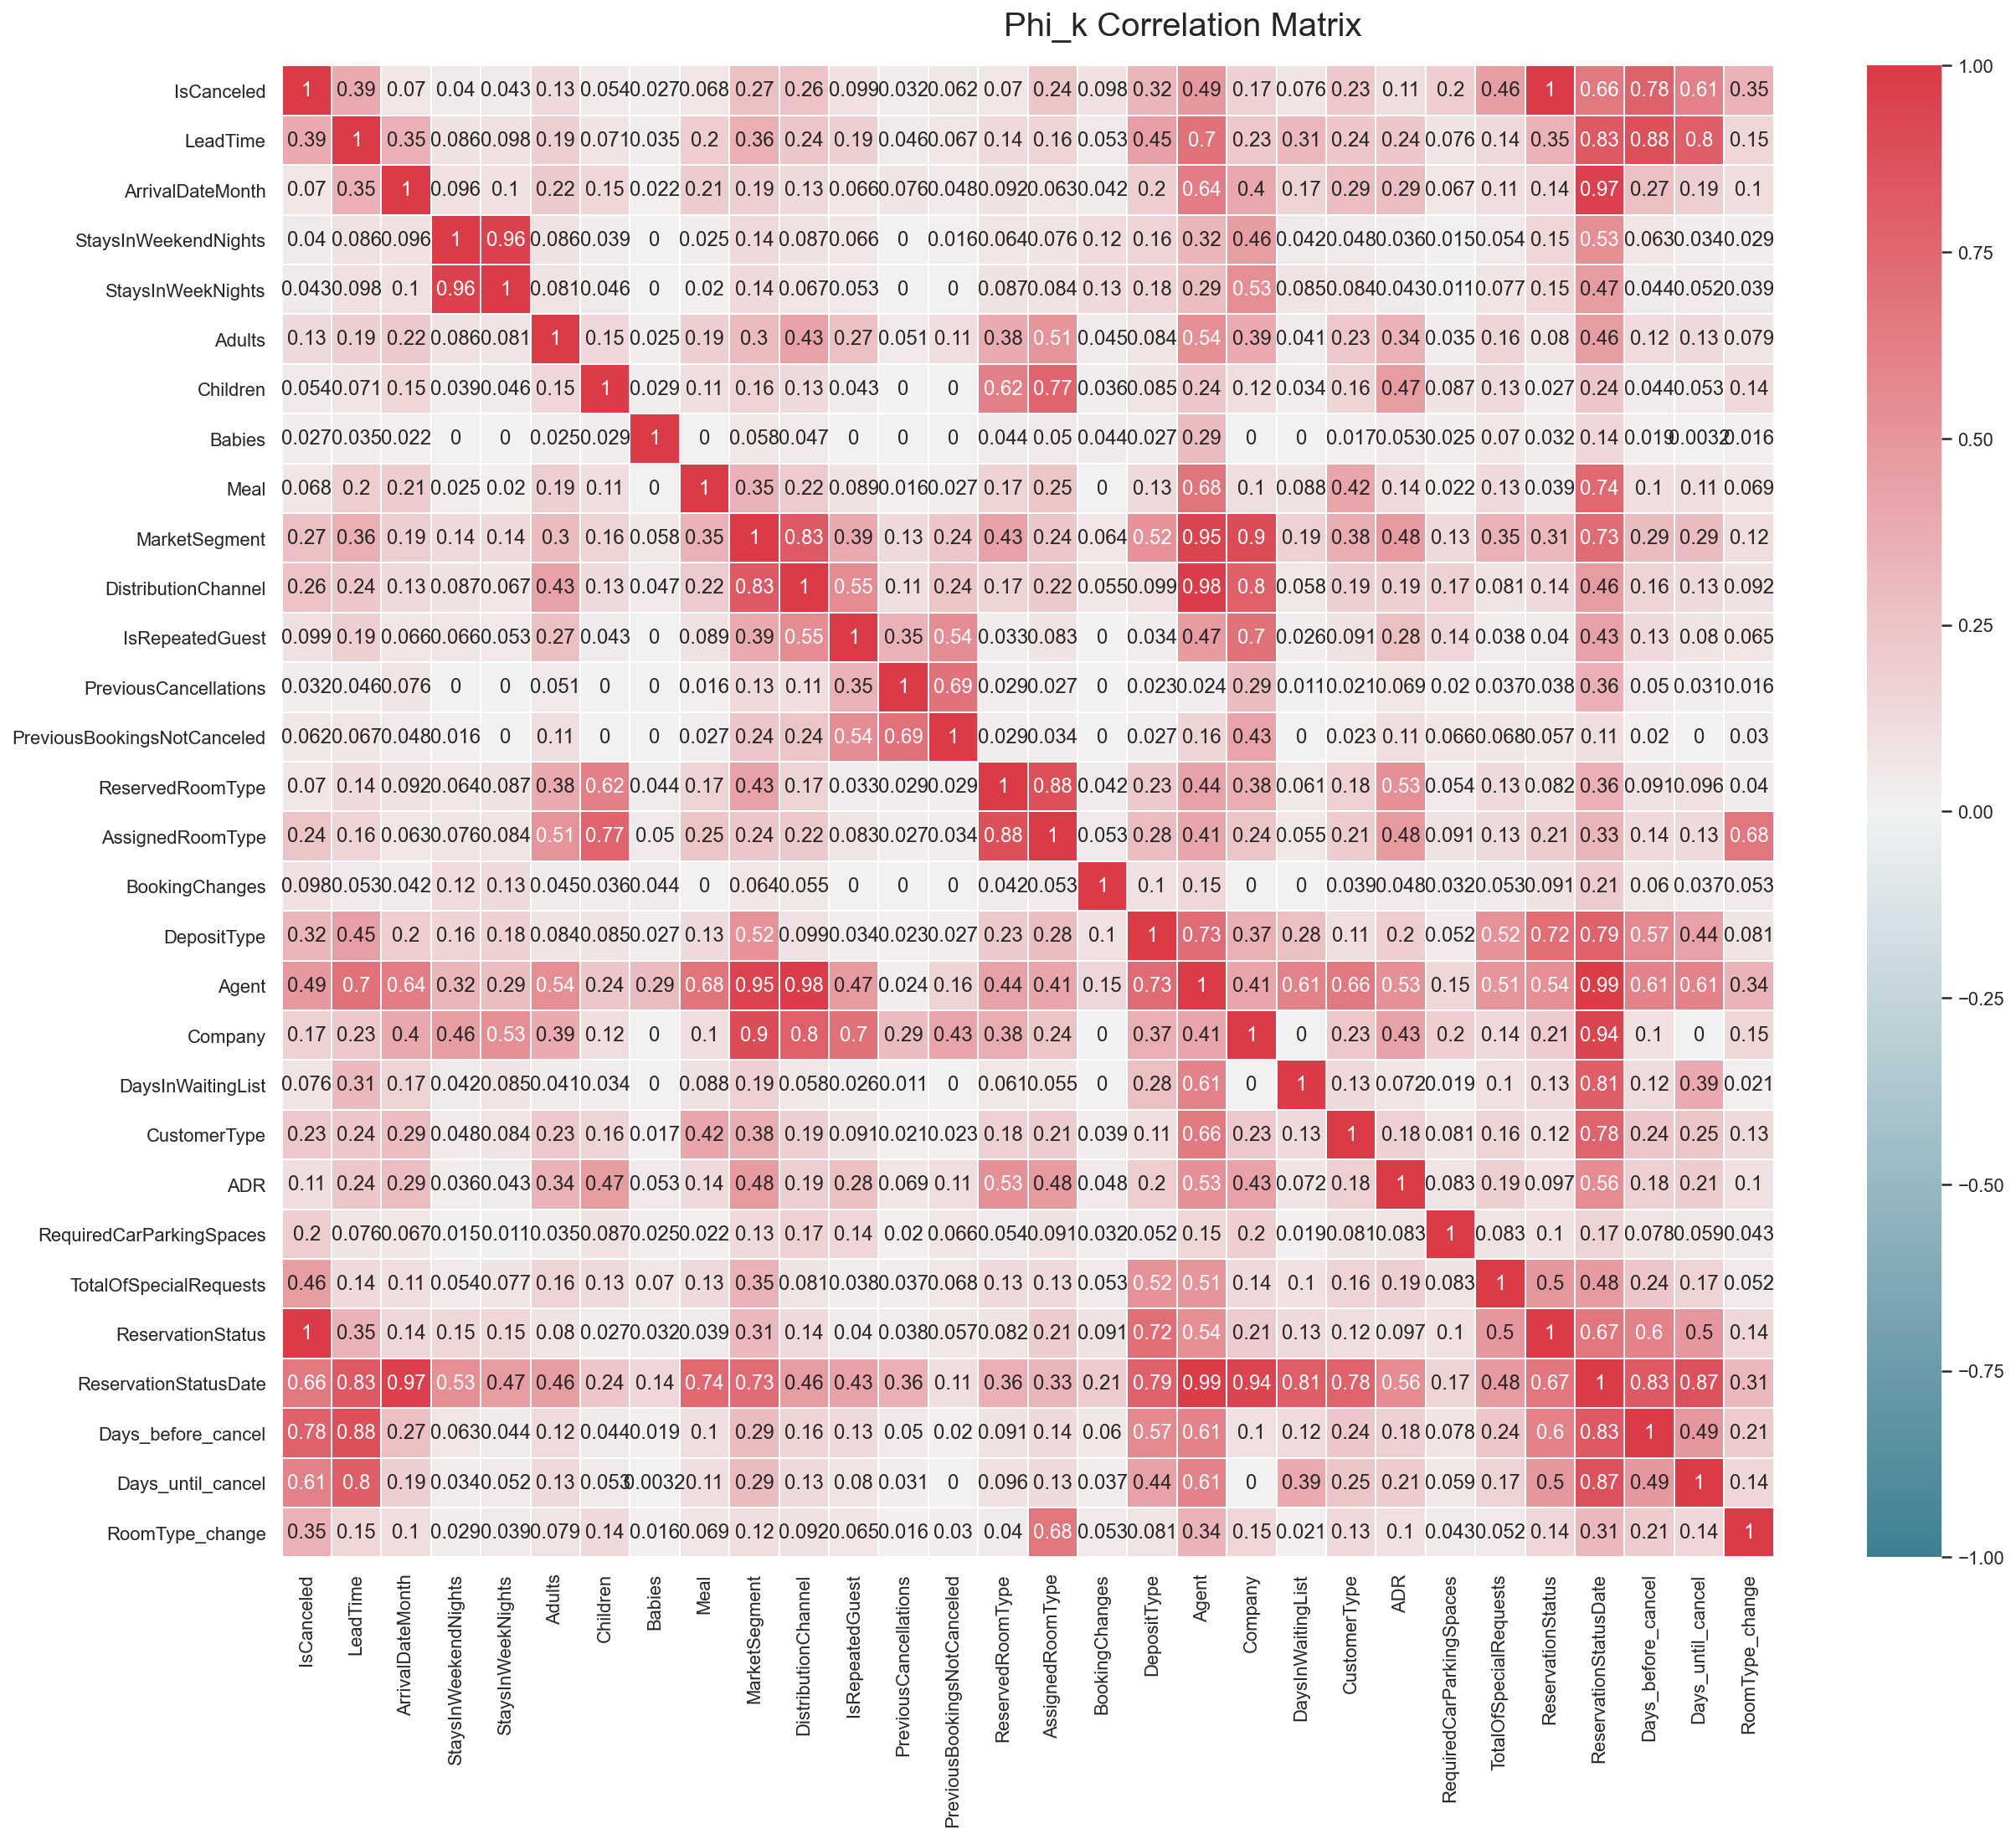

In [23]:
# Phik Correlation matrix
# Set correlation matrix
correlation2 = df1.phik_matrix()
# Set layout
fig = plt.figure(figsize=(20, 15))
sns.heatmap(correlation2, annot = correlation2.values, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            vmin=-1, vmax=1, center=0, square=True, linewidths=.5)
fig.subplots_adjust(top=0.95)
fig.suptitle("Phi_k Correlation Matrix", fontsize=20)

plt.show()

#### The next cell, we re-run the phik correlation matrix after disregarding the variables high correlated

interval columns not set, guessing: ['IsCanceled', 'IsRepeatedGuest', 'LeadTime', 'ADR', 'DaysInWaitingList', 'TotalOfSpecialRequests', 'Adults', 'Children', 'Babies', 'BookingChanges', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 'RequiredCarParkingSpaces', 'StaysInWeekendNights', 'StaysInWeekNights']


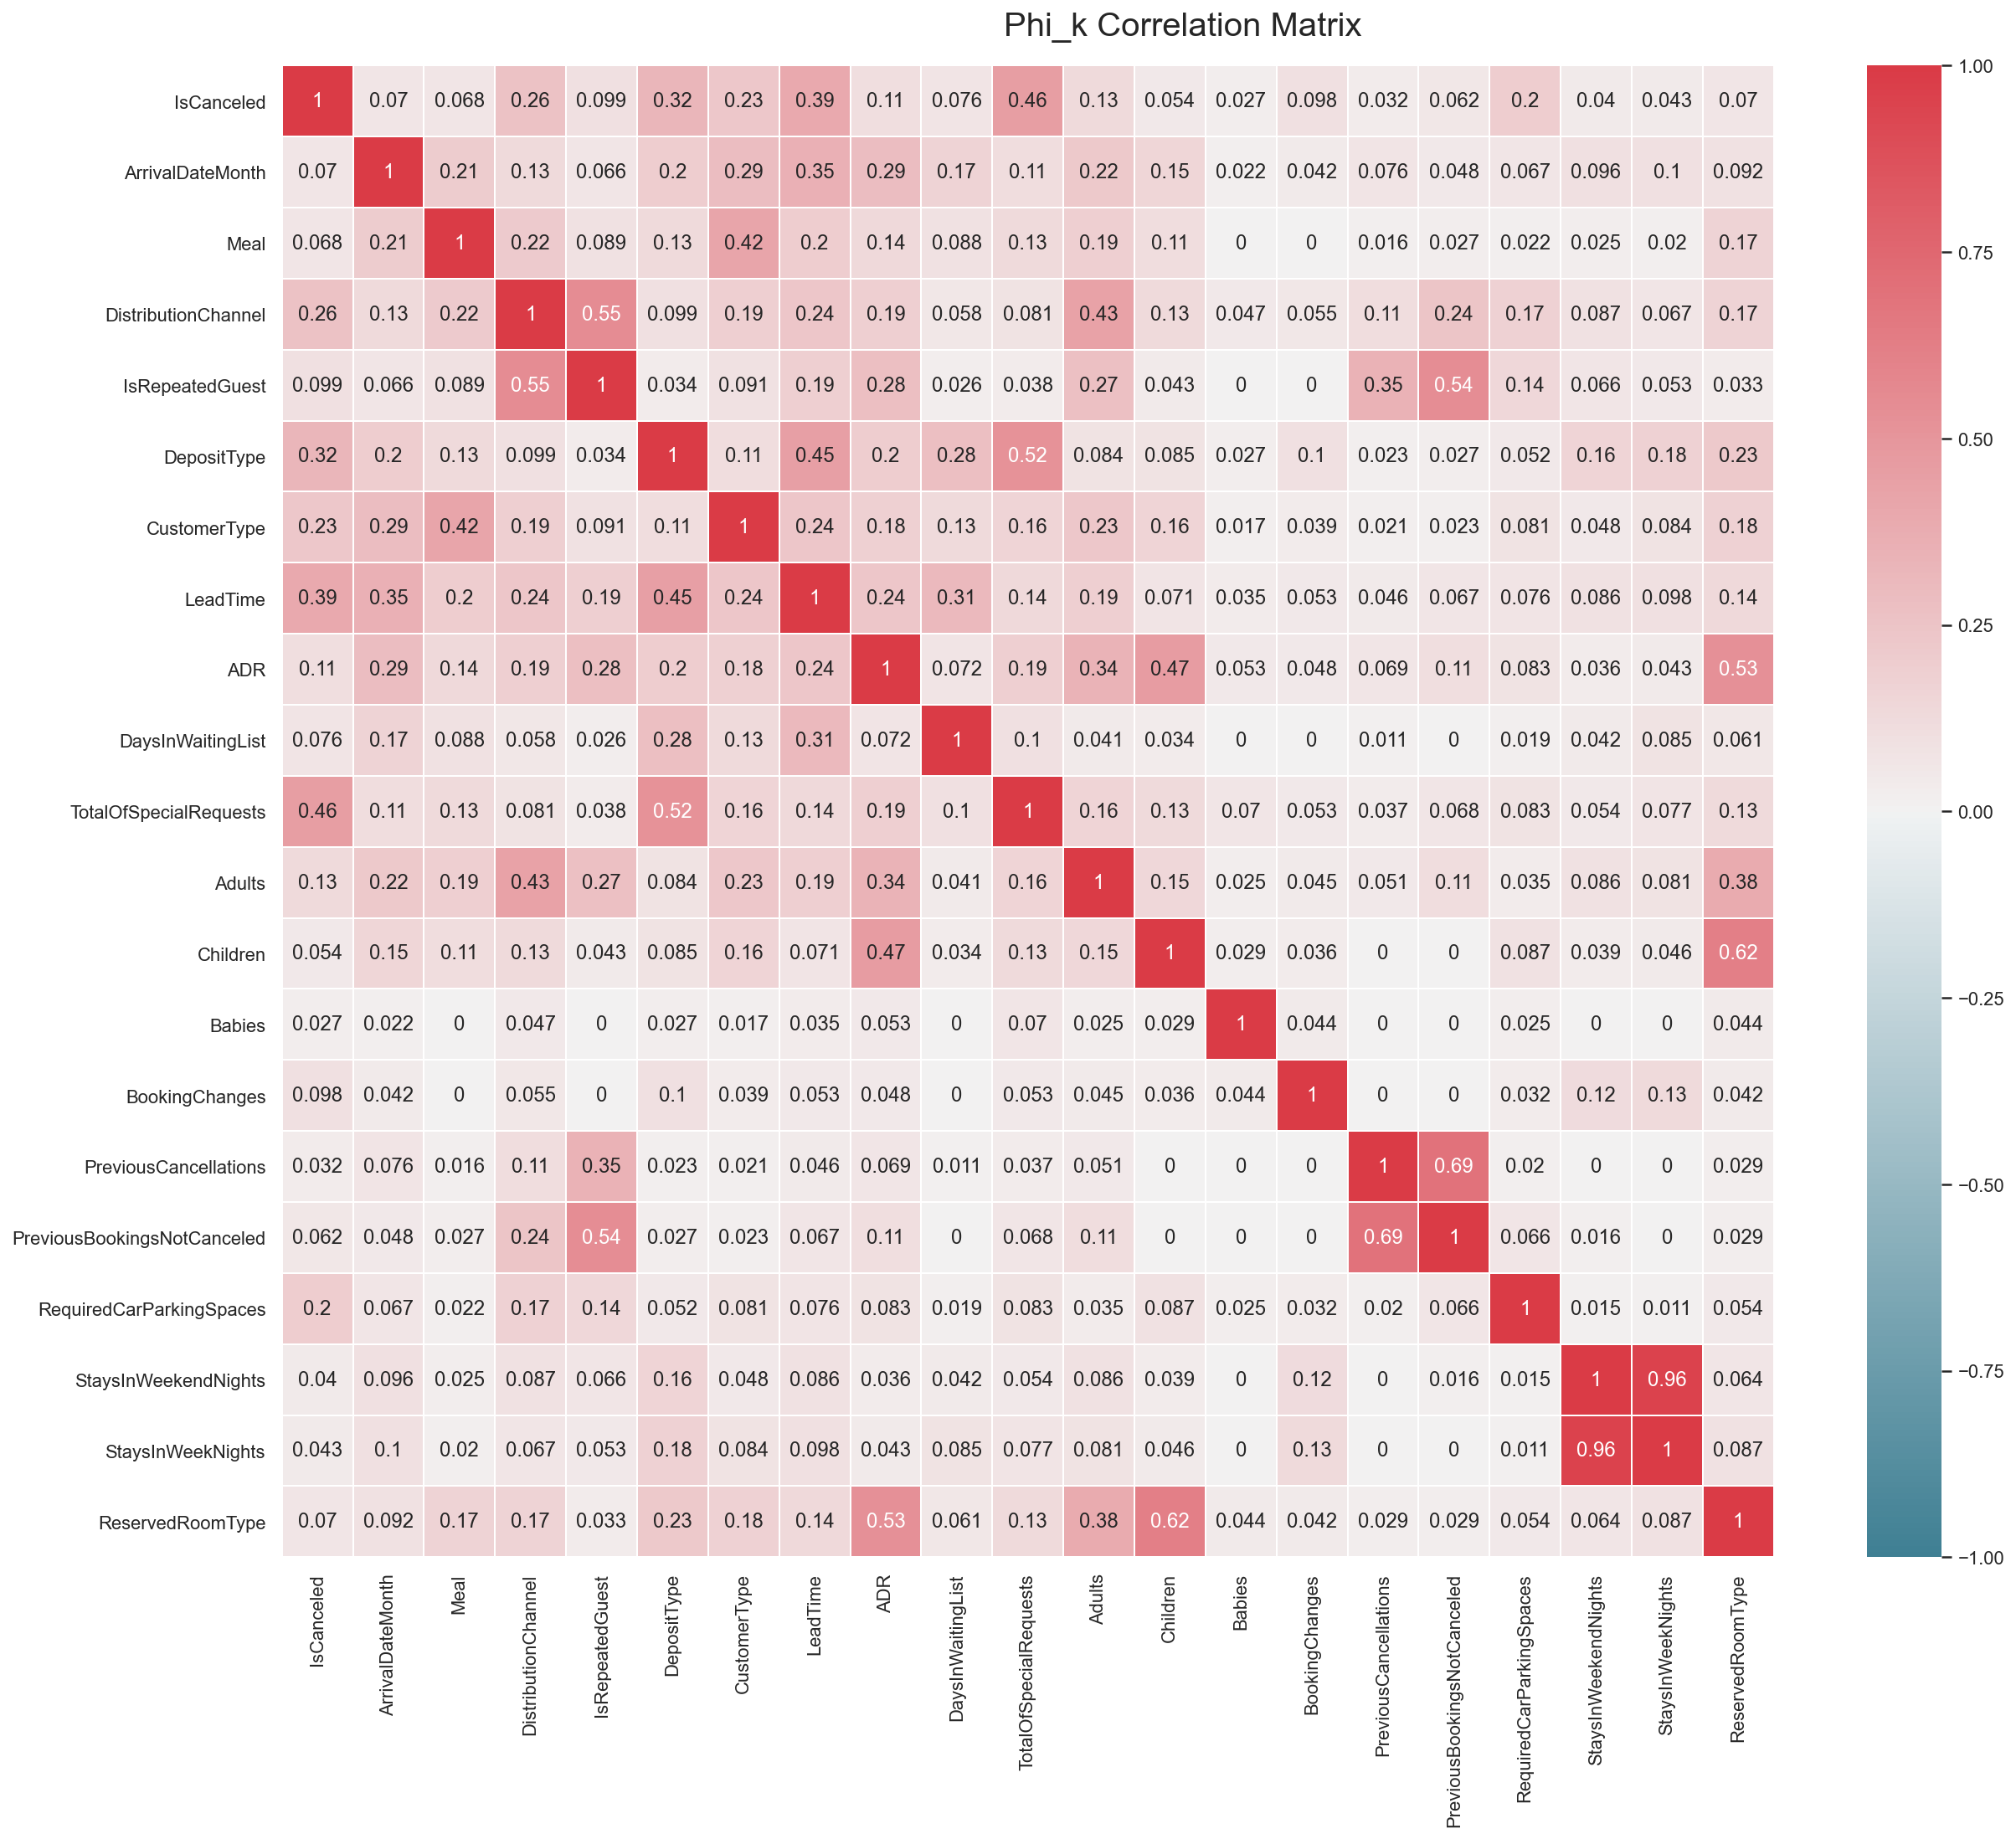

In [24]:
# Define features for Phi_K correlation
corr_features =['IsCanceled', 'ArrivalDateMonth', 'Meal', 'DistributionChannel', 'IsRepeatedGuest', 
                'DepositType', 'CustomerType', 'LeadTime', 'ADR', 'DaysInWaitingList', 'TotalOfSpecialRequests',
                'Adults', 'Children', 'Babies', 'BookingChanges', 'PreviousCancellations', 'PreviousBookingsNotCanceled',
                'RequiredCarParkingSpaces', 'StaysInWeekendNights', 'StaysInWeekNights', 'ReservedRoomType']
# Set correlation matrix
correlation2 = df1[corr_features].phik_matrix()
# Set layout
fig = plt.figure(figsize=(20, 15))
sns.heatmap(correlation2, annot = correlation2.values, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            vmin=-1, vmax=1, center=0, square=True, linewidths=.5)
fig.subplots_adjust(top=0.95)
fig.suptitle("Phi_k Correlation Matrix", fontsize=20)

plt.show()

### Clean data

In [25]:
# Dropping the variables with high correlation
df1.drop(['MarketSegment', 'Agent', 'Company', 'ReservationStatusDate', 'AssignedRoomType', 
          'ReservationStatus','Days_before_cancel','Days_until_cancel','RoomType_change'], axis=1, inplace=True)

In [26]:
# Dropping the variables with low importance to the model - We don't have 100% of the information that these variables before 
#the arrival date, so we decided to drop them to not impact the model
df1.drop(['BookingChanges', 'RequiredCarParkingSpaces','TotalOfSpecialRequests'], axis=1, inplace=True)

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78919 entries, 0 to 79329
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   78919 non-null  int64  
 1   LeadTime                     78919 non-null  int64  
 2   ArrivalDateMonth             78919 non-null  object 
 3   StaysInWeekendNights         78919 non-null  int64  
 4   StaysInWeekNights            78919 non-null  int64  
 5   Adults                       78919 non-null  int64  
 6   Children                     78919 non-null  float64
 7   Babies                       78919 non-null  int64  
 8   Meal                         78919 non-null  object 
 9   DistributionChannel          78919 non-null  object 
 10  IsRepeatedGuest              78919 non-null  int64  
 11  PreviousCancellations        78919 non-null  int64  
 12  PreviousBookingsNotCanceled  78919 non-null  int64  
 13  ReservedRoomType

In [28]:
#re-define non_metric and metric due to drop columns
#we decide to consider some discrete variables as non metric features for better visuliazations
# Define metric features
metric_features = ['LeadTime', 'ADR', 'DaysInWaitingList', 'PreviousCancellations', 'PreviousBookingsNotCanceled', 
                   'StaysInWeekendNights', 'StaysInWeekNights']

# Define non-metric features
non_metric_features = df1.columns.drop(metric_features).to_list()

In [29]:
#Check the size of dataset
df1.shape

(78919, 18)

In [30]:
#Look at the data
df1.head()

IsCanceled  LeadTime ArrivalDateMonth  StaysInWeekendNights  StaysInWeekNights  Adults  Children  Babies       Meal DistributionChannel  IsRepeatedGuest  PreviousCancellations  PreviousBookingsNotCanceled  ReservedRoomType      DepositType  DaysInWaitingList CustomerType   ADR
0           0         6             July                     0                  2       1       0.0       0  HB                      TA/TO                0                      0                            0  A                 No Deposit                       0    Transient   0.0
1           1        88             July                     0                  4       2       0.0       0  BB                      TA/TO                0                      0                            0  A                 No Deposit                       0    Transient  76.5
2           1        65             July                     0                  4       1       0.0       0  BB                      TA/TO                0                      0                            0  A                 No Deposit                       0    Transient  68.0
3           1        92             July                     2                  4       2       0.0       0  BB                      TA/TO                0                      0                            0  A                 No Deposit                       0    Transient  76.5
4           1       100             July                     0                  2       2       0.0       0  BB                      TA/TO                0                      0                            0  A                 No Deposit                       0    Transient  76.5

### Visualization

In [31]:
# Percentage of y='yes'(only for classification)
(df['IsCanceled']==1).value_counts(normalize=True)

False    0.58273
True     0.41727
Name: IsCanceled, dtype: float64

<AxesSubplot:xlabel='IsCanceled', ylabel='count'>

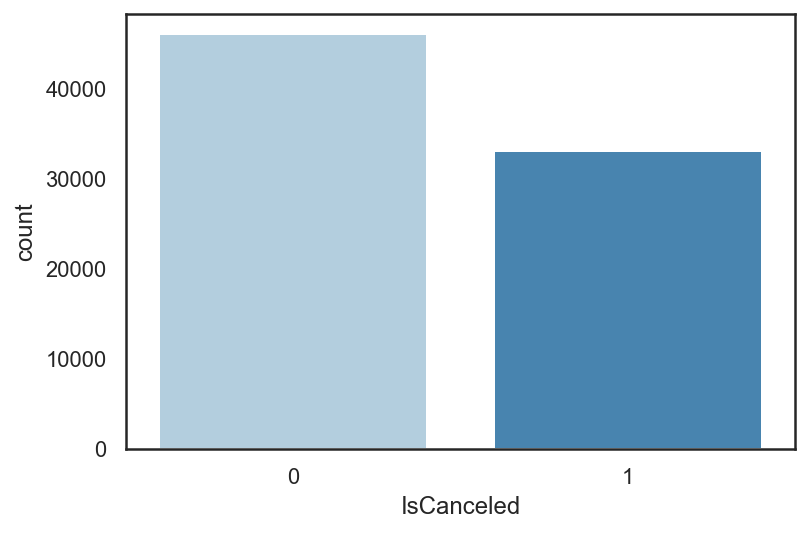

In [32]:
#Only for classification
sns.set_style('white')
sns.countplot(x='IsCanceled',data= df1,palette = "Blues")

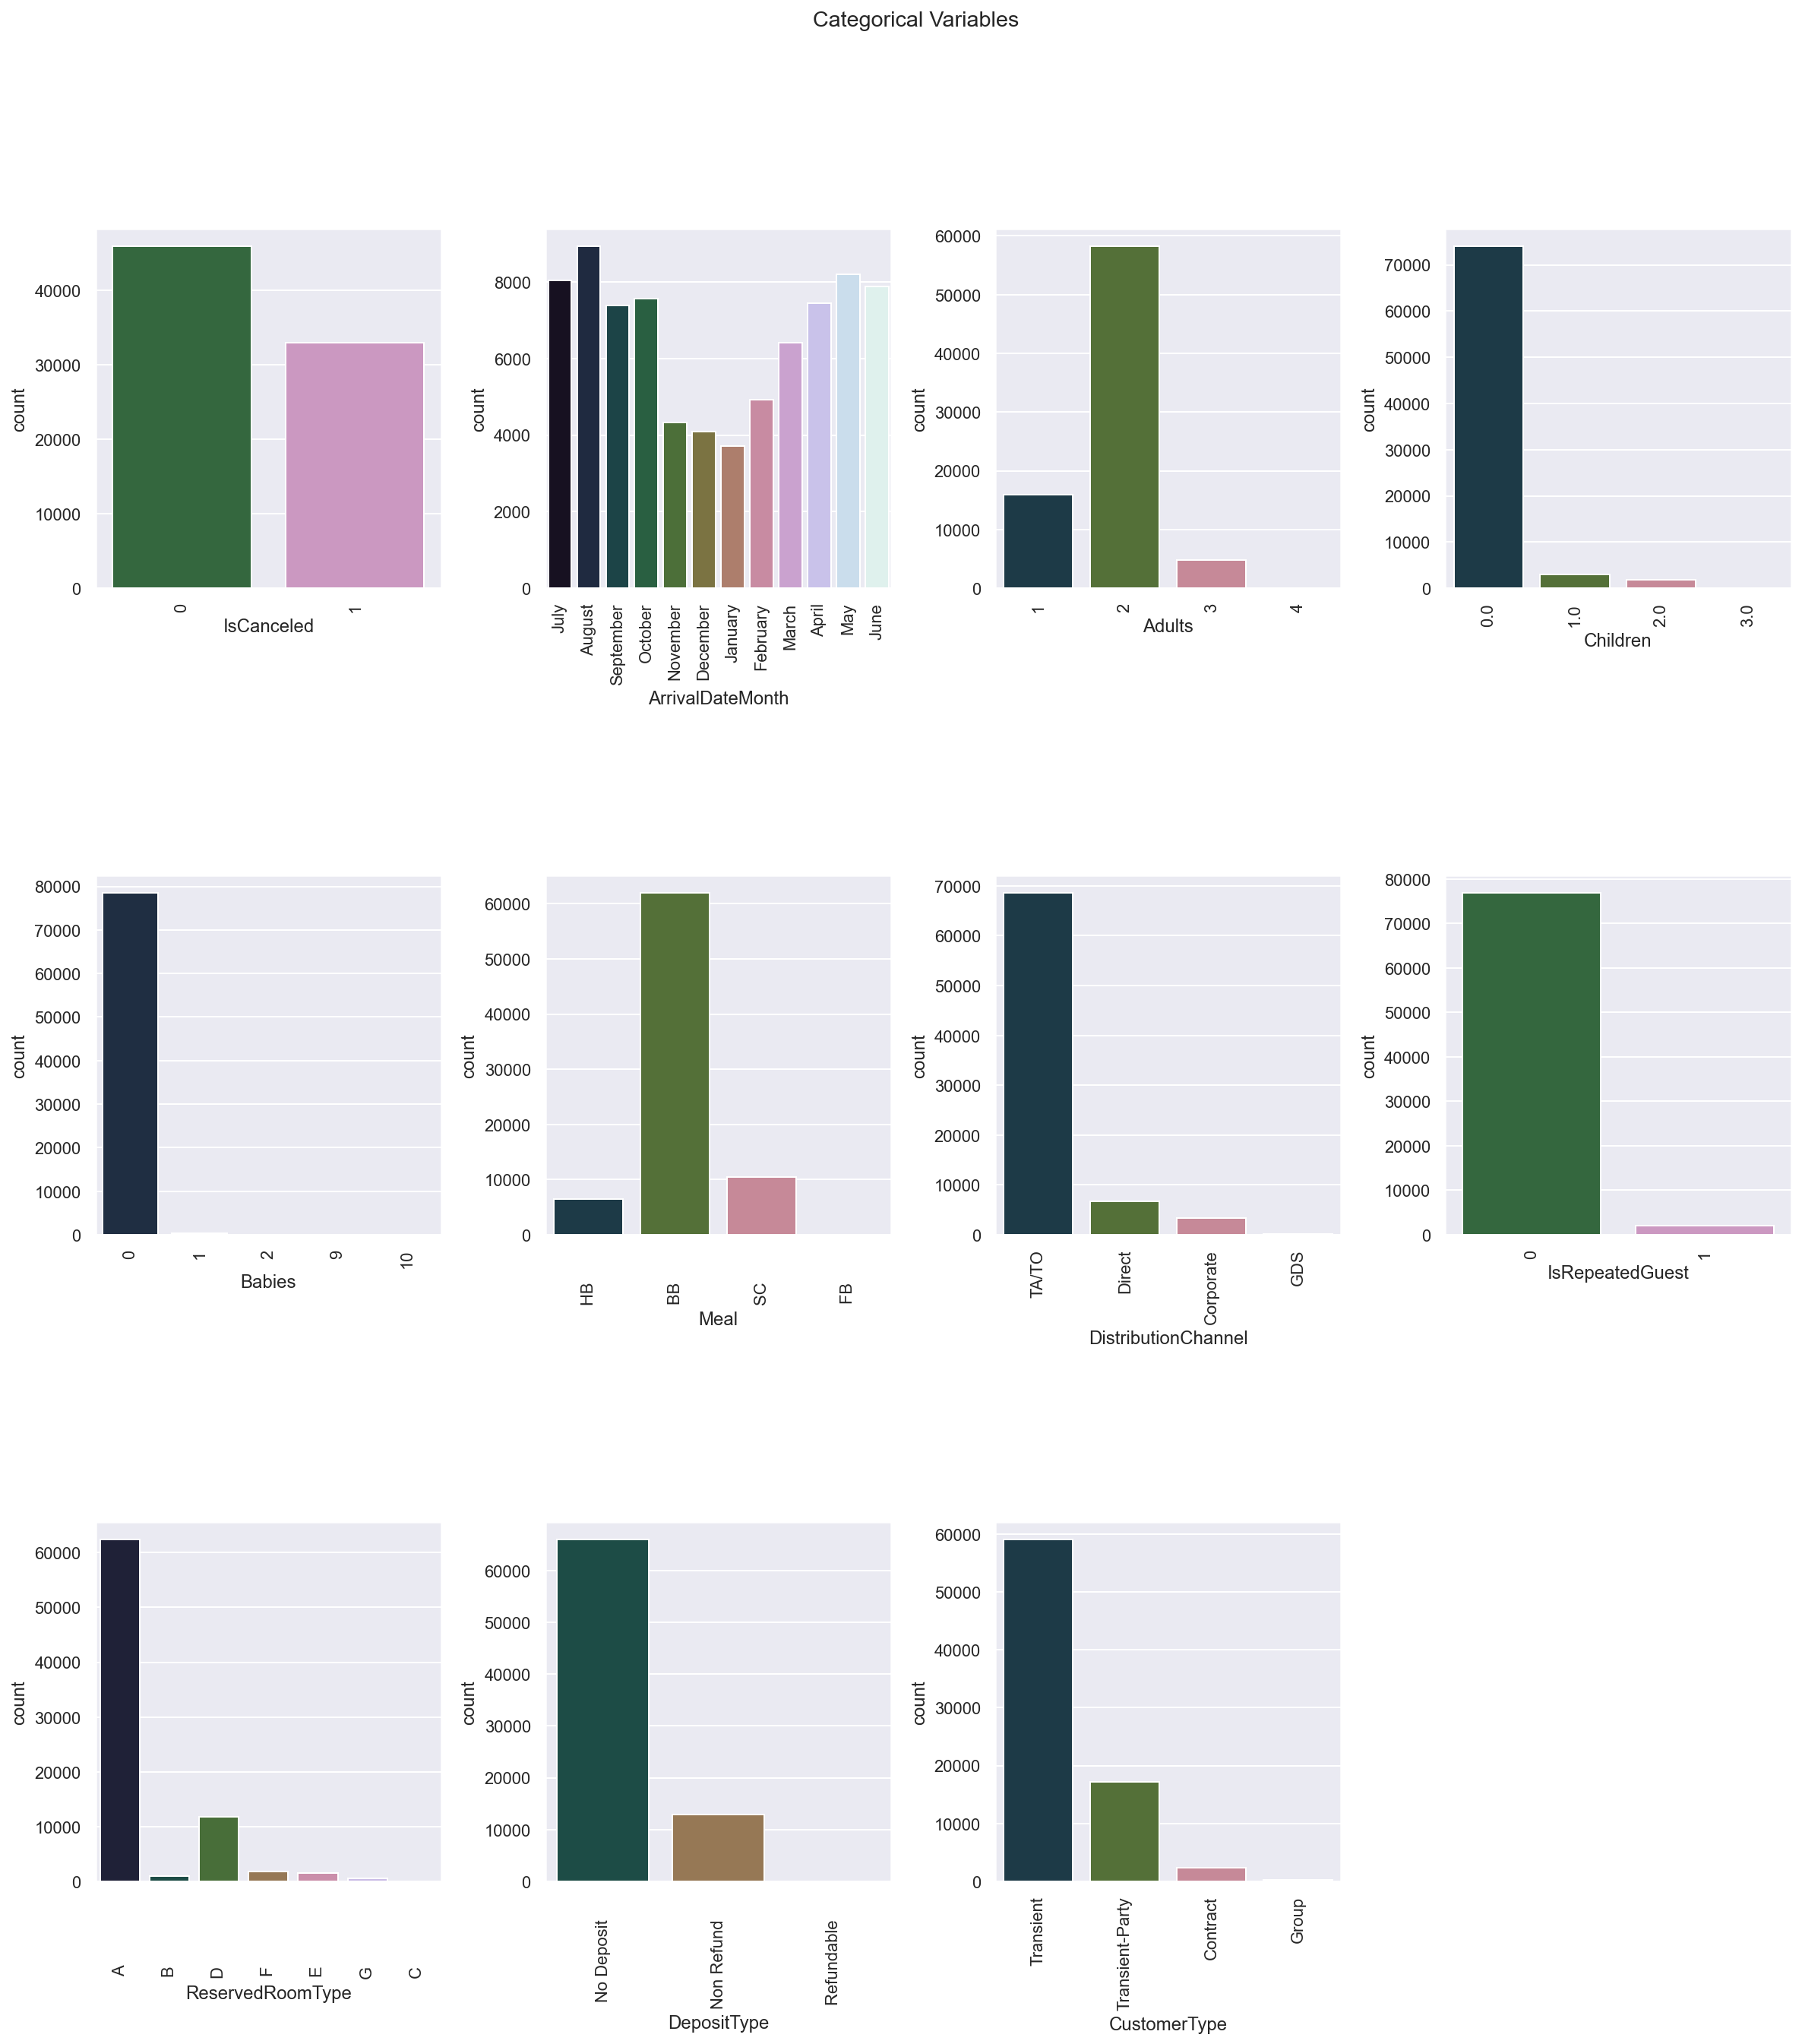

In [33]:
# Absolute frequencies for the non-metric features
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(3, ceil(len(non_metric_features) / 3), figsize=(20, 20))

# Plot data
# Iterate across axes objects and associate each bar plot
for ax, feat in zip(axes.flatten(), non_metric_features):
    g = sns.countplot(df1[feat], ax=ax, palette = 'cubehelix')
    g.set_xticklabels(g.get_xticklabels(),rotation=90)

# Layout
# Add a centered title to the figure:
title = "Categorical Variables"
plt.suptitle(title)

#Adjust the space between plots
plt.subplots_adjust(wspace=0.3, hspace=0.8)

# Remove the last plot
axes.flatten()[-1].remove()

#Show plot

plt.show()

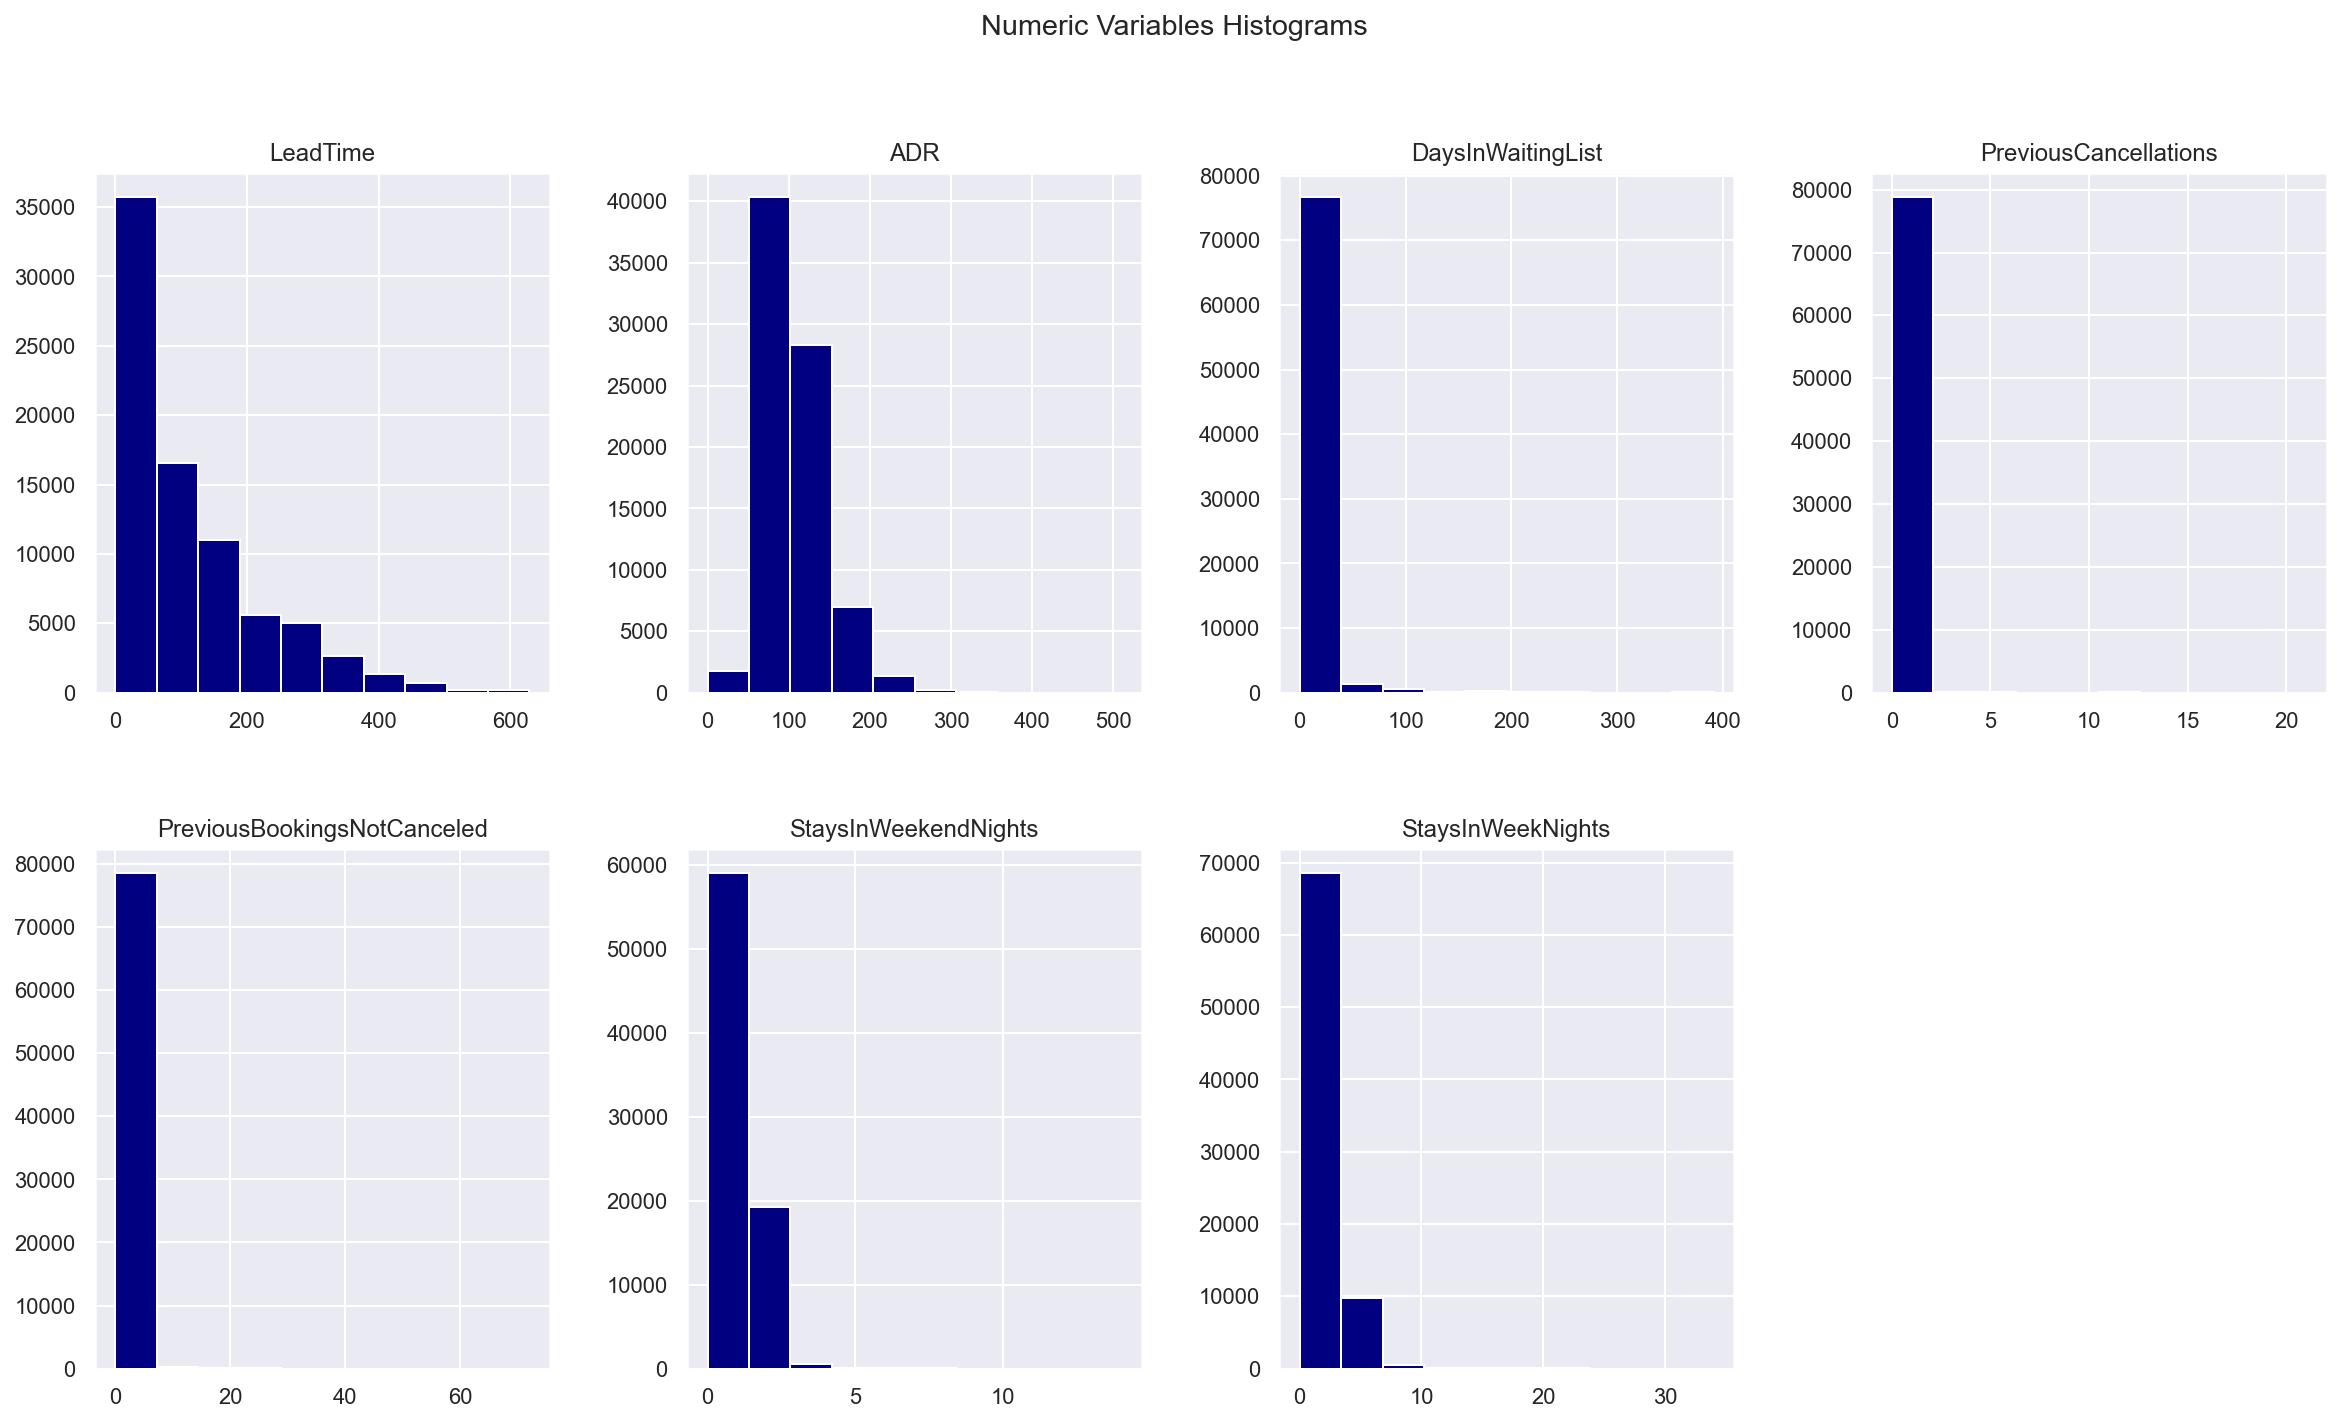

In [34]:
# Histograms for the metric features
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten(), metric_features): 
    ax.hist(df1[feat], color = "Navy")
    ax.set_title(feat)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables Histograms"
plt.suptitle(title)

#Adjust the space between plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Remove the last plot
axes.flatten()[-1].remove()

#Show Plot
plt.show()

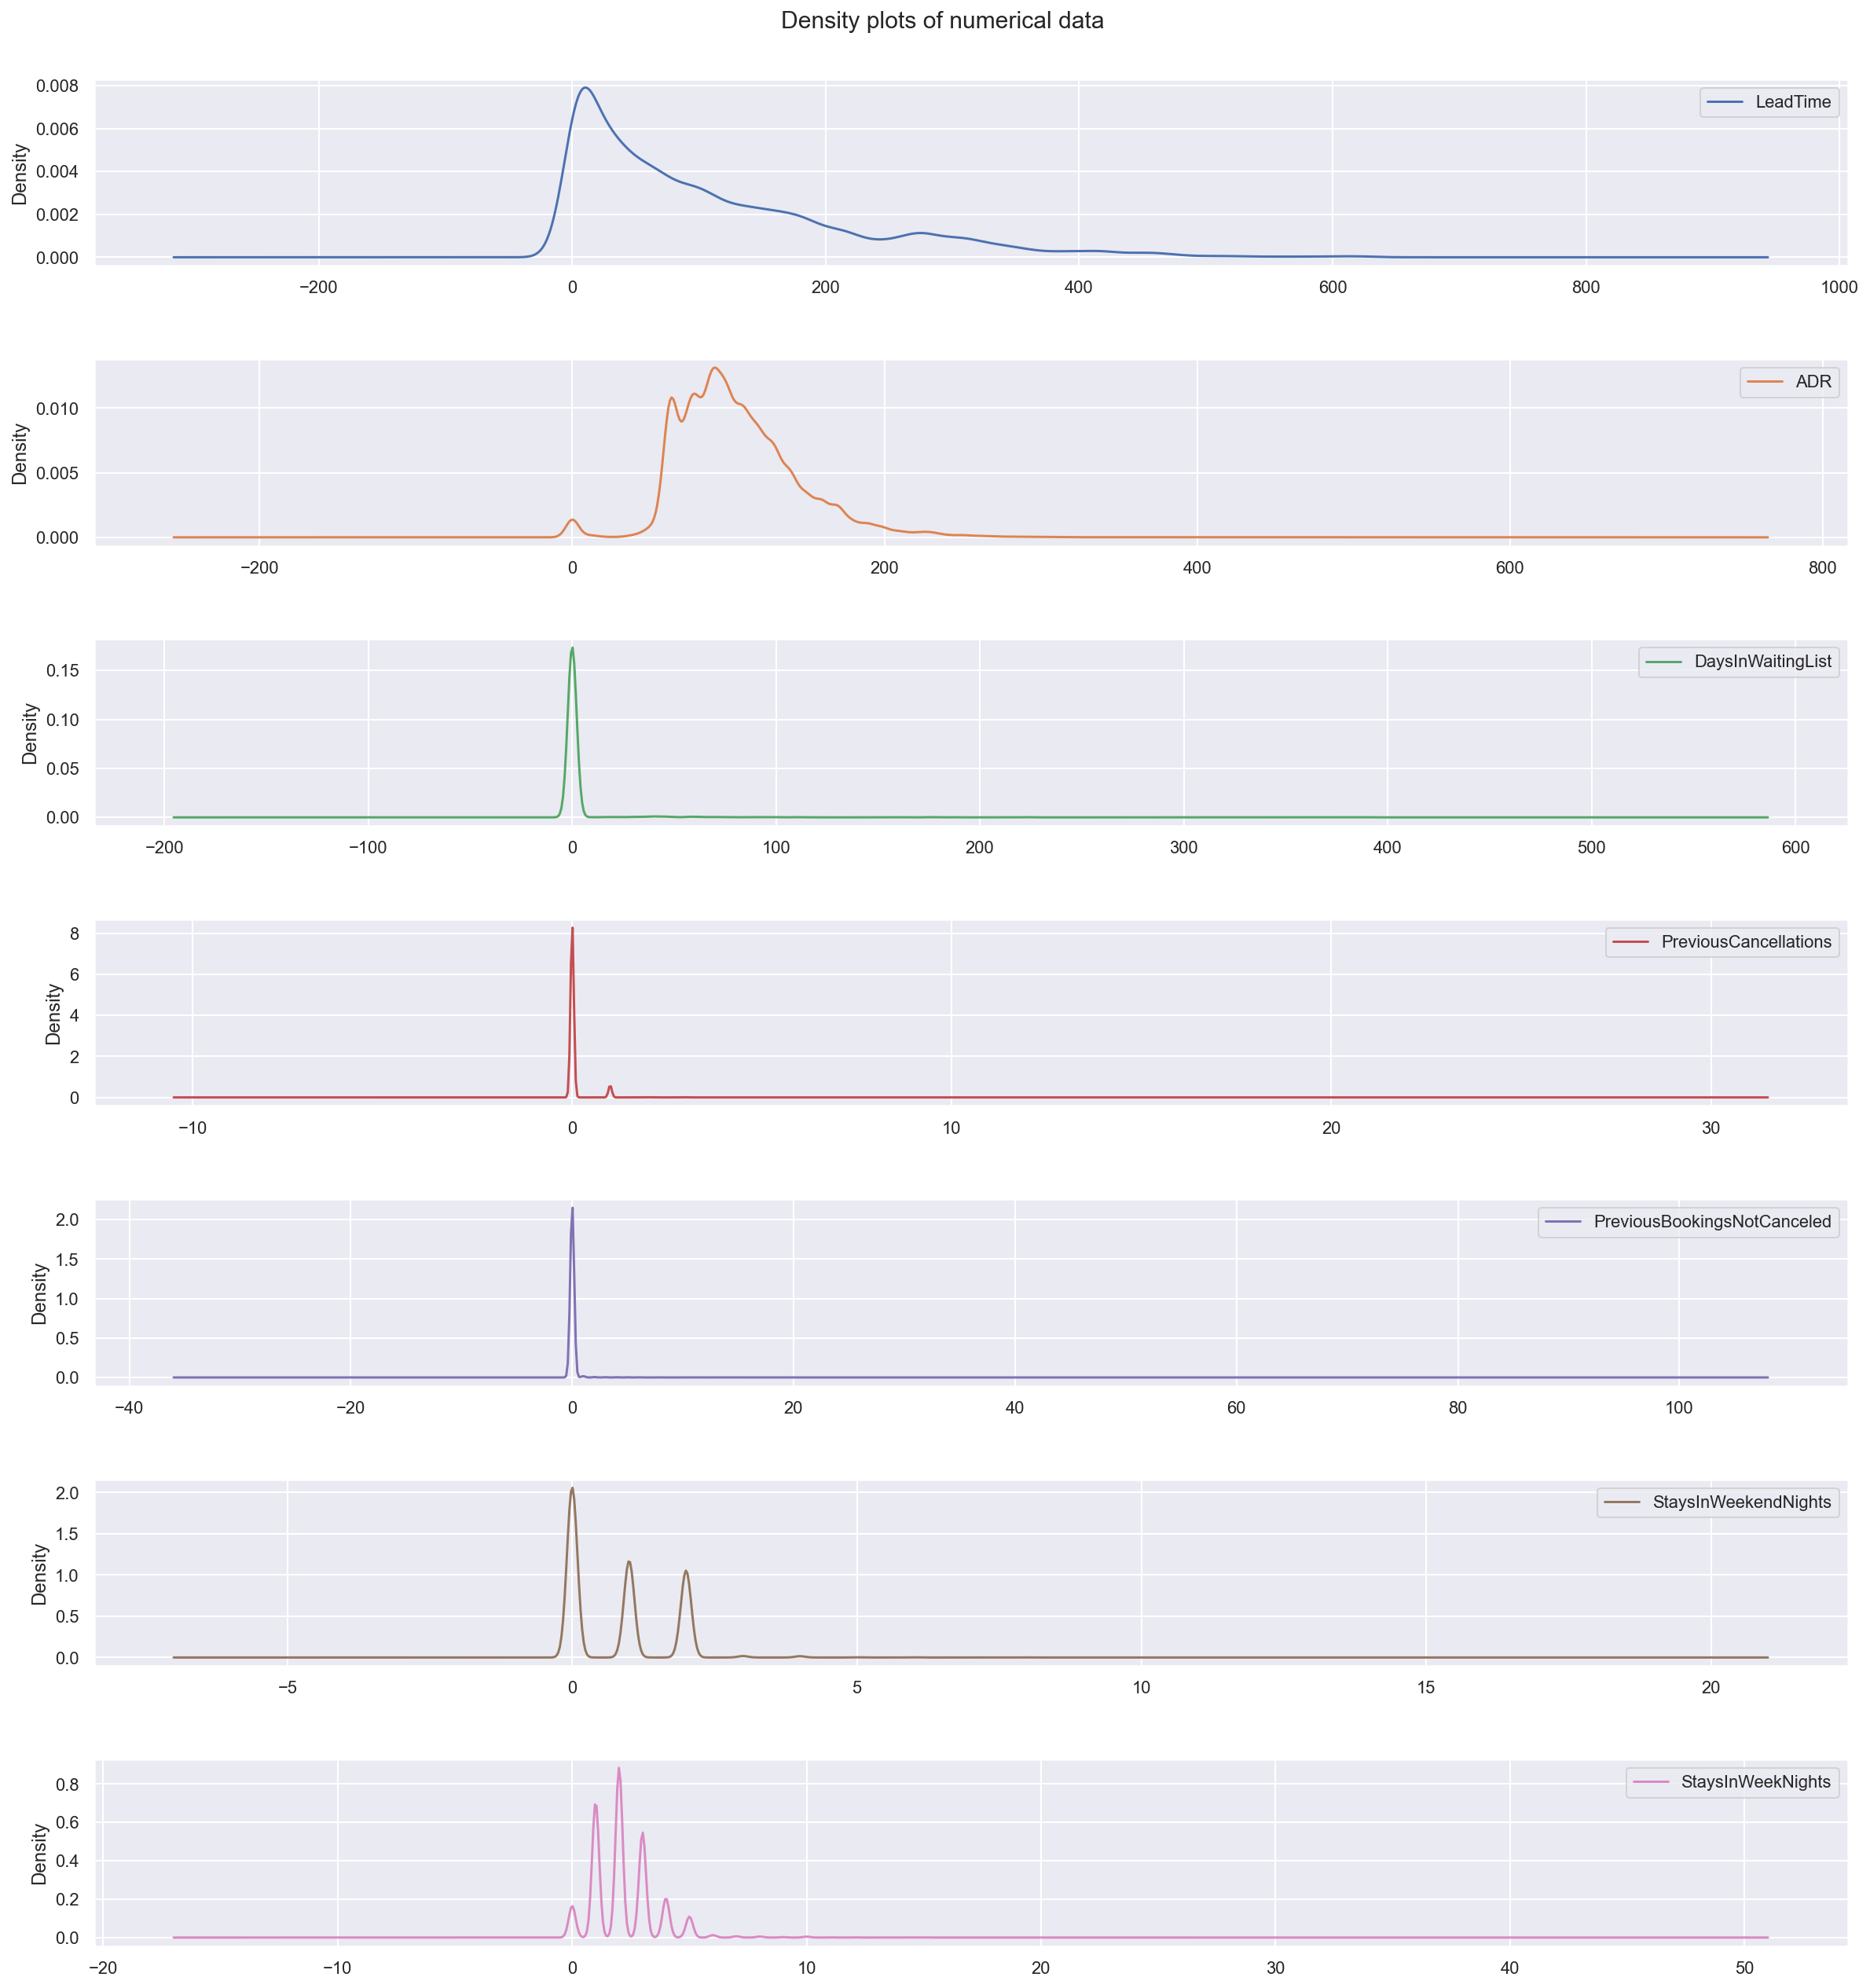

In [35]:
# Density plots for the metric features
sns.set()

# set desity plot and layout
df1[metric_features].plot(kind='density', subplots=True, figsize=(20,20),sharex=False)
plt.subplots_adjust(top=0.95)

# Layout
# Add a centered title to the figure:

plt.suptitle("Density plots of numerical data", fontsize=15)

#Adjust the space between plots
plt.subplots_adjust(hspace=0.5)

#Show Plot
plt.show()

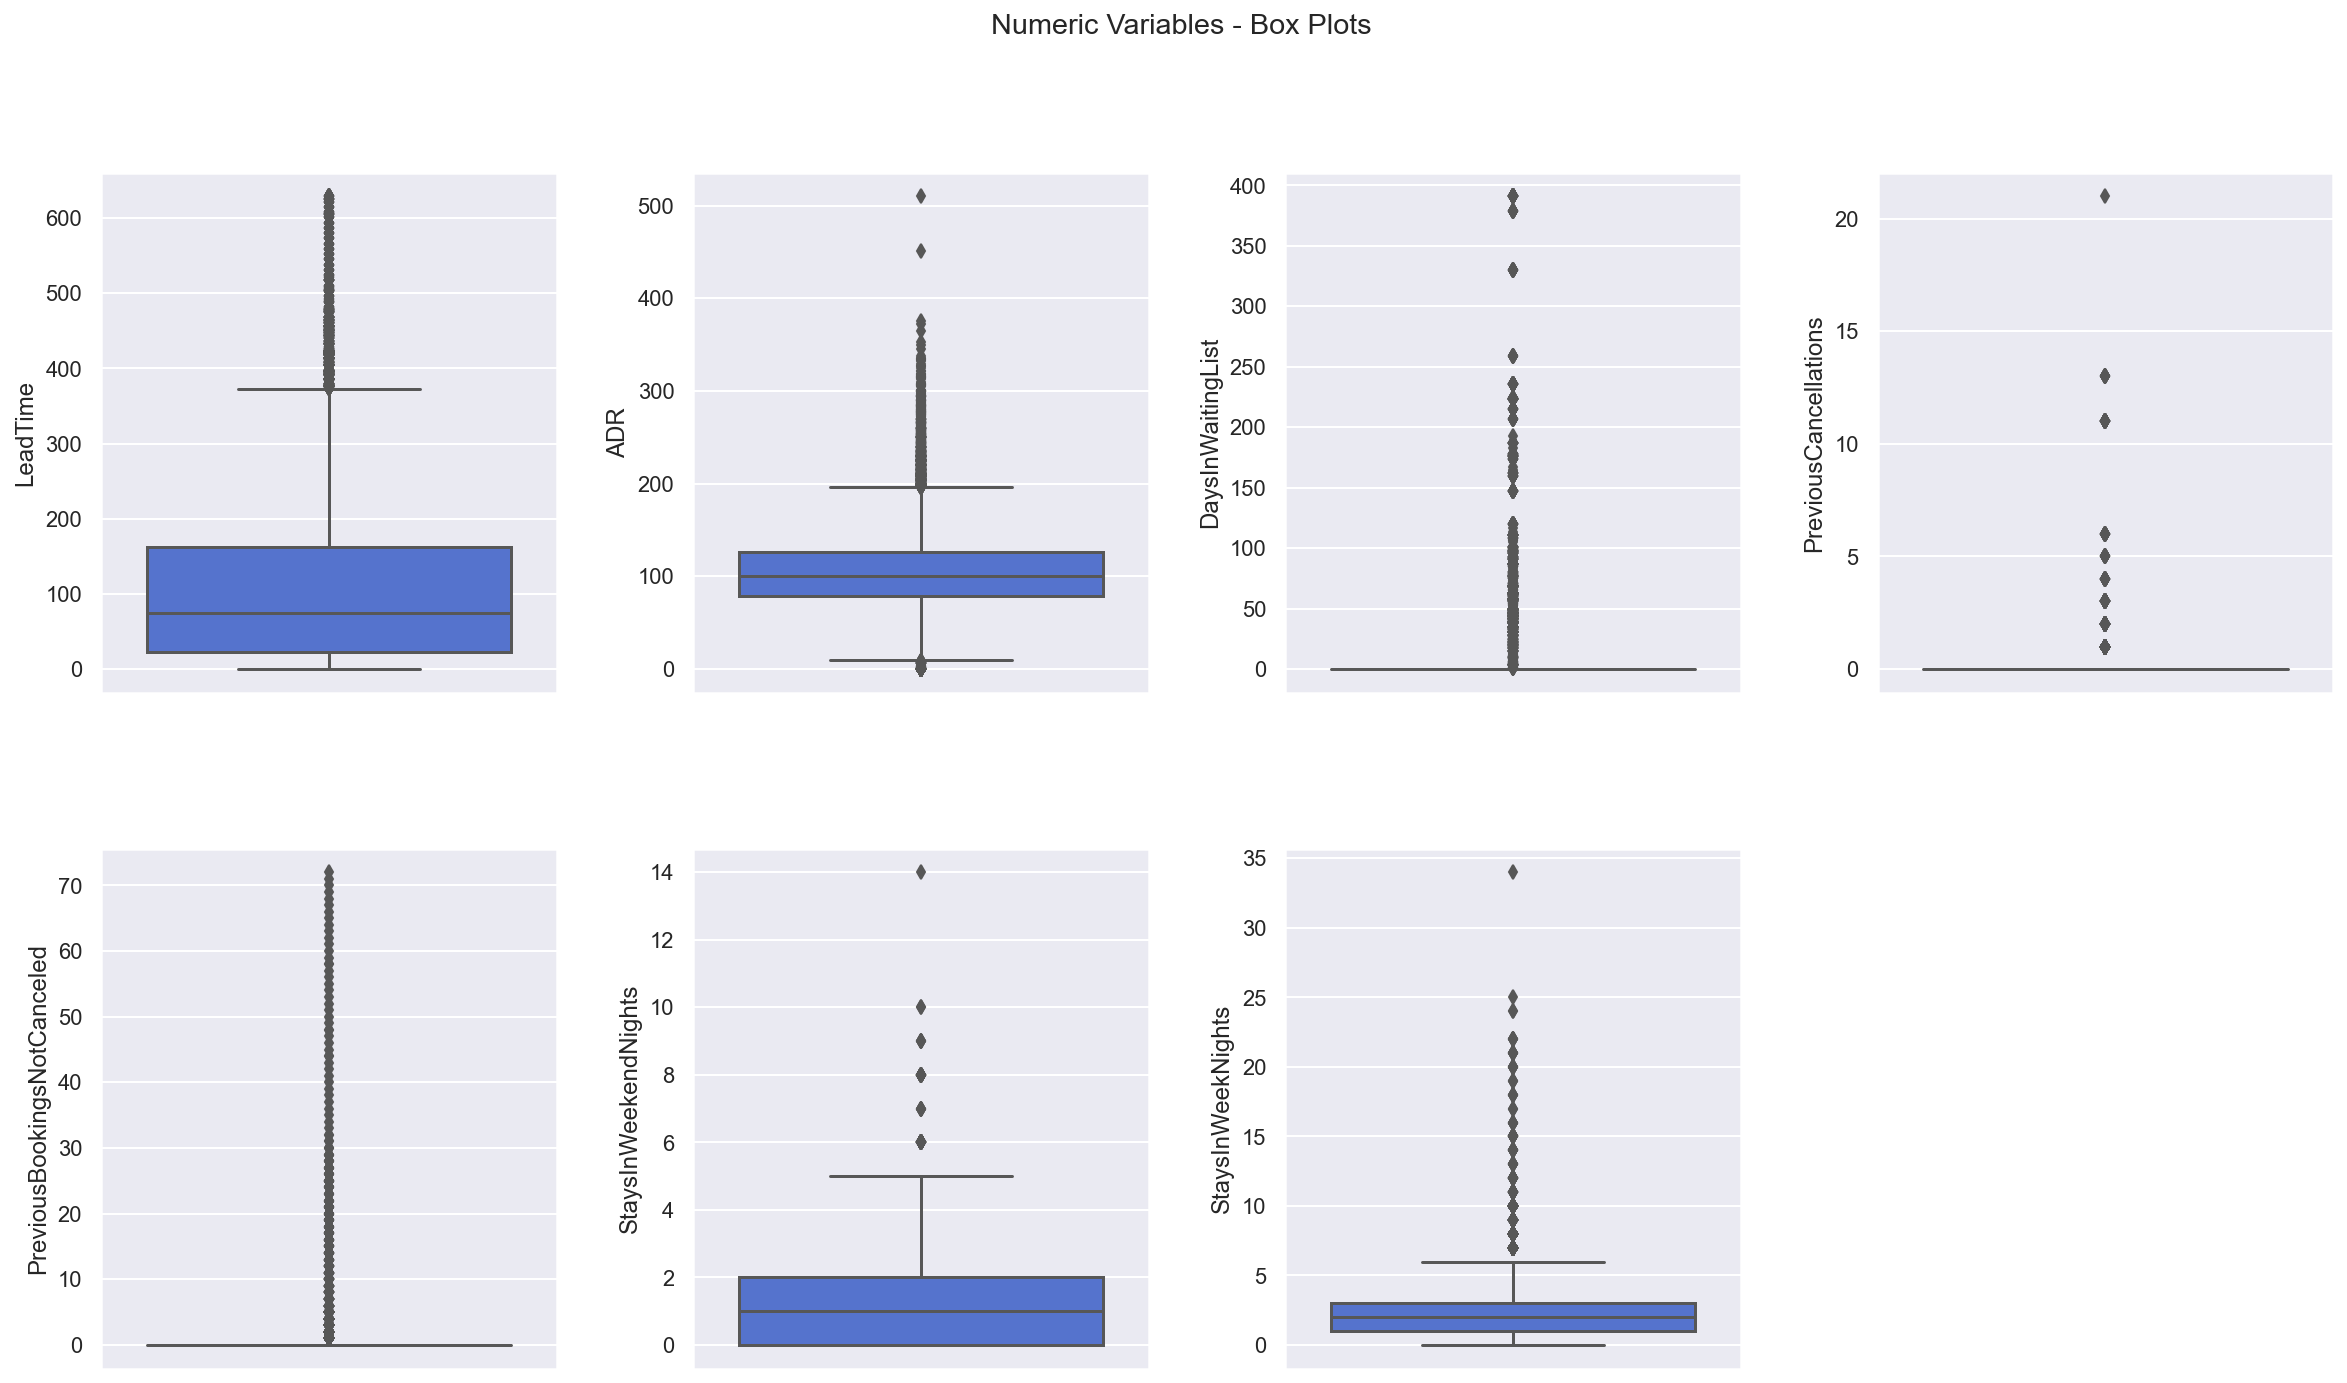

In [36]:
# Boxplots for the metric features
sns.set()

# Prepare figure and create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) /2), figsize=(20, 11))

# Plot the data
# Iterate across axes objects and associate each box plot
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(y=df1[feat], ax=ax,color="royalblue")
    
# Layout
# Add a centered title to the figure
title = "Numeric Variables - Box Plots"
plt.suptitle(title)

# Adjust the space between plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Remove the last plot
axes.flatten()[-1].remove()

# Show plots
plt.show()

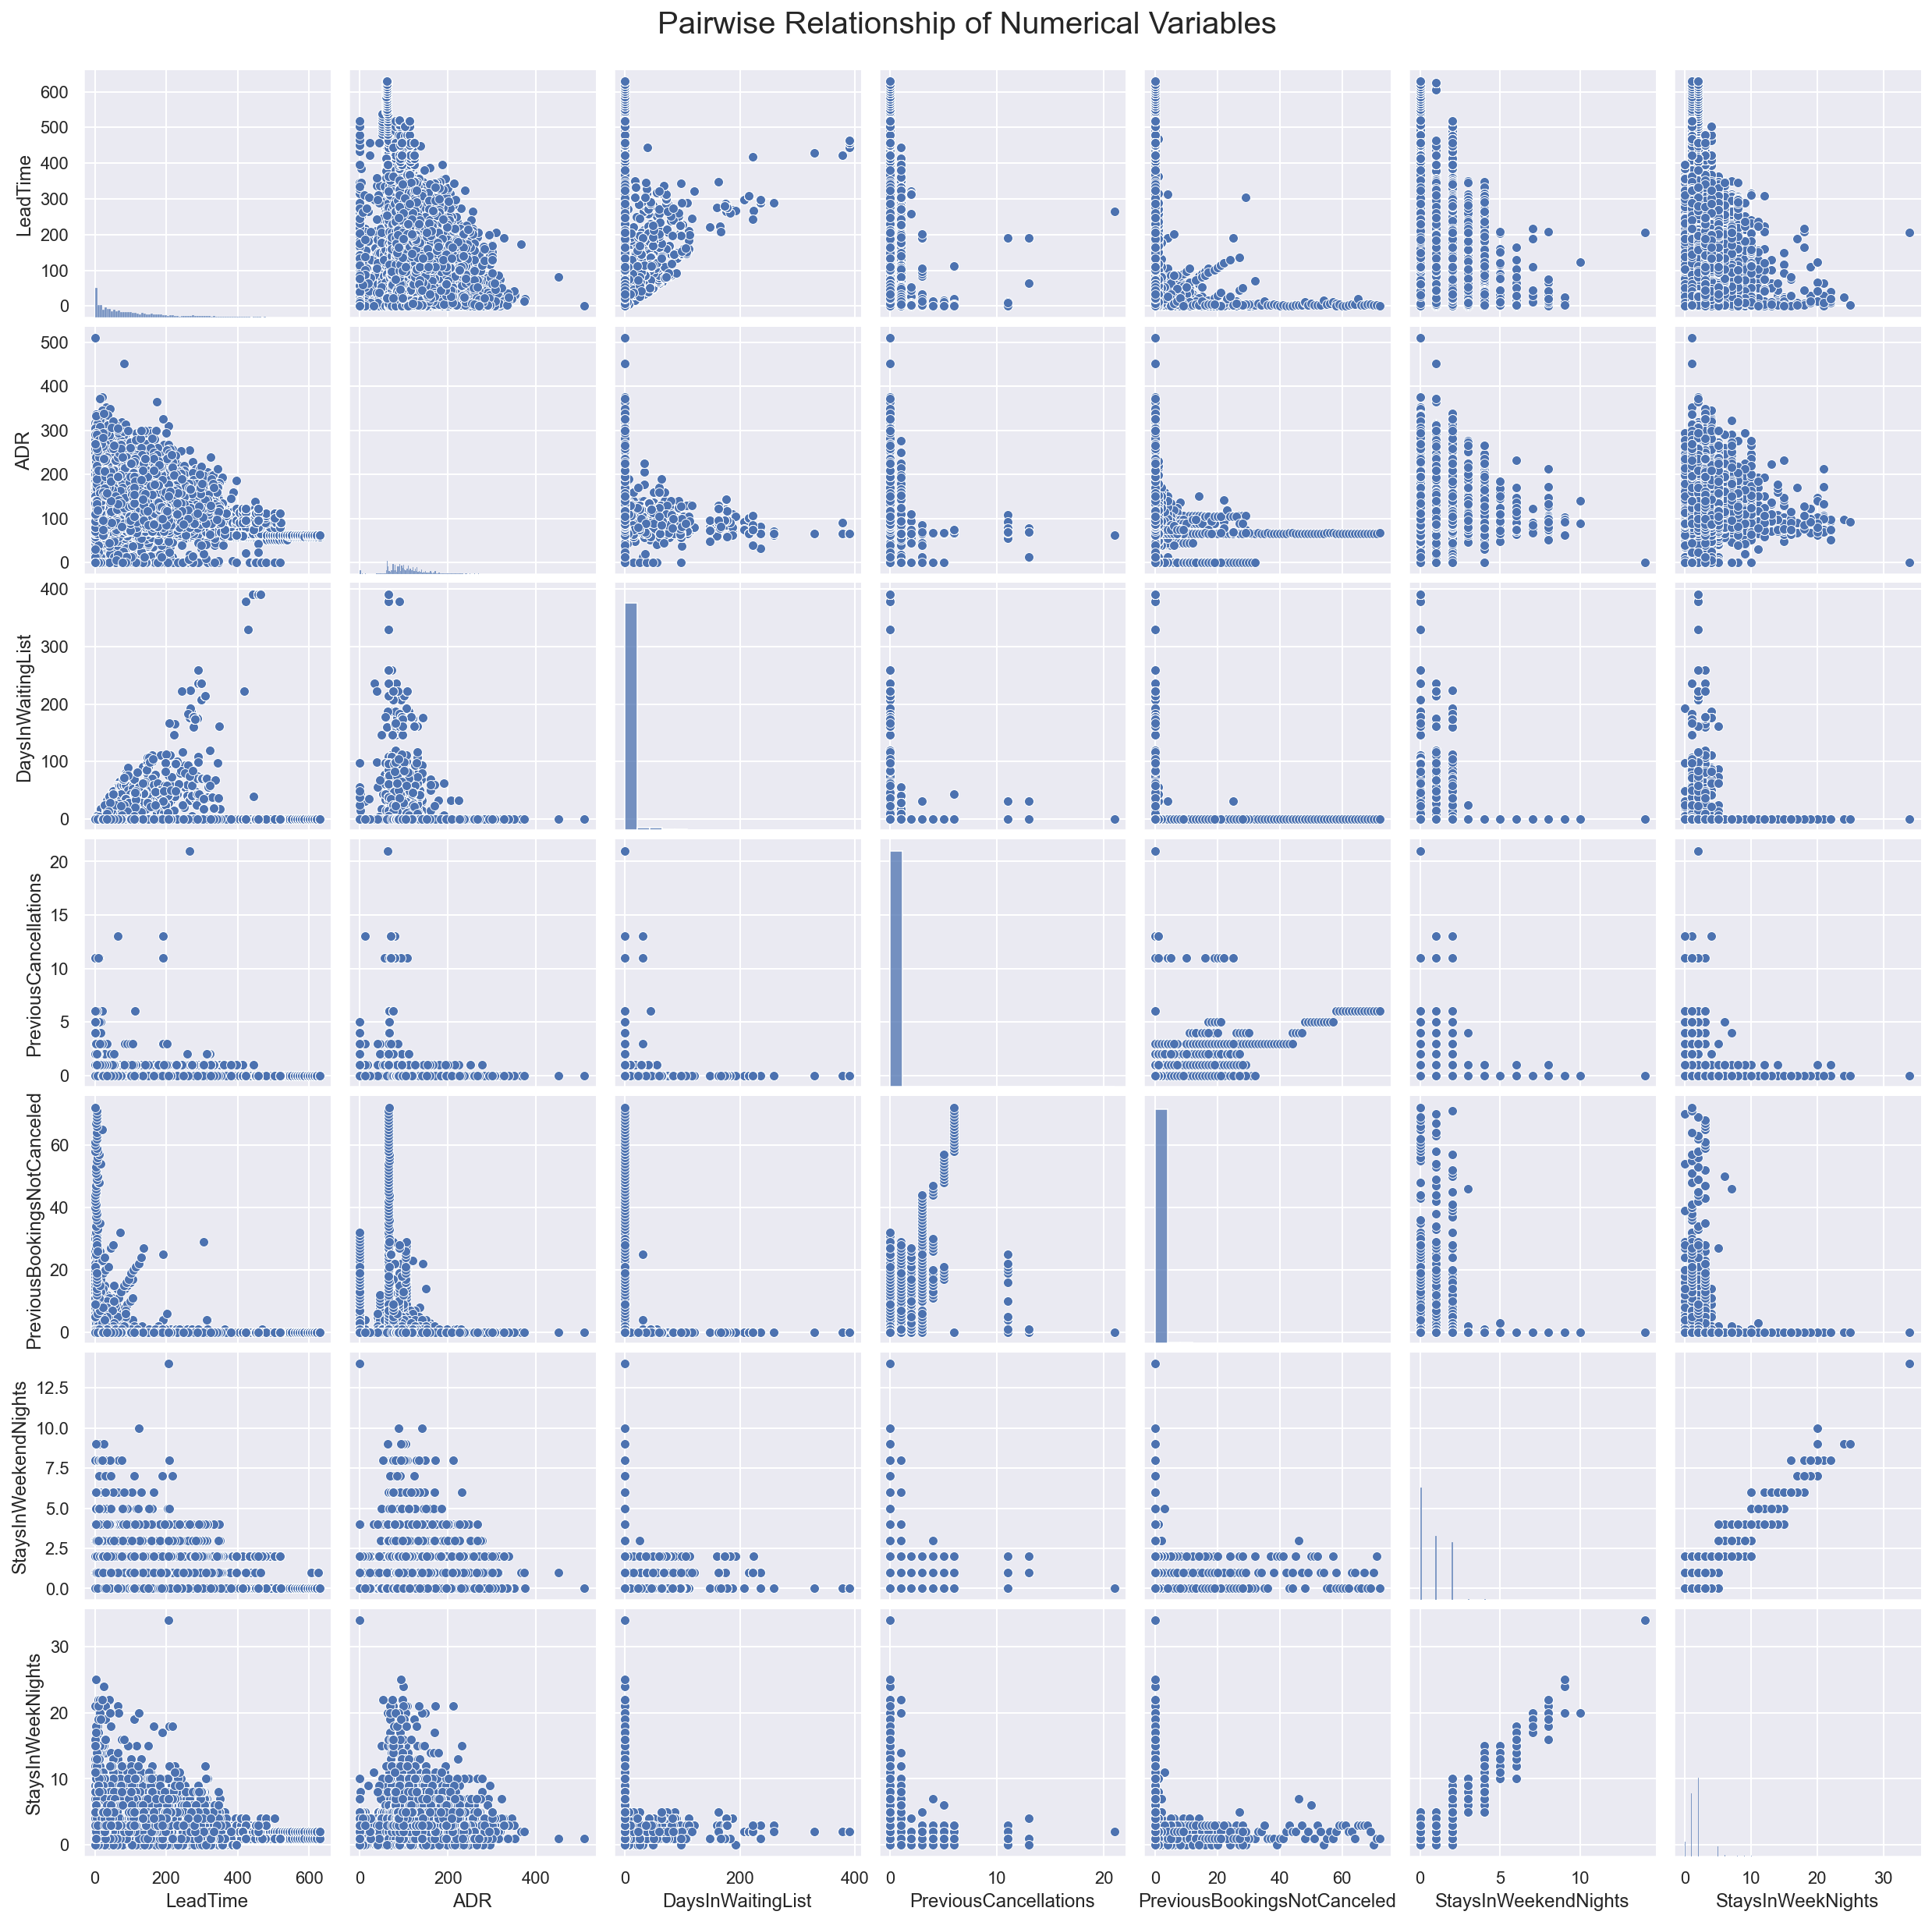

In [37]:
# Pairwise relationship of metric features
sns.set()

# Setting pairplot
sns.pairplot(data=df1[metric_features], diag_kind="hist")

# Layout
# Add a centered title to the figure
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

# Show plots
plt.show()

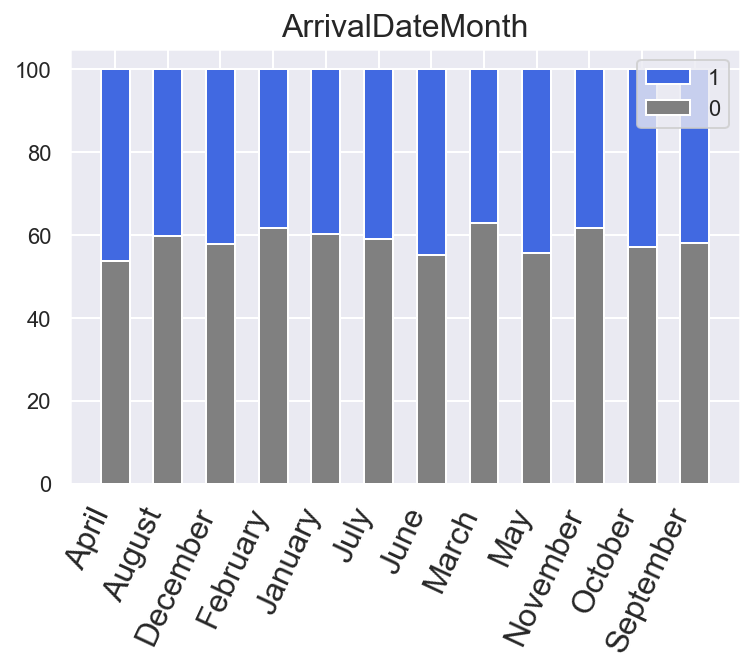

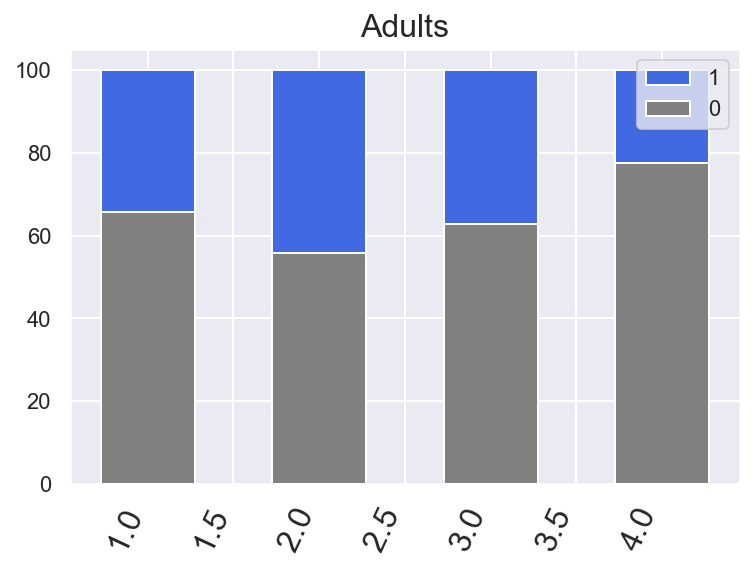

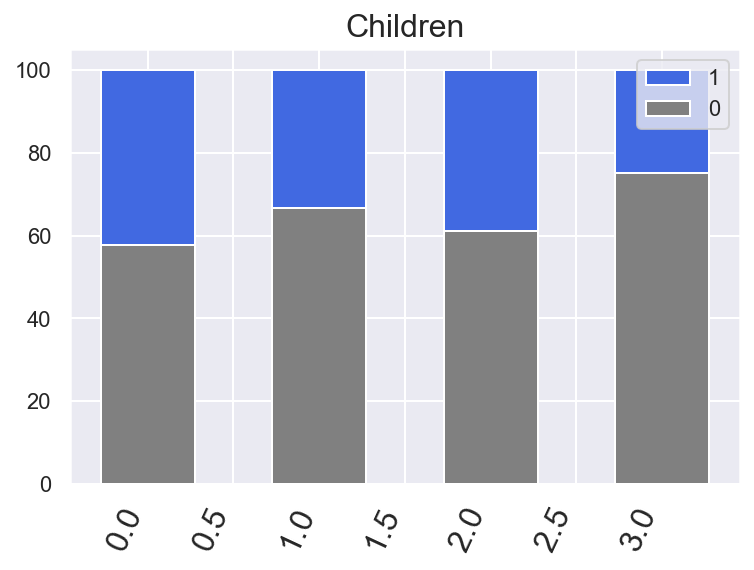

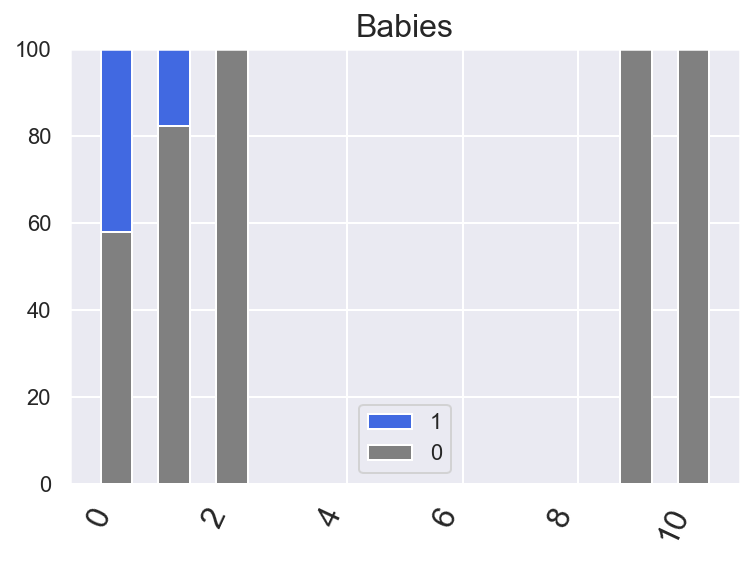

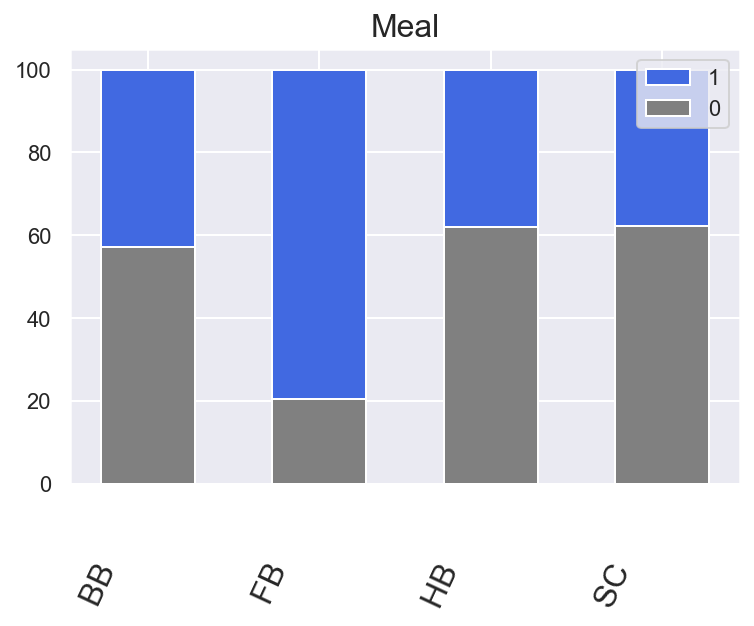

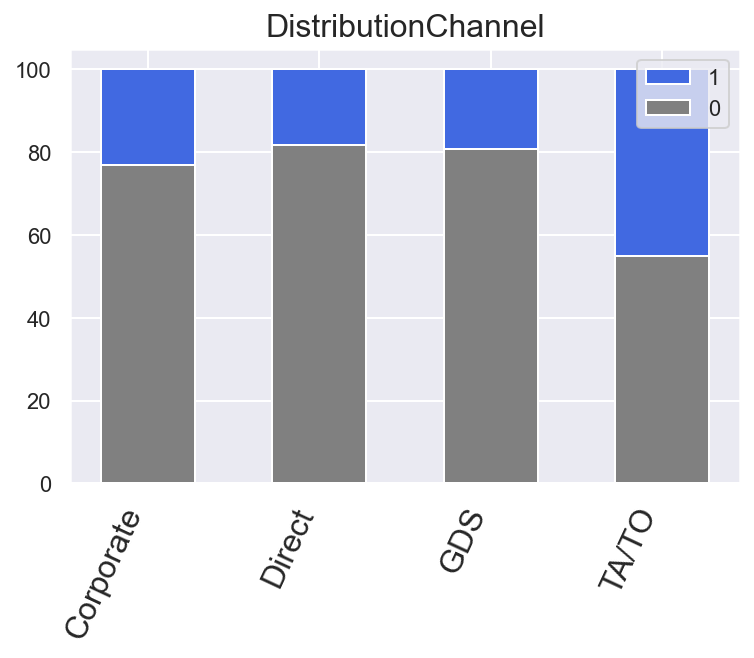

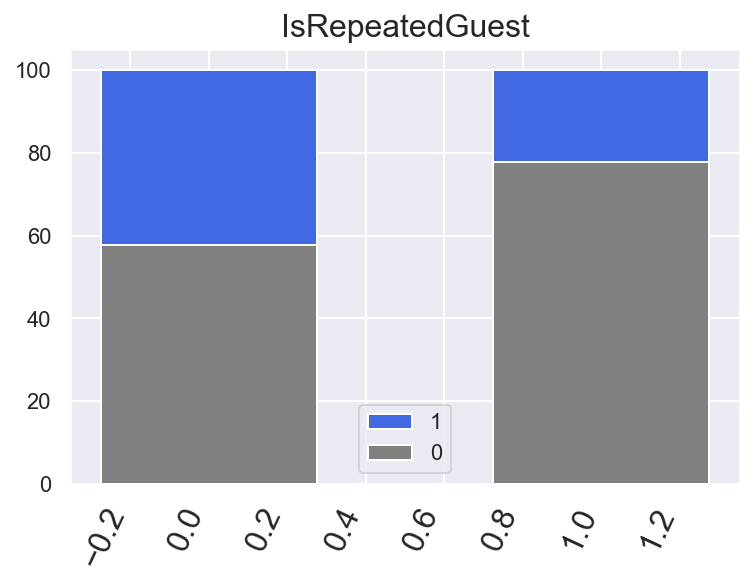

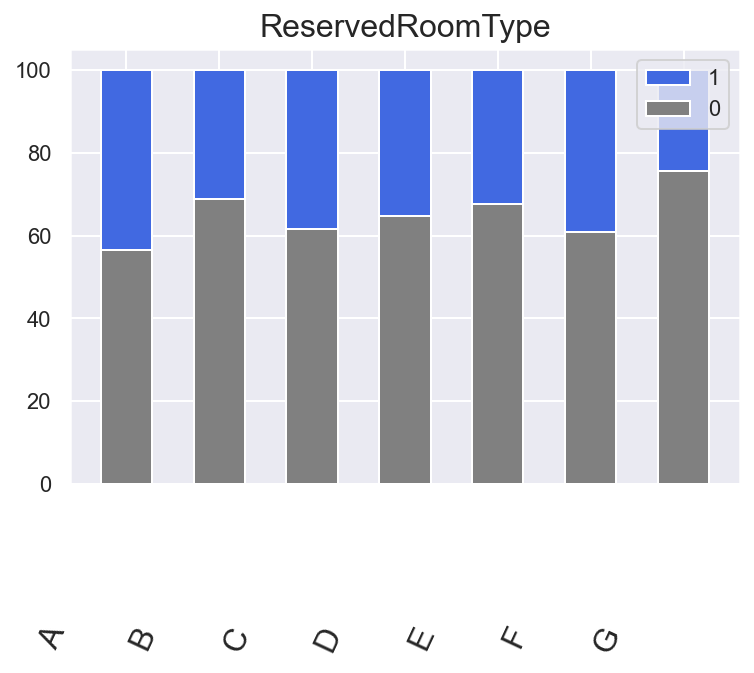

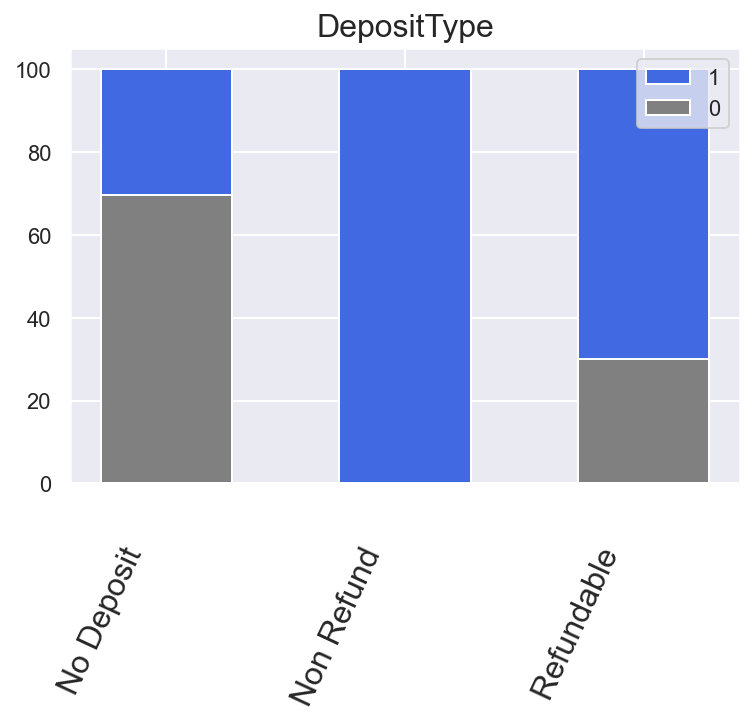

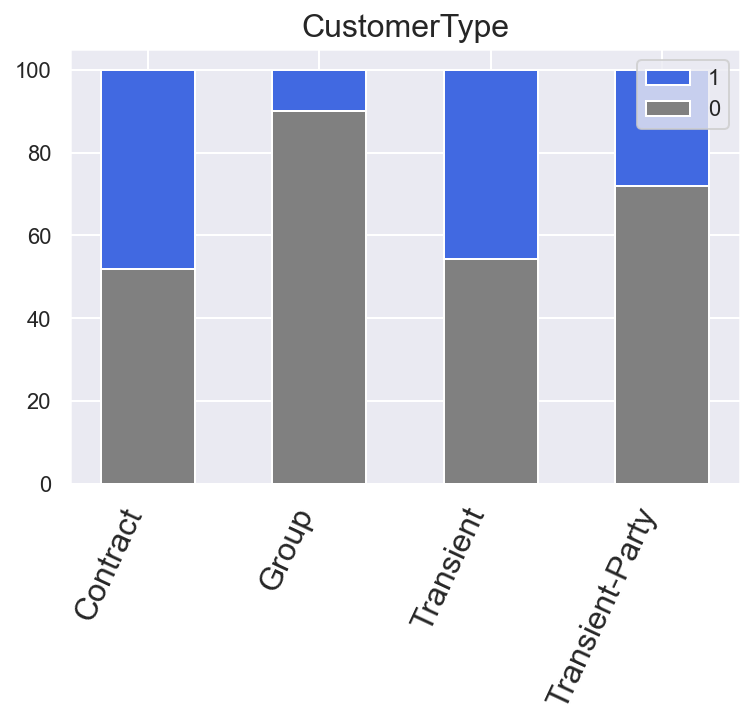

In [38]:
#Create visualizations separated by categorical target
#Remove target value of non_metric_features
non_metric_features2 = non_metric_features.copy()
non_metric_features2.remove("IsCanceled")

for feature in non_metric_features2:
    cont_tab = pd.crosstab(df1[feature], df1['IsCanceled'], margins = True)
    categories = cont_tab.index[:-1]
    obs_pct = np.array([(np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values))*100, 
                        (np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values))*100])
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="royalblue")
    plt.legend((p2[0], p1[0]), ('1', '0'))
    plt.title(feature, size = 16)
    plt.xticks(rotation=65, size = 16,ha = 'right')
    plt.show()

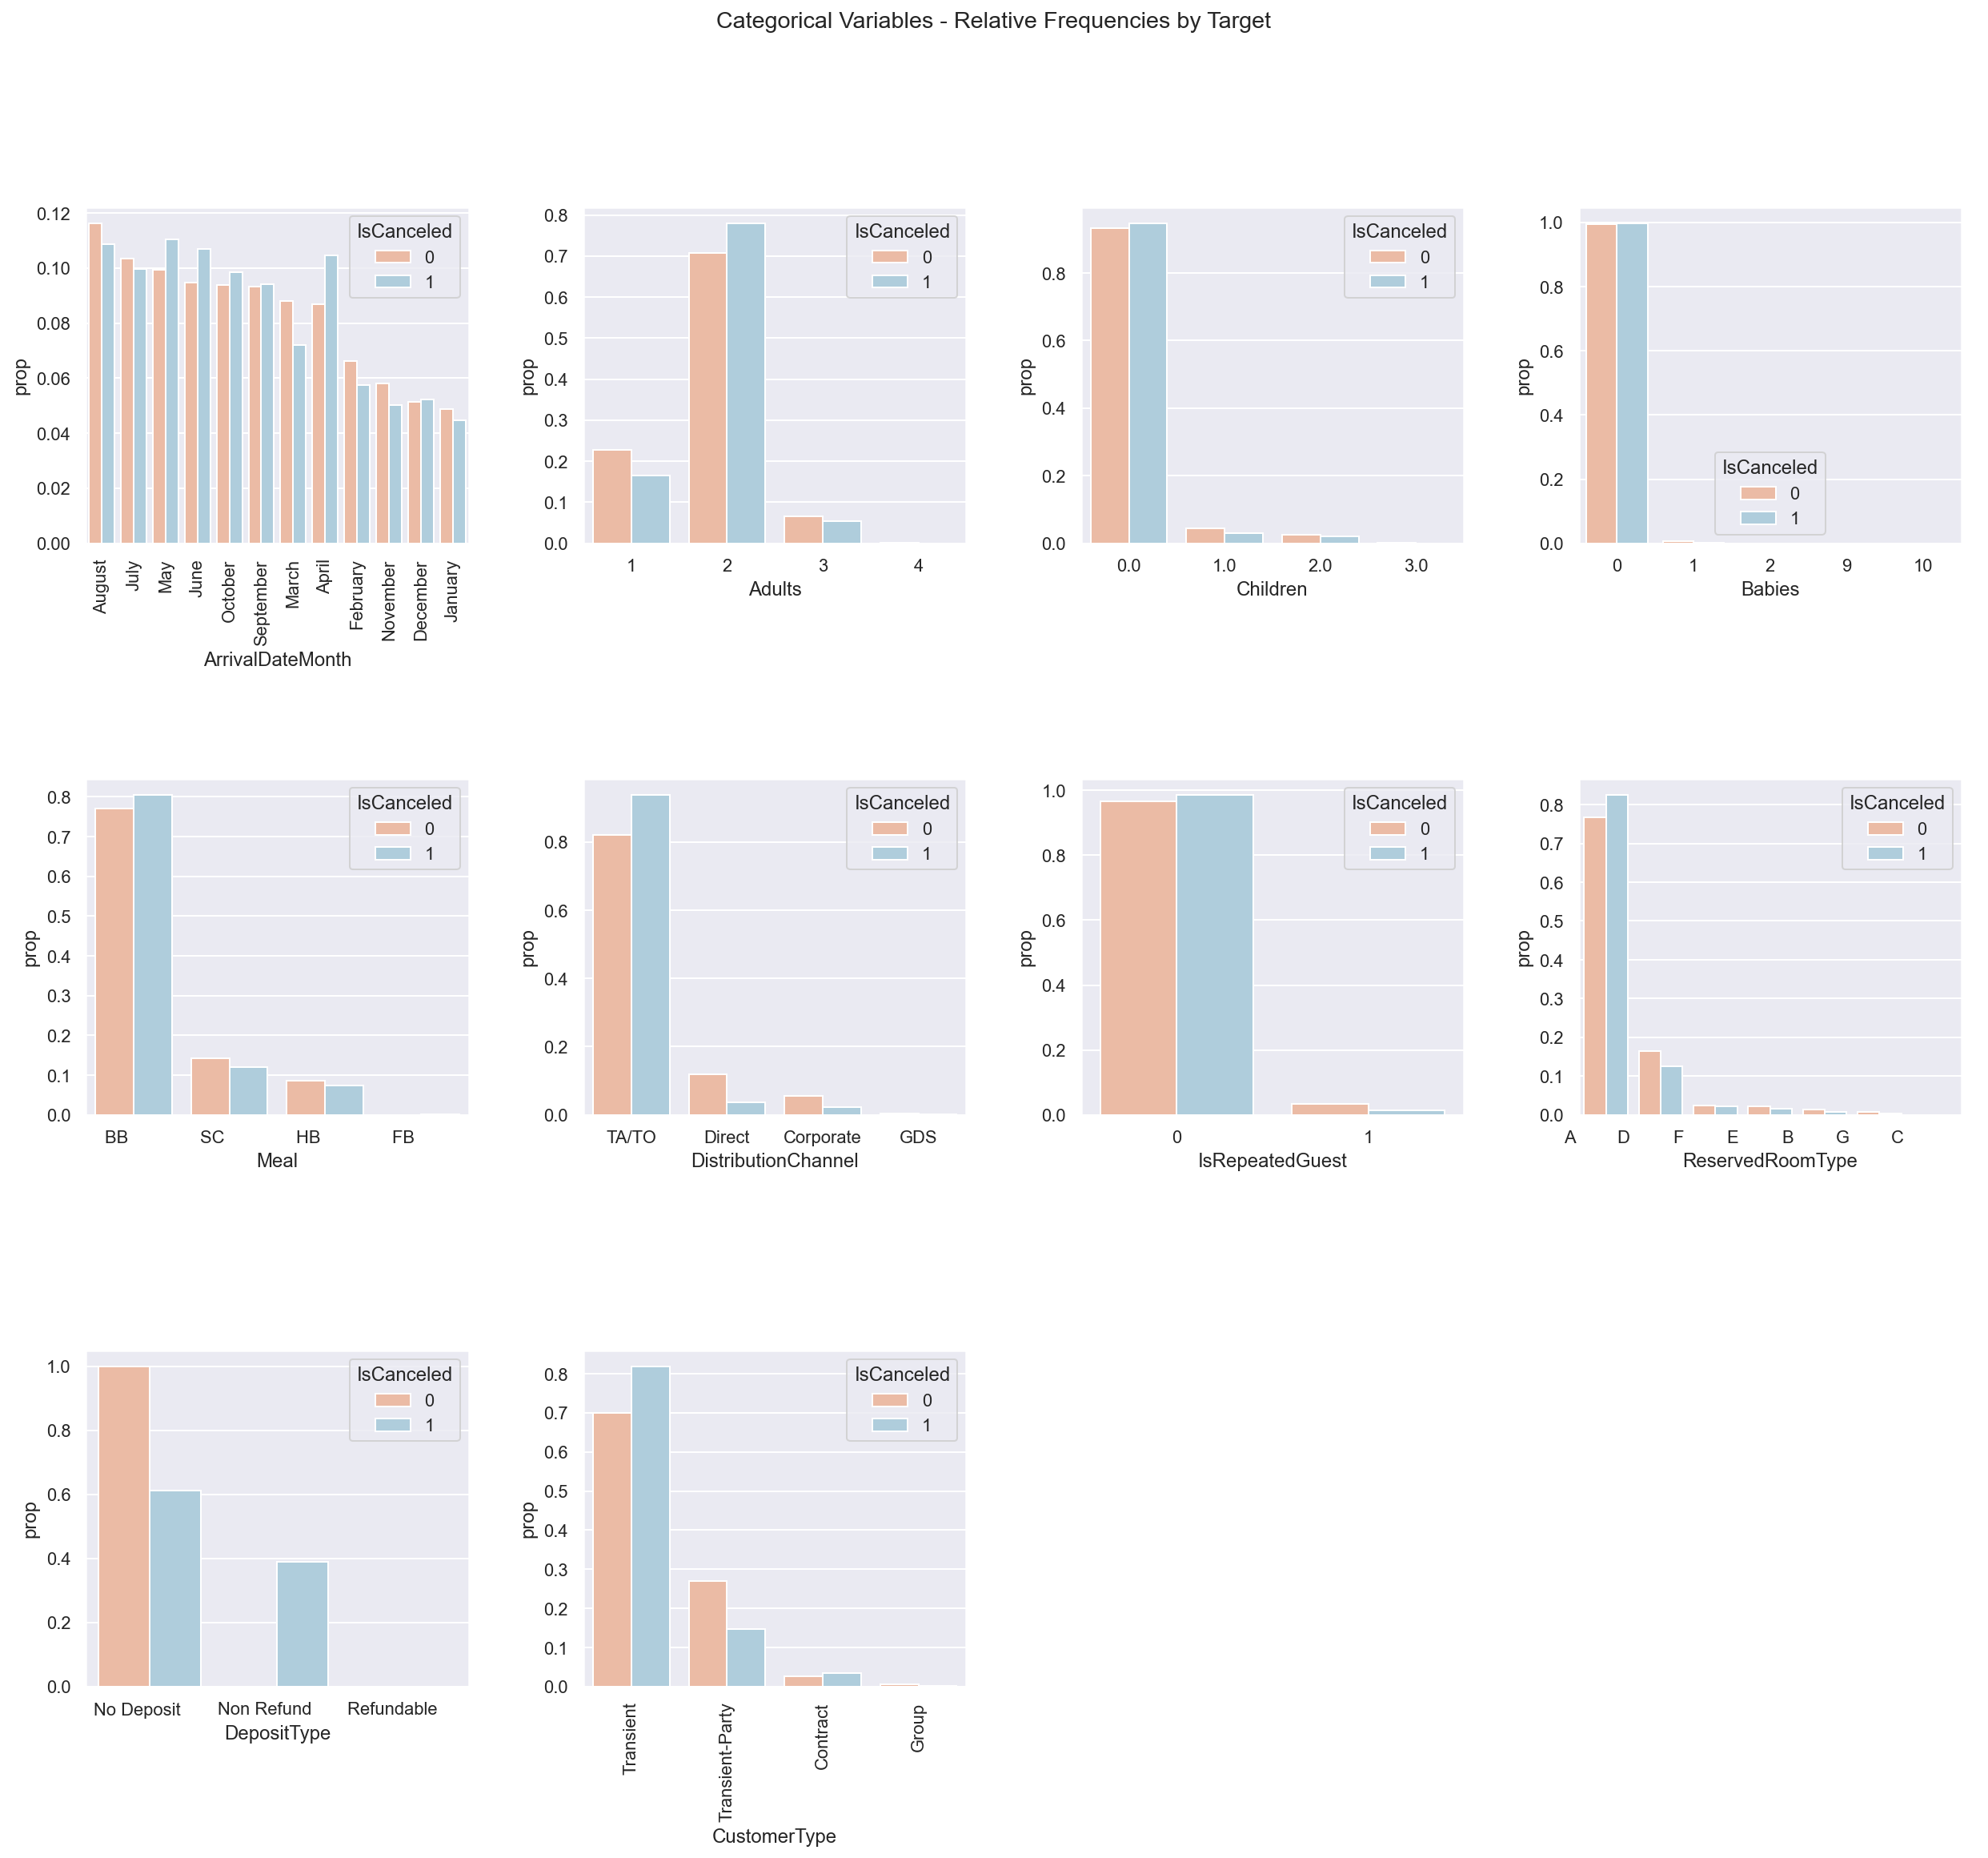

In [39]:
#Create visualizations separated by categorical target 
#Remove target value of non_metric_features
non_metric_features2 = non_metric_features.copy()
non_metric_features2.remove("IsCanceled")

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(3, ceil(len(non_metric_features2) / 3), figsize=(21, 17))

# Plot data
# Iterate across axes objects and associate each bar plot:
for ax, feat in zip(axes.flatten(), non_metric_features2):
    data = df1.groupby(['IsCanceled'])[feat].value_counts(normalize=True).rename('prop').reset_index()
    sns.barplot(data=data, x=feat, y='prop', hue='IsCanceled', ax=ax, palette = "RdBu")

#Add a title to the plot
title = "Categorical Variables - Relative Frequencies by Target"
plt.suptitle(title)
#Adjust the rotation of xlabels
axes.flatten()[0].tick_params(axis='x', labelrotation = 90)
axes.flatten()[9].tick_params(axis='x', labelrotation = 90)

#Adjust the space between the plots
plt.subplots_adjust(wspace=0.3, hspace=0.7)

#Remove the last 2 plots
axes.flatten()[-1].remove()
axes.flatten()[-2].remove()
plt.show()

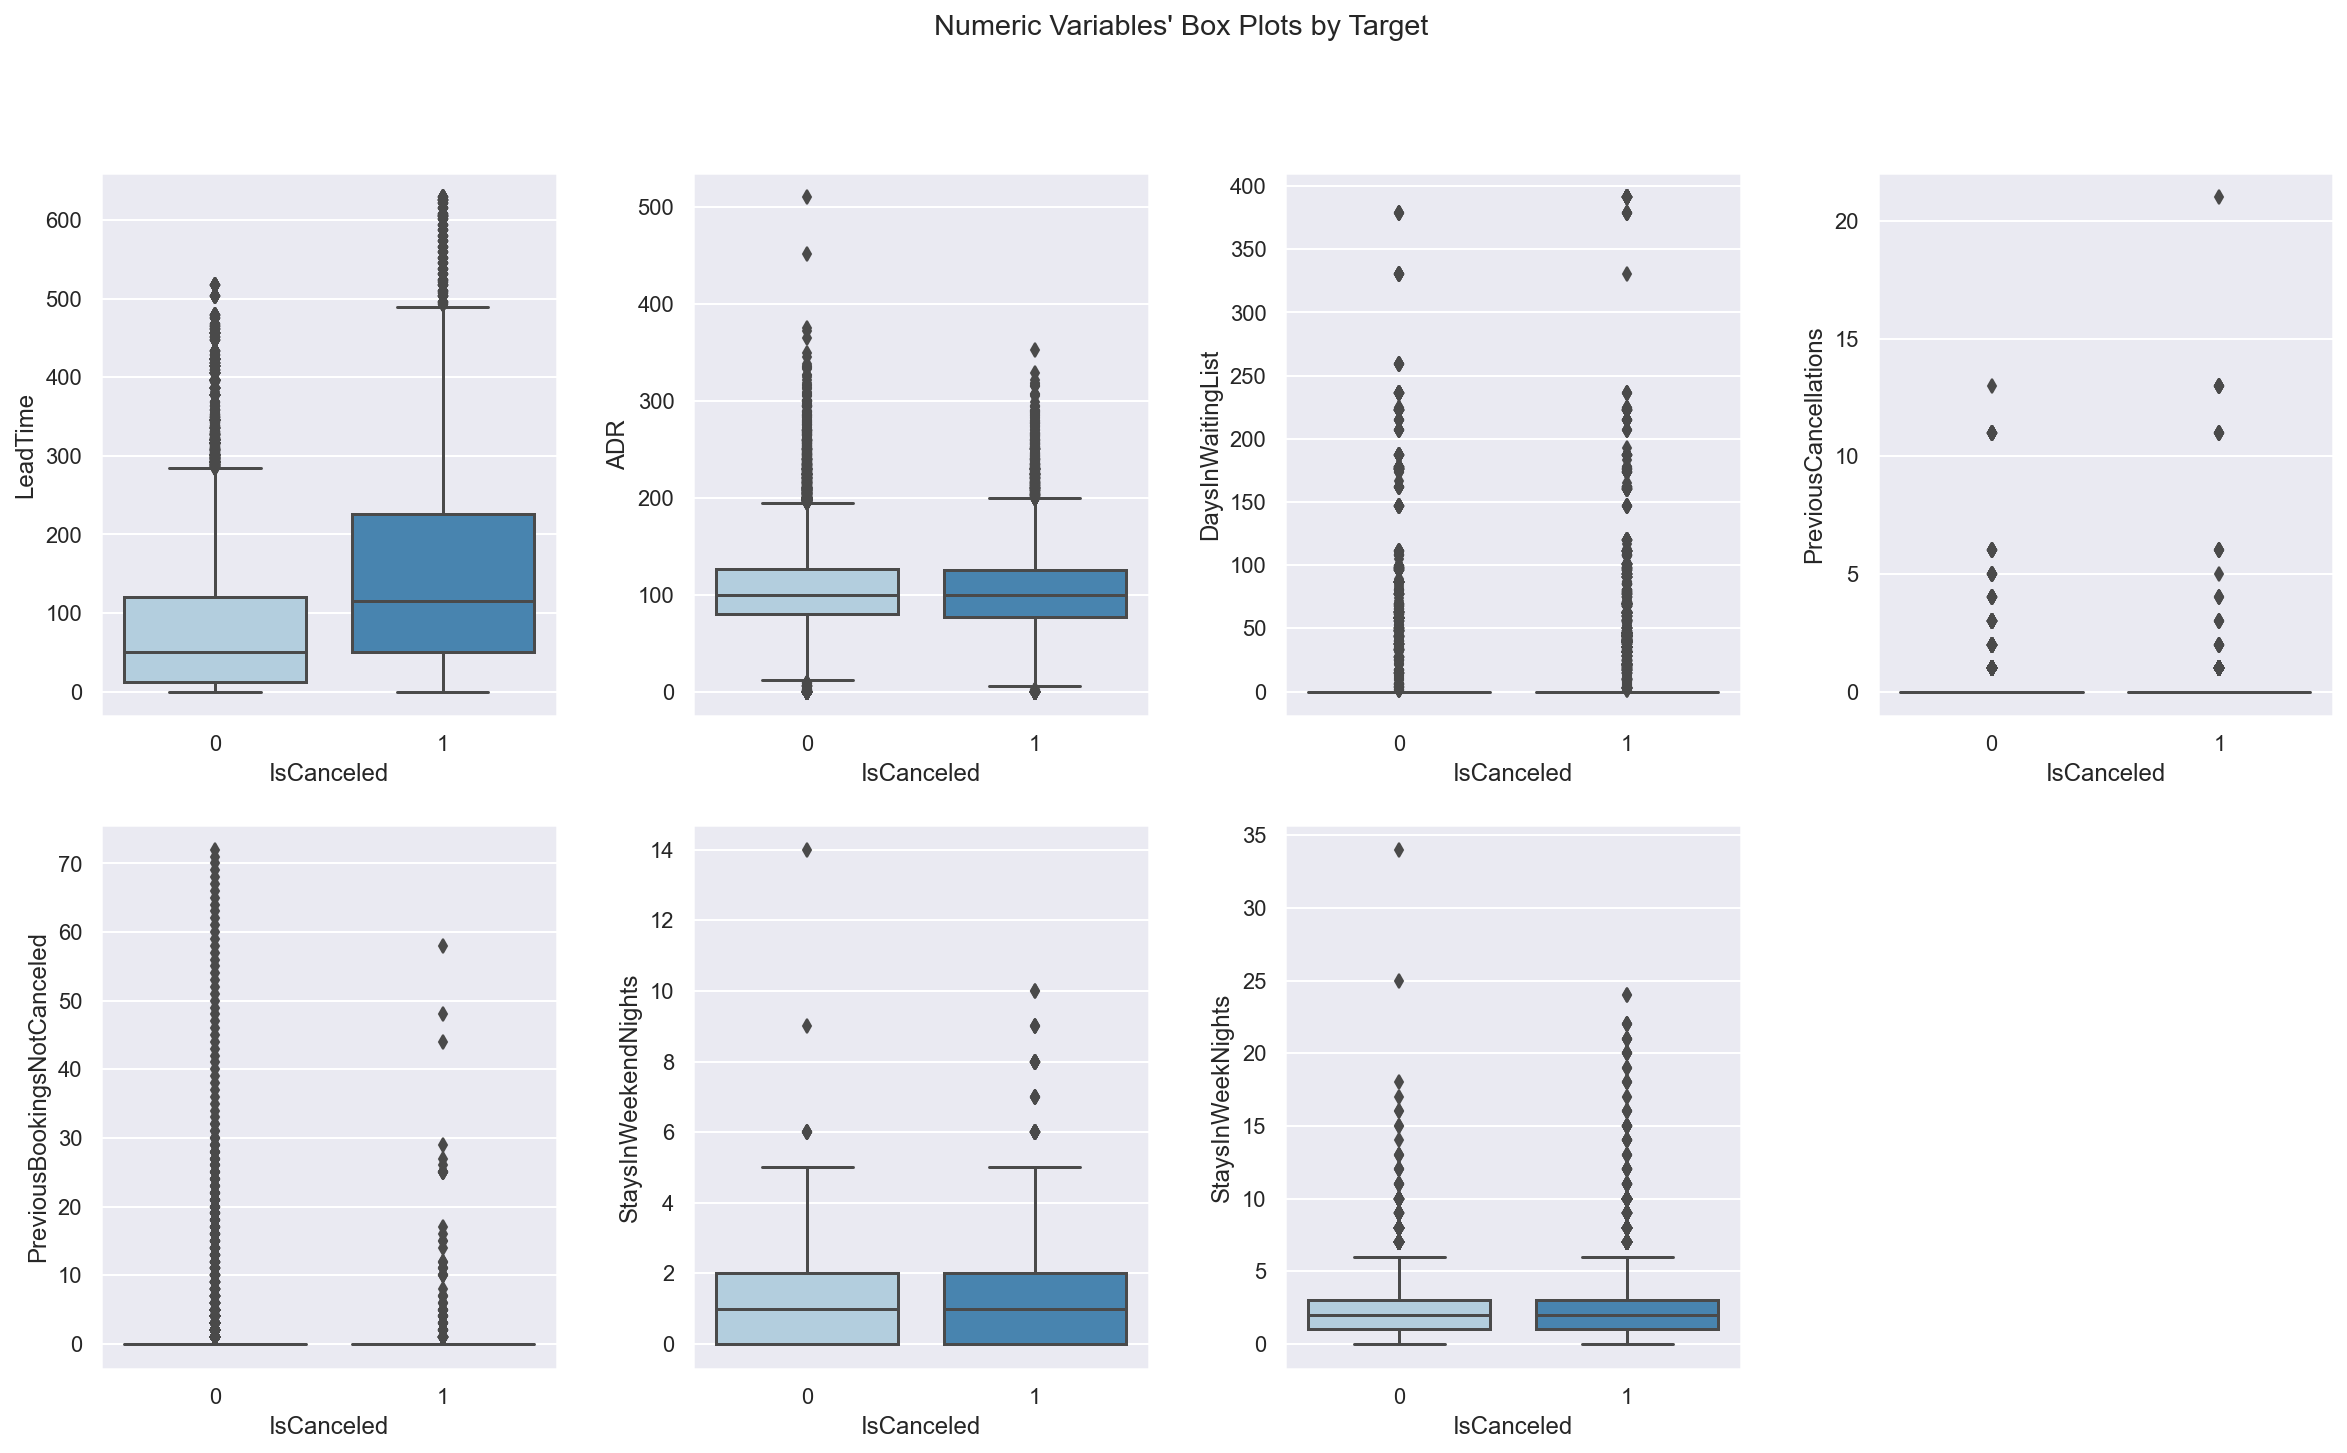

In [40]:
# All Numeric Variables' Box Plots in one figure separated by target
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=df1['IsCanceled'], y=df1[feat], ax=ax,palette="Blues")
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots by Target"
plt.suptitle(title)
plt.subplots_adjust(wspace=0.3)

#Remove the last  plot
axes.flatten()[-1].remove()

plt.show()

In [41]:
df1[df1['IsCanceled']==1].describe()

IsCanceled      LeadTime  StaysInWeekendNights  StaysInWeekNights        Adults      Children        Babies  IsRepeatedGuest  PreviousCancellations  PreviousBookingsNotCanceled  DaysInWaitingList           ADR
count     32976.0  32976.000000          32976.000000       32976.000000  32976.000000  32976.000000  32976.000000     32976.000000           32976.000000                 32976.000000       32976.000000  32976.000000
mean          1.0    150.320809              0.787209           2.265132      1.888919      0.074569      0.001910         0.013313               0.162057                     0.026140           4.748484    104.676117
std           0.0    124.163361              0.916728           1.525949      0.455848      0.337750      0.043668         0.114612               0.494395                     0.745194          24.715504     37.417516
min           1.0      0.000000              0.000000           0.000000      1.000000      0.000000      0.000000         0.000000               0.000000                     0.000000           0.000000      0.000000
25%           1.0     50.000000              0.000000           1.000000      2.000000      0.000000      0.000000         0.000000               0.000000                     0.000000           0.000000     76.500000
50%           1.0    115.000000              1.000000           2.000000      2.000000      0.000000      0.000000         0.000000               0.000000                     0.000000           0.000000     99.900000
75%           1.0    226.000000              2.000000           3.000000      2.000000      0.000000      0.000000         0.000000               0.000000                     0.000000           0.000000    125.800000
max           1.0    629.000000             10.000000          24.000000      4.000000      3.000000      1.000000         1.000000              21.000000                    58.000000         391.000000    352.500000

## Data Preparation:

### Dealing with Outliers

In [42]:
# Re-define metric features
metric_features = ['LeadTime','ADR','DaysInWaitingList','Adults','Children','Babies',
                   'PreviousCancellations','PreviousBookingsNotCanceled', 
                   'StaysInWeekendNights', 'StaysInWeekNights']
# Define non-metric features
non_metric_features = df1.columns.drop(metric_features).to_list()

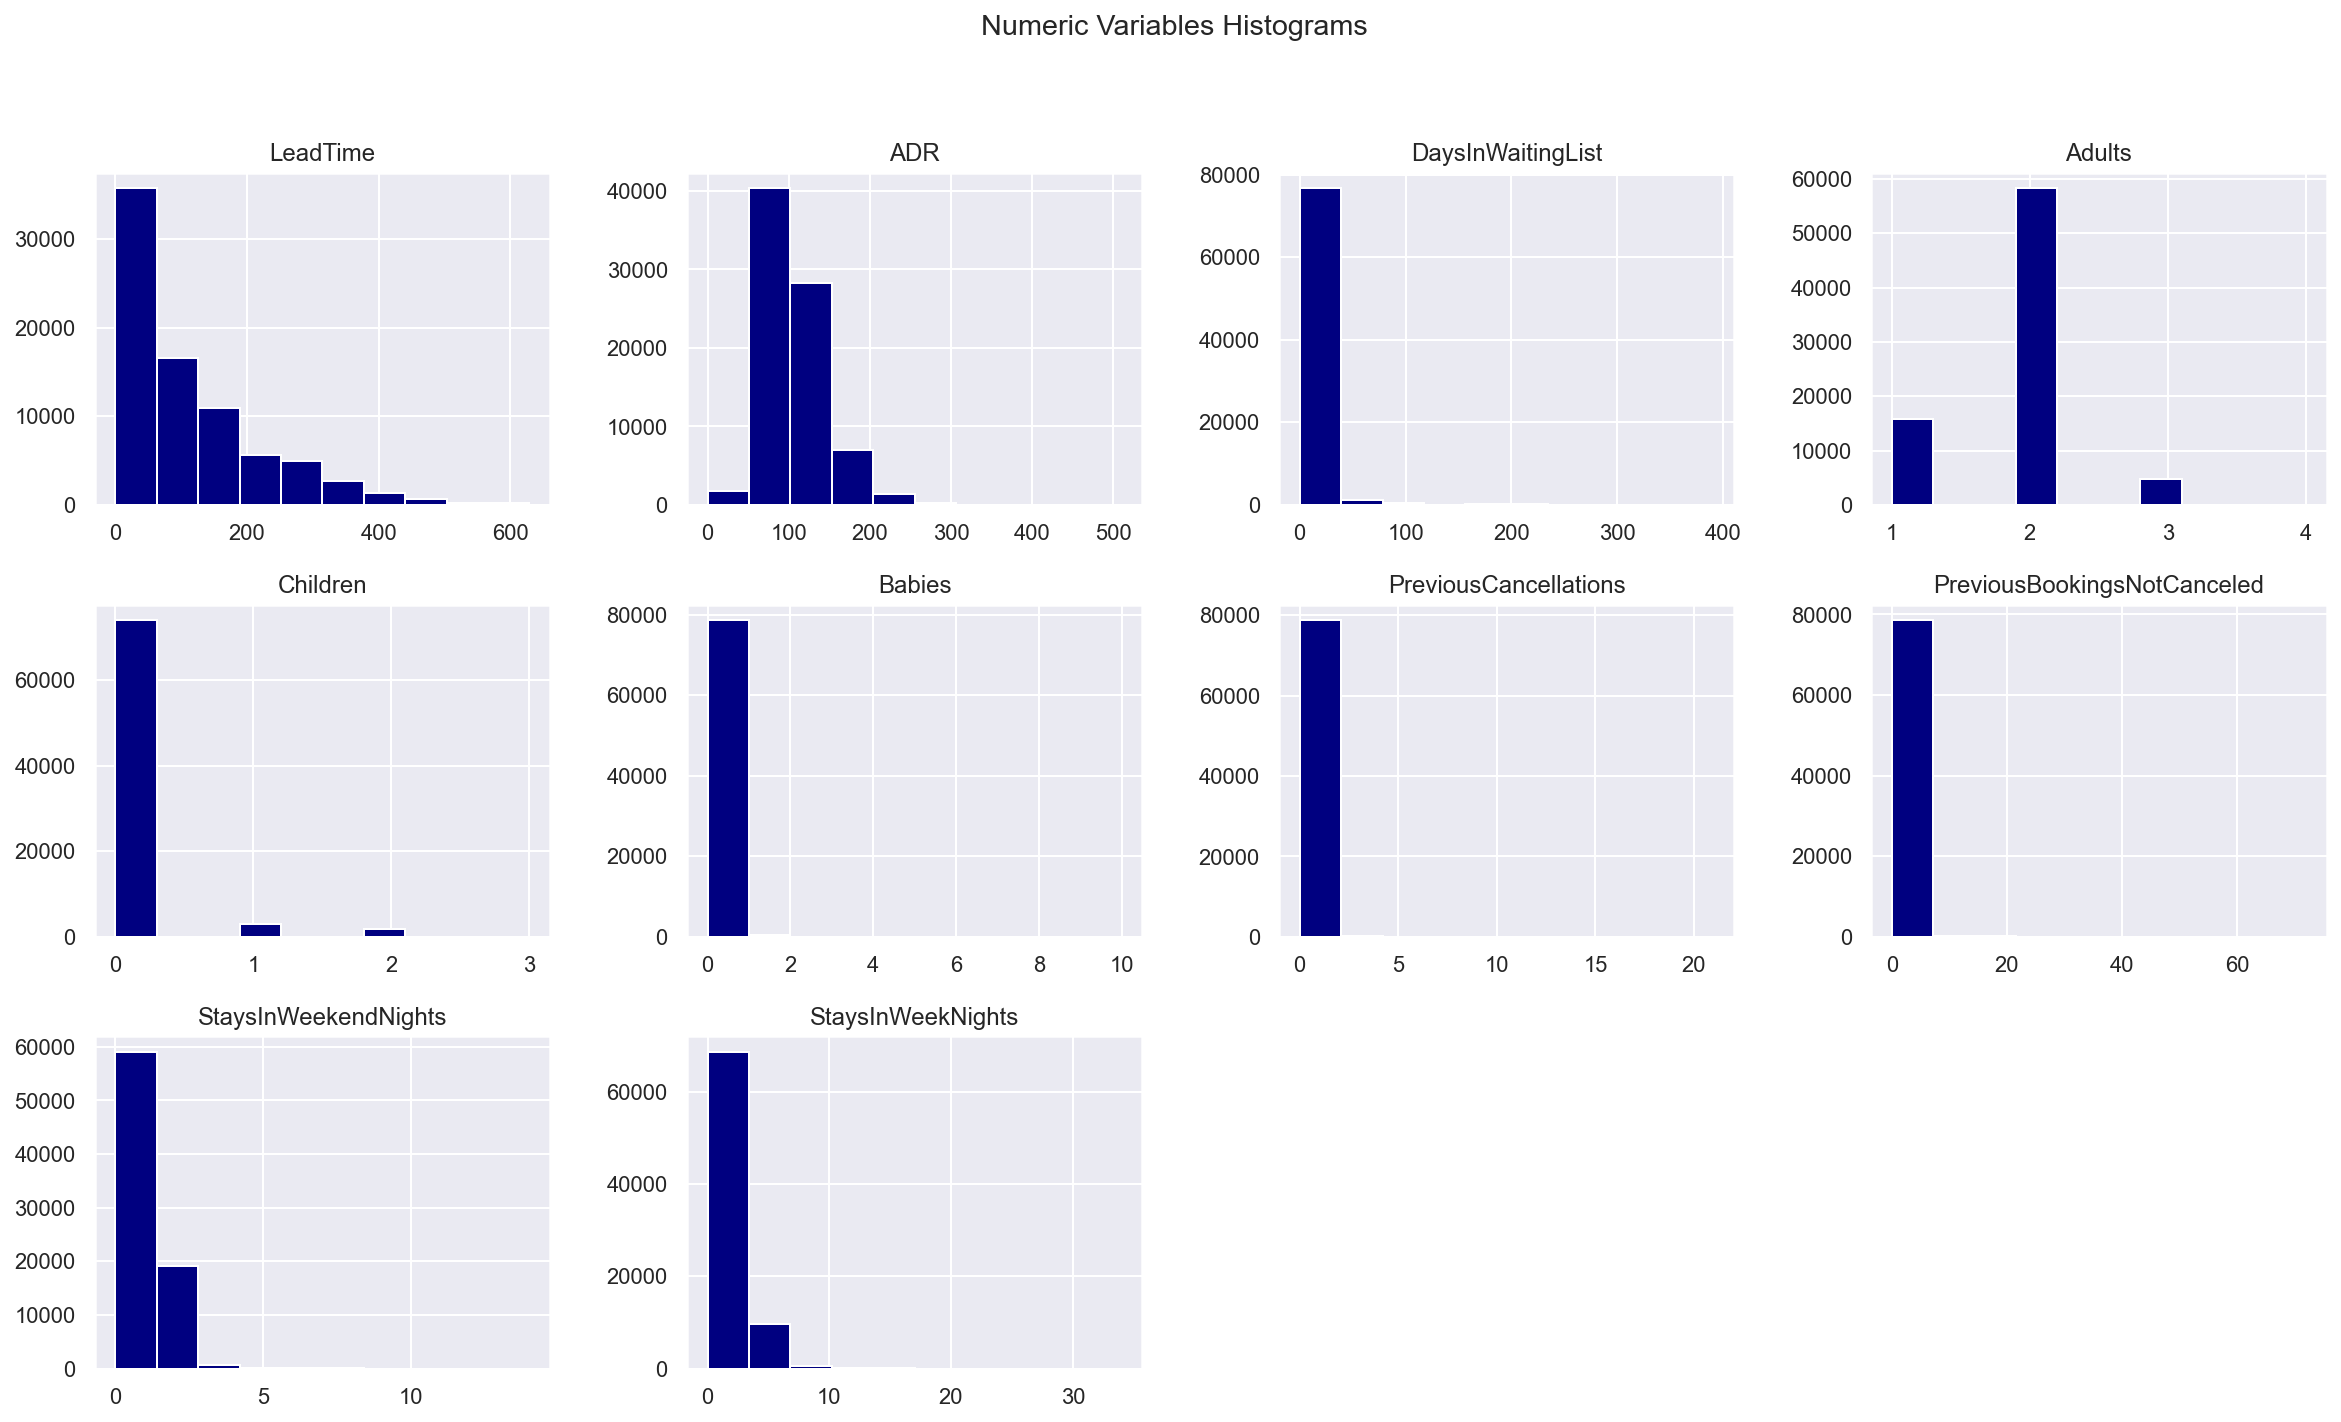

In [43]:
# Histograms for the metric features
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) / 3), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten(), metric_features): 
    ax.hist(df1[feat], color = "Navy")
    ax.set_title(feat)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables Histograms"
plt.suptitle(title)
#Adjust the space between plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Remove the last  2 plots
axes.flatten()[-1].remove()
axes.flatten()[-2].remove()

#Show Plot
plt.show()

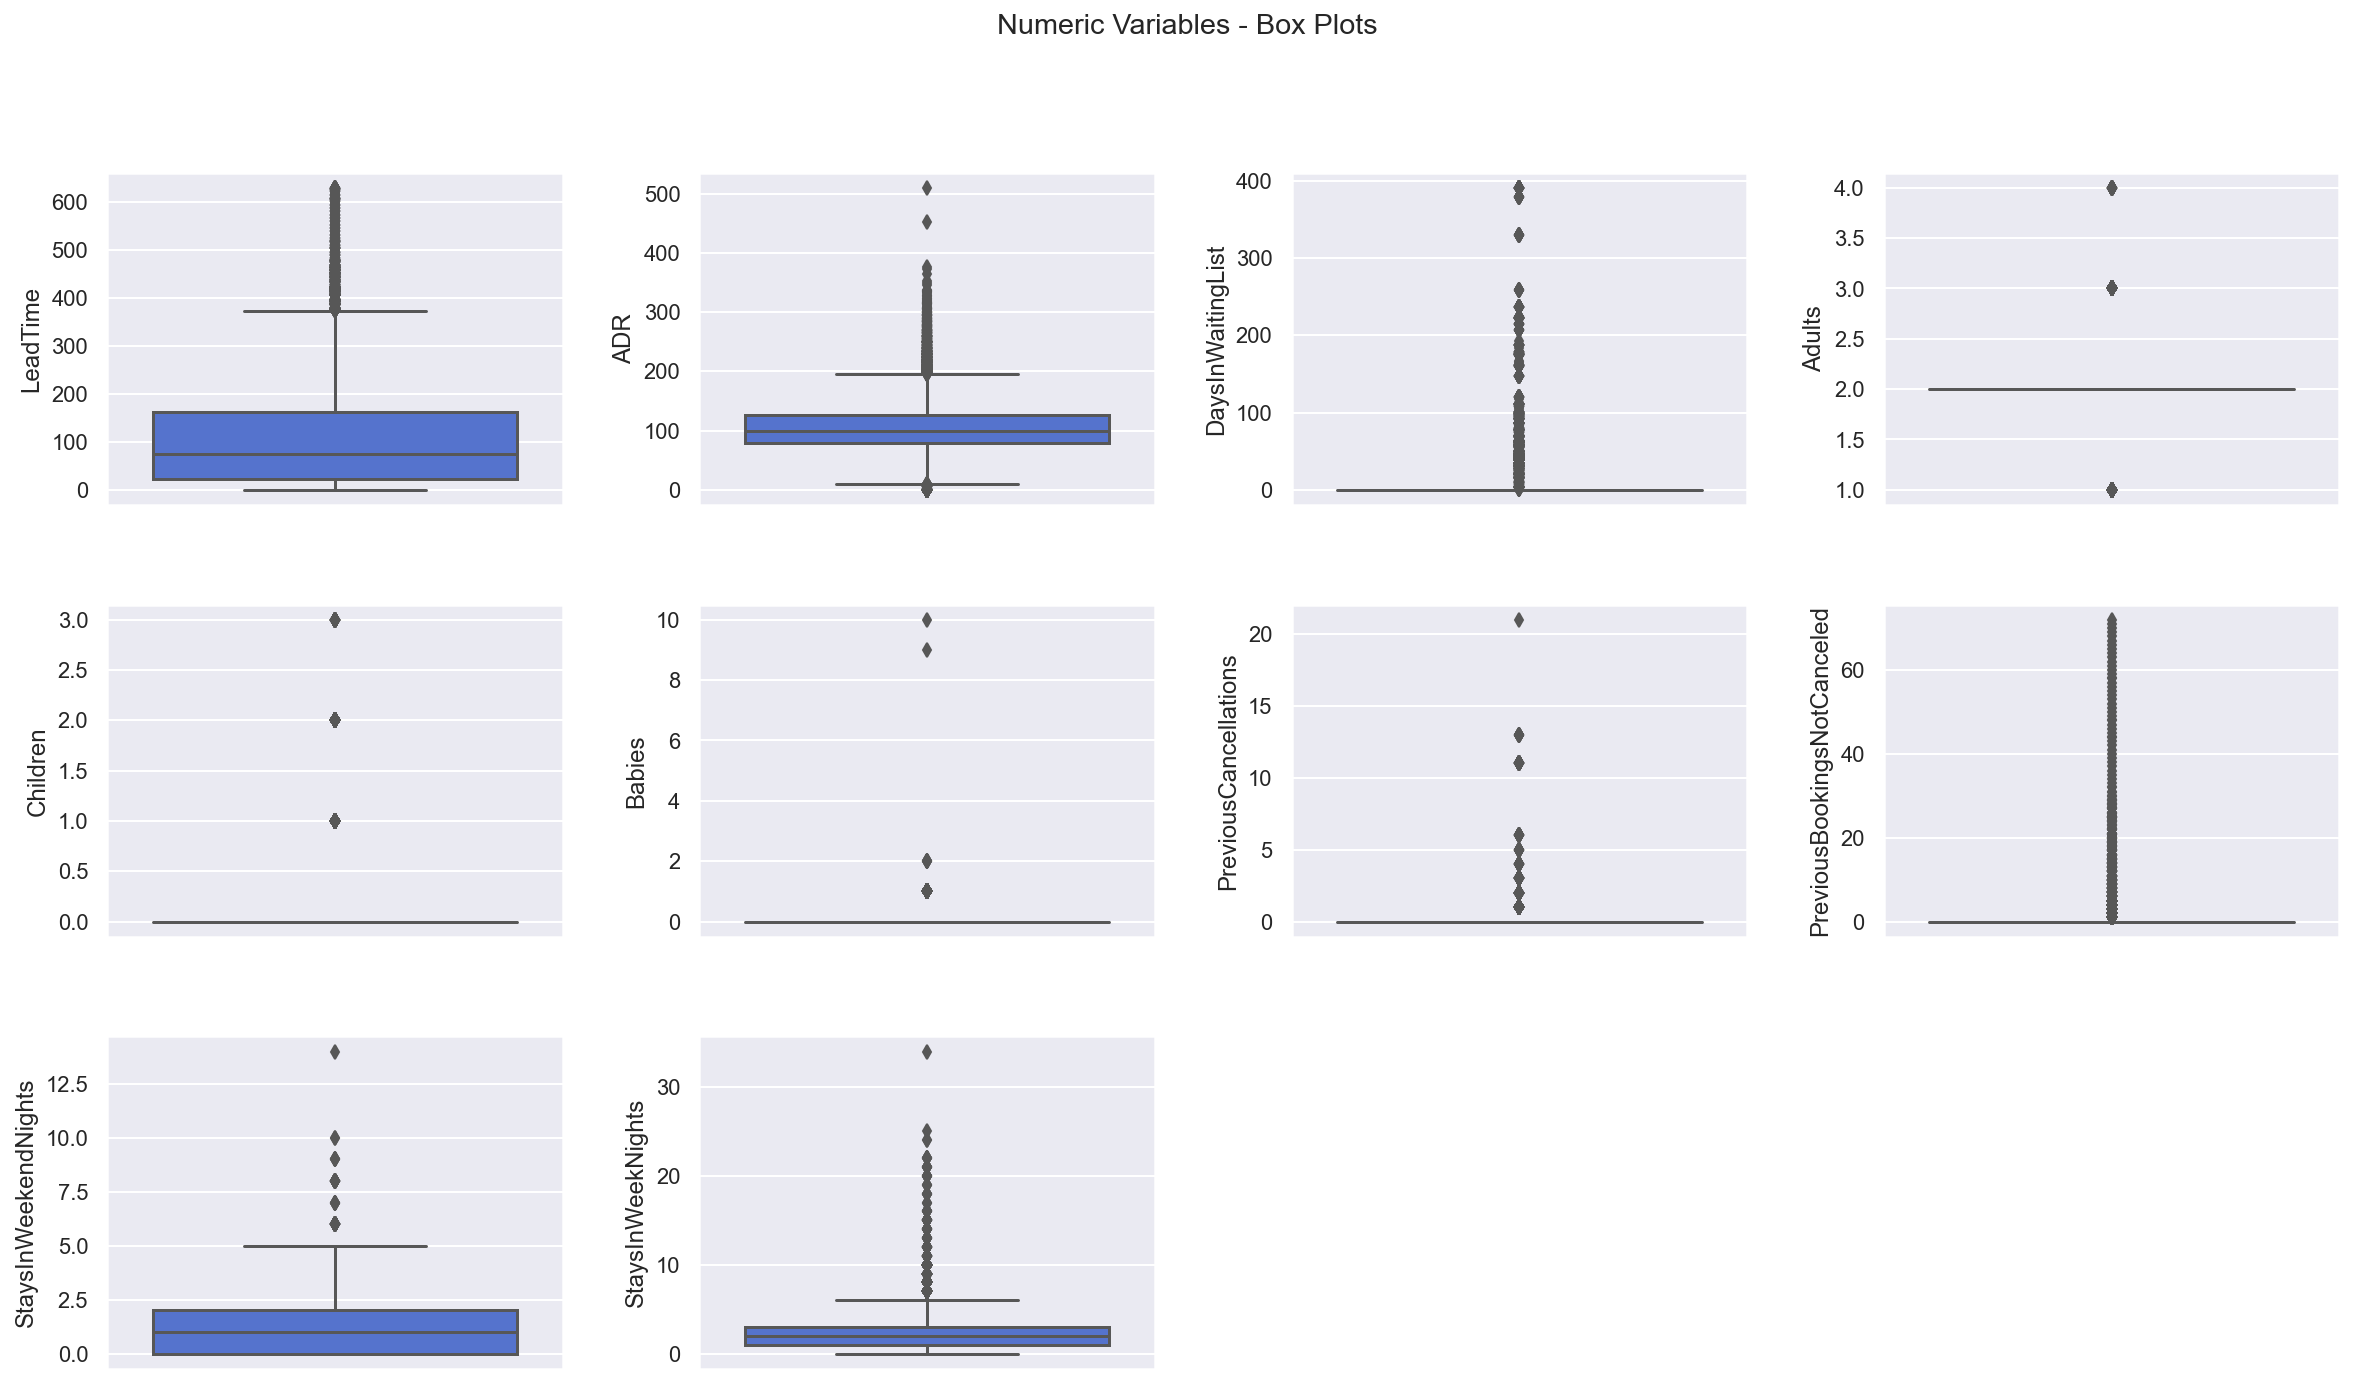

In [44]:
# Boxplots for the metric features
sns.set()

# Prepare figure and create individual axes where each box plot will be placed
fig, axes = plt.subplots(3, ceil(len(metric_features) /3), figsize=(20, 11))

# Plot the data
# Iterate across axes objects and associate each box plot
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(y=df1[feat], ax=ax,color="royalblue")
    
# Layout
# Add a centered title to the figure
title = "Numeric Variables - Box Plots"

plt.suptitle(title)

# Adjust the space between plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Remove the last  2 plots
axes.flatten()[-2].remove()
axes.flatten()[-1].remove()
# Show plots
plt.show()

In [45]:
#Standardize the data to run the outliers methods
#Select data - We exclude some numeric variables of this analysis because we considered they are really important for the 
#analysis and the points that seem be an outlier, we could excluded them and disturb the analysis 
outliers_features = ['LeadTime', 'ADR', 'DaysInWaitingList', 'Babies','StaysInWeekendNights', 'StaysInWeekNights']
df1_out = df1[outliers_features].copy()
# Create a StandardScaler
scale = StandardScaler()
# Fit and Transform data by applying the scale obtained in the previous command
scale_feat= scale.fit_transform(df1_out[outliers_features])
#Applying the transformation in the dataset
df1_out[outliers_features]=scale_feat
#Check the results
df1_out.head()

LeadTime       ADR  DaysInWaitingList    Babies  StaysInWeekendNights  StaysInWeekNights
0 -0.935419 -2.698630          -0.154946 -0.058458             -0.903439          -0.125323
1 -0.196715 -0.742107          -0.154946 -0.058458             -0.903439           1.270535
2 -0.403912 -0.959498          -0.154946 -0.058458             -0.903439           1.270535
3 -0.160681 -0.742107          -0.154946 -0.058458              1.373013           1.270535
4 -0.088612 -0.742107          -0.154946 -0.058458             -0.903439          -0.125323

In [46]:
#Check the statistics summary to check it worked
df1_out.describe().apply(lambda s: s.apply(lambda x:format(x,'g')))

LeadTime           ADR DaysInWaitingList        Babies StaysInWeekendNights StaysInWeekNights
count         78919         78919             78919         78919                78919             78919
mean   -3.66253e-15  -4.91353e-15       -1.4845e-13  -6.56873e-15          7.58048e-15       8.65388e-15
std         1.00001       1.00001           1.00001       1.00001              1.00001           1.00001
min        -0.98947      -2.69863         -0.154946    -0.0584582            -0.903439          -1.52118
25%       -0.782273     -0.673053         -0.154946    -0.0584582            -0.903439         -0.823252
50%       -0.322835     -0.141083         -0.154946    -0.0584582             0.234787         -0.125323
75%        0.478929      0.523879         -0.154946    -0.0584582              1.37301          0.572606
max         4.67693       10.3449           18.5352        118.54              15.0317           22.2084

#### We use 5 methods to recognize outliers:

In [47]:
#1) Zscore that checks how many standard deviations is a datapoint distant from the mean;
def out_zscore(df, threshold = 3.0):
    z = pd.DataFrame(np.abs(stats.zscore(df)), columns = df.columns, index = df.index)
    z = pd.DataFrame(z > threshold)
    return z.any(axis = 1).astype(int)

In [48]:
#2) InterQuantile Range method that creates boundaries using the first and thirs quantile and the interquantile range;
def out_iqr(df, multiplier = 3.0):
    q75 = df.quantile(0.75, axis = 0)
    q25 = df.quantile(0.25, axis = 0)
    iqr = q75 - q25
    lower_bound = q25 - multiplier*iqr
    upper_bound = q75 + multiplier*iqr
    return df.apply(lambda x: np.any((x<lower_bound) | (x>upper_bound)), 1).astype(int)

#### 3) Local Outlier Factor (LOF) is a function that detects outliers by comparing the density of the neighborhood of a point to the ones of its neighbors.

In [49]:
lof = LocalOutlierFactor(contamination = 'auto',metric = 'euclidean',n_neighbors=1)
lof_out = pd.Series(lof.fit_predict(df1_out), index = df1_out.index)
lof_out.value_counts(normalize = True)

 1    0.849795
-1    0.150205
dtype: float64

#### 4) At the basis of the Isolation Forest algorithm there is the tendency of anomalous instances in a dataset to be easier to separate from the rest of the sample (isolate), compared to normal points. In order to isolate a data point the algorithm recursively generates partitions on the sample by randomly selecting an attribute and then randomly selecting a split value for the attribute, between the minimum and maximum values allowed for that attribute. When all the trees are grown outliers are identified as points easier to isolate, therefore with a smaller path lenght in the tree, being closer to the root.

In [50]:
isolation_forest = IsolationForest(random_state = 7, contamination=  "auto")
isolation_forest.fit(df1_out) #same results with scaled
isofor_outliers = pd.Series(isolation_forest.predict(df1_out), index = df1_out.index)
isofor_outliers.value_counts(normalize = True)

 1    0.90247
-1    0.09753
dtype: float64

#### 5) One-Class SVM is similar to support vector machine, but instead of using a hyperplane to separate two classes of instances, it uses a hypersphere to encompass all of the instances. The algorithm will try to find the smallest possible hypersphere and point outside of it will be considered outliers. One bad thing of this algorithm is that you have to set in advance the percentage of points that you think are outliers, in this case we use the one retrieved from Isolation Forest.

In [51]:
outliers_fraction =   0.096
auto_detection = svm.OneClassSVM(kernel='rbf', gamma=0.01, degree=3, nu=outliers_fraction)
auto_detection.fit(df1_out)
svm_outliers = pd.Series(auto_detection.predict(df1_out), index = df1_out.index)
svm_outliers.value_counts(normalize = True)

 1    0.903901
-1    0.096099
dtype: float64

In [52]:
#Including columns with the results of each method in the dataset to compare the different methods and also combine them.
df1_out['zscore'] = out_zscore(df1_out)

df1_out['iqr'] = out_iqr(df1_out, multiplier = 3)

df1_out['lof_out'] = [0 for i in range(len(df1_out))]
df1_out.loc[lof_out[lof_out == -1].index, 'lof_out'] = 1

df1_out['isofor_out'] = [0 for i in range(len(df1_out))]
df1_out.loc[isofor_outliers[isofor_outliers == -1].index, 'isofor_out'] = 1

df1_out['svm_out'] = [0 for i in range(len(df1_out))]
df1_out.loc[svm_outliers[svm_outliers == -1].index, 'svm_out'] = 1

df1_out['sum_out']  = df1_out[['zscore','iqr','svm_out','lof_out','isofor_out']].apply(lambda x: sum(x), axis = 1)

In [53]:
#Create a dataset for see the outliers detect by each model
outliers = df1_out[['zscore','iqr','svm_out','lof_out','isofor_out']]
outliers.groupby(['zscore','iqr','svm_out','lof_out','isofor_out'])\
            .size()\
            .to_frame()

0
zscore iqr svm_out lof_out isofor_out       
0      0   0       0       0           57762
                           1             727
                   1       0           10609
                           1             108
           1       0       0            1034
                           1            1667
                   1       0             247
                           1             233
       1   0       0       0             984
                           1            1040
                   1       0              54
                           1              31
           1       0       1              18
                   1       1              11
1      1   0       0       1              20
           1       0       0             443
                           1            3370
                   1       0              89
                           1             472

In [54]:
#Show the number of outliers detect by z-score individually
df1_out['zscore'].value_counts()

0    74525
1     4394
Name: zscore, dtype: int64

In [55]:
#Show the number of outliers detect by IQR individually
df1_out['iqr'].value_counts()

0    72387
1     6532
Name: iqr, dtype: int64

In [56]:
#Show the number of outliers detect by combined methods. 
df1_out['sum_out'].value_counts()

0    57762
1    13354
4     3470
2     3116
3      745
5      472
Name: sum_out, dtype: int64

In [57]:
#Chose the number 5 with the best possible solution of combined methods
df1_out2 = df1.loc[df1_out.query('sum_out == 5').index]
df2 = df1.drop(index = df1_out.query('sum_out == 5').index)

In [58]:
#Look at the results
df2

IsCanceled  LeadTime ArrivalDateMonth  StaysInWeekendNights  StaysInWeekNights  Adults  Children  Babies       Meal DistributionChannel  IsRepeatedGuest  PreviousCancellations  PreviousBookingsNotCanceled  ReservedRoomType      DepositType  DaysInWaitingList CustomerType     ADR
0               0         6             July                     0                  2       1       0.0       0  HB                      TA/TO                0                      0                            0  A                 No Deposit                       0    Transient    0.00
1               1        88             July                     0                  4       2       0.0       0  BB                      TA/TO                0                      0                            0  A                 No Deposit                       0    Transient   76.50
2               1        65             July                     0                  4       1       0.0       0  BB                      TA/TO                0                      0                            0  A                 No Deposit                       0    Transient   68.00
3               1        92             July                     2                  4       2       0.0       0  BB                      TA/TO                0                      0                            0  A                 No Deposit                       0    Transient   76.50
4               1       100             July                     0                  2       2       0.0       0  BB                      TA/TO                0                      0                            0  A                 No Deposit                       0    Transient   76.50
...           ...       ...              ...                   ...                ...     ...       ...     ...        ...                 ...              ...                    ...                          ...               ...              ...                ...          ...     ...
79325           0        23           August                     2                  5       2       0.0       0  BB                      TA/TO                0                      0                            0  A                 No Deposit                       0    Transient   96.14
79326           0       102           August                     2                  5       3       0.0       0  BB                      TA/TO                0                      0                            0  E                 No Deposit                       0    Transient  225.43
79327           0        34           August                     2                  5       2       0.0       0  BB                      TA/TO                0                      0                            0  D                 No Deposit                       0    Transient  157.71
79328           0       109           August                     2                  5       2       0.0       0  BB                      TA/TO                0                      0                            0  A                 No Deposit                       0    Transient  104.40
79329           0       205           August                     2                  7       2       0.0       0  HB                      TA/TO                0                      0                            0  A                 No Deposit                       0    Transient  151.20

[78447 rows x 18 columns]

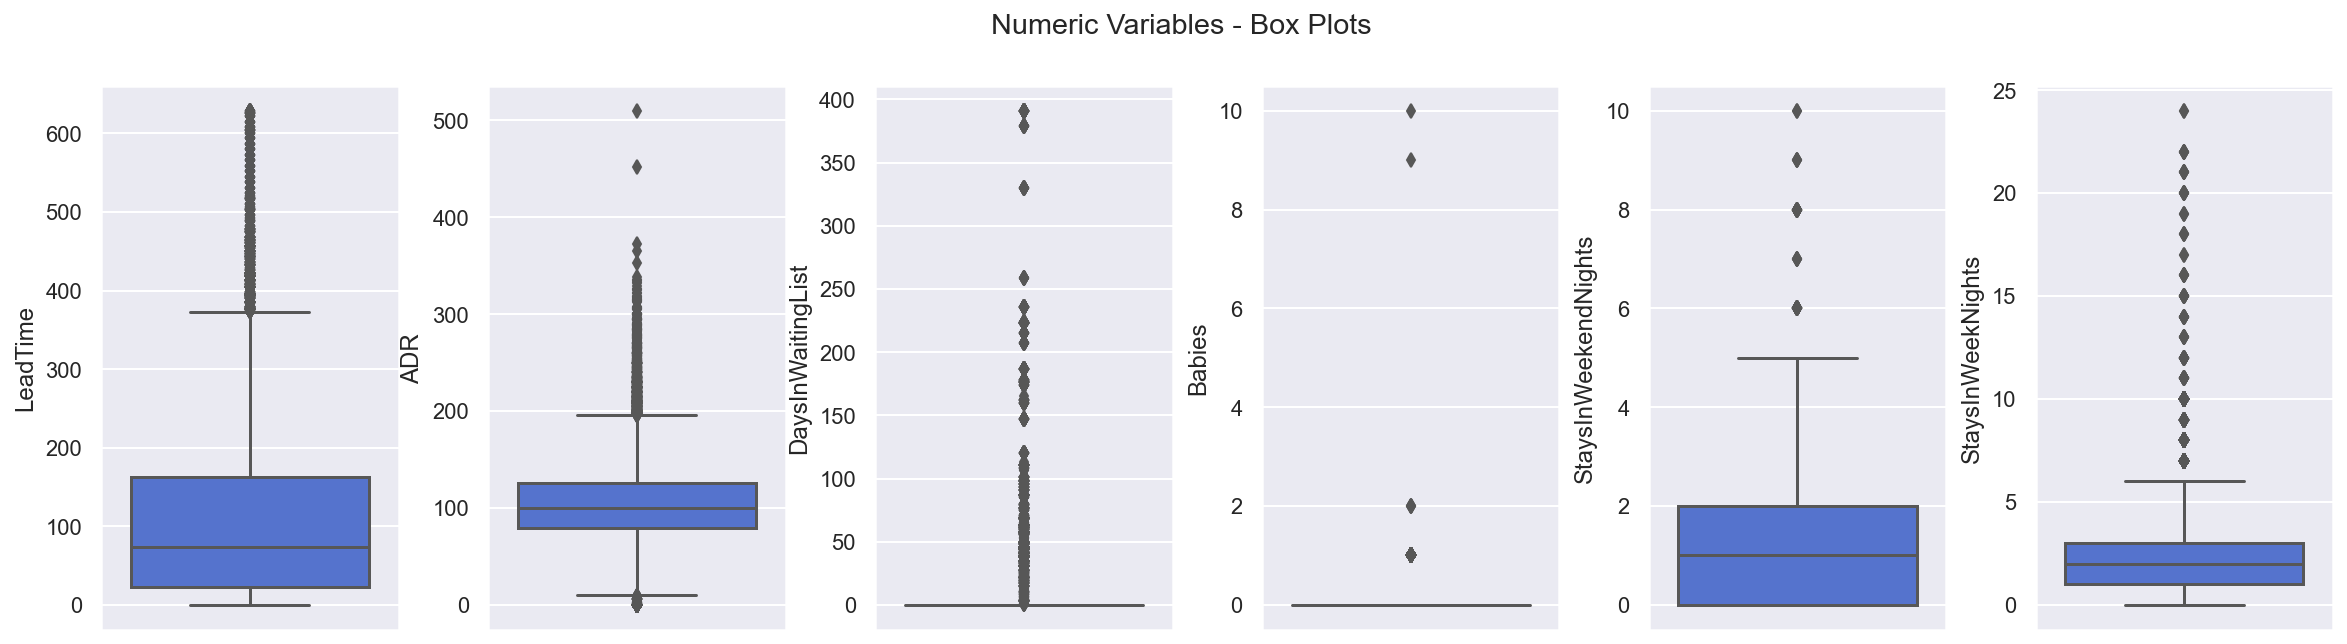

In [59]:
#Check boxplots after outliers removal
# Box plots for the metric features
sns.set()

# Prepare figure and create individual axes where each box plot will be placed
fig, axes = plt.subplots(1, ceil(len(outliers_features) /1), figsize=(20, 5))

# Plot the data
# Iterate across axes objects and associate each box plot
for ax, feat in zip(axes.flatten(), outliers_features):
    sns.boxplot(y= df2[feat], ax=ax,color="royalblue")
    
# Layout
# Add a centered title to the figure
title = "Numeric Variables - Box Plots"

plt.suptitle(title)

# Adjust the space between plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Remove the last  2 plots
#axes.flatten()[-2].remove()
#axes.flatten()[-1].remove()
# Show plots
plt.show()

##### After testing removing based on 5 combined methods and realising that did not seem to make a big difference on the box plots in terms of outliers, we have dropped this approach and decided to apply manual filters only on five features 

##### For the features Drywh, Freq the best multiplier is 1 and for the features Dessert,Sweetred,Sweetwh, the best multiplier is 4.5

In [60]:

#hand made outliers
filters1 = (

    
    (df1['Babies']<=4)
    &
    (df1['ADR']<=400)
    &
    (df1['ADR']>=32)
    &
    (df1['DaysInWaitingList']<120)
    &
    (df1['StaysInWeekendNights']<=2)
    &
    (df1['StaysInWeekNights']<=6)
    
)

   
df1_outfilter = df1[filters1]
print('Percentage of data kept after removing outliers:', np.round(df1_outfilter.shape[0] / df1.shape[0], 4))

Percentage of data kept after removing outliers: 0.9655


In [61]:
df1.shape[0]

78919

In [62]:
#Check the results
df1_outfilter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76200 entries, 1 to 79328
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   76200 non-null  int64  
 1   LeadTime                     76200 non-null  int64  
 2   ArrivalDateMonth             76200 non-null  object 
 3   StaysInWeekendNights         76200 non-null  int64  
 4   StaysInWeekNights            76200 non-null  int64  
 5   Adults                       76200 non-null  int64  
 6   Children                     76200 non-null  float64
 7   Babies                       76200 non-null  int64  
 8   Meal                         76200 non-null  object 
 9   DistributionChannel          76200 non-null  object 
 10  IsRepeatedGuest              76200 non-null  int64  
 11  PreviousCancellations        76200 non-null  int64  
 12  PreviousBookingsNotCanceled  76200 non-null  int64  
 13  ReservedRoomType

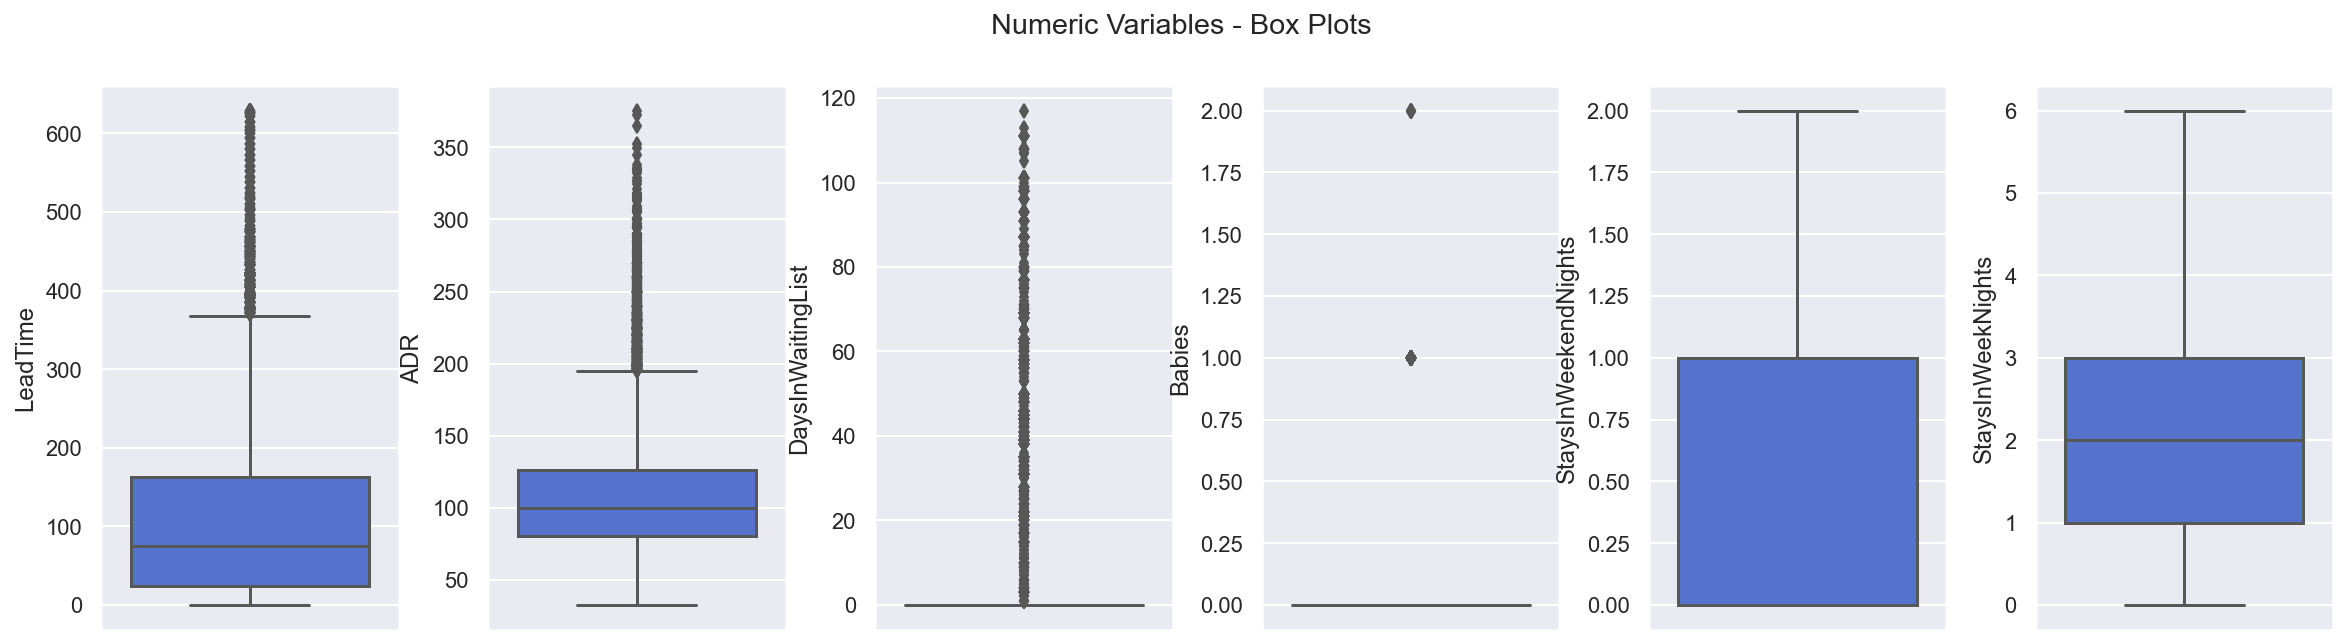

In [63]:
#Check boxplots after outliers removal
# Box plots for the metric features
sns.set()

# Prepare figure and create individual axes where each box plot will be placed
fig, axes = plt.subplots(1, ceil(len(outliers_features) /1), figsize=(20, 5))

# Plot the data
# Iterate across axes objects and associate each box plot
for ax, feat in zip(axes.flatten(), outliers_features):
    sns.boxplot(y = df1_outfilter[feat], ax=ax,color="royalblue")
    
# Layout
# Add a centered title to the figure
title = "Numeric Variables - Box Plots"

plt.suptitle(title)

# Adjust the space between plots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Remove the last  2 plots
#axes.flatten()[-2].remove()
#axes.flatten()[-1].remove()
# Show plots
plt.show()

In [75]:
#Replace df1 by the method we decided
#Manual filters. 
df1 = df1_outfilter .copy()

In [76]:
#Check the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76200 entries, 1 to 79328
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   76200 non-null  int64  
 1   LeadTime                     76200 non-null  int64  
 2   ArrivalDateMonth             76200 non-null  object 
 3   StaysInWeekendNights         76200 non-null  int64  
 4   StaysInWeekNights            76200 non-null  int64  
 5   Adults                       76200 non-null  int64  
 6   Children                     76200 non-null  float64
 7   Babies                       76200 non-null  int64  
 8   Meal                         76200 non-null  object 
 9   DistributionChannel          76200 non-null  object 
 10  IsRepeatedGuest              76200 non-null  int64  
 11  PreviousCancellations        76200 non-null  int64  
 12  PreviousBookingsNotCanceled  76200 non-null  int64  
 13  ReservedRoomType

In [77]:
#Export the pre processed data
df1.to_csv(os.path.join("h2_preprocessed.csv"), index=False)

In [78]:
# Creates new column IsDuplicated
df1['IsDuplicated'] = np.where(df1.duplicated() == True, 1, 0)
df1['IsDuplicated'].sum()

29267

### Encoding categorical features

In [79]:
# One hot encode categorical features
ohc_features = ['ArrivalDateMonth', 'Meal', 'DistributionChannel', 'DepositType', 'CustomerType', 'ReservedRoomType']
ohc = OneHotEncoder(sparse=False)
df_ohc = pd.DataFrame(ohc.fit_transform(df1[ohc_features]),
                      index=df1.index,
                      columns=ohc.get_feature_names(ohc_features))
df1 = pd.concat([df1.loc[:, df1.columns.drop(ohc_features)], df_ohc], axis=1)

In [80]:
#Show the results
df1

IsCanceled  LeadTime  StaysInWeekendNights  StaysInWeekNights  Adults  Children  Babies  IsRepeatedGuest  PreviousCancellations  PreviousBookingsNotCanceled  DaysInWaitingList     ADR  IsDuplicated  ArrivalDateMonth_April  ArrivalDateMonth_August  ArrivalDateMonth_December  ArrivalDateMonth_February  ArrivalDateMonth_January  ArrivalDateMonth_July  ArrivalDateMonth_June  ArrivalDateMonth_March  ArrivalDateMonth_May  ArrivalDateMonth_November  ArrivalDateMonth_October  ArrivalDateMonth_September  Meal_BB         Meal_FB         Meal_HB         Meal_SC         DistributionChannel_Corporate  DistributionChannel_Direct  DistributionChannel_GDS  DistributionChannel_TA/TO  DepositType_No Deposit       DepositType_Non Refund       DepositType_Refundable       CustomerType_Contract  CustomerType_Group  CustomerType_Transient  CustomerType_Transient-Party  ReservedRoomType_A                 ReservedRoomType_B                 ReservedRoomType_C                 \
1               1        88                     0                  4       2       0.0       0                0                      0                            0                  0   76.50             0                     0.0                      0.0                        0.0                        0.0                       0.0                    1.0                    0.0                     0.0                   0.0                        0.0                       0.0                         0.0             1.0             0.0             0.0             0.0                            0.0                         0.0                      0.0                        1.0                          1.0                          0.0                          0.0                    0.0                 0.0                     1.0                           0.0                                1.0                                0.0                                0.0   
2               1        65                     0                  4       1       0.0       0                0                      0                            0                  0   68.00             0                     0.0                      0.0                        0.0                        0.0                       0.0                    1.0                    0.0                     0.0                   0.0                        0.0                       0.0                         0.0             1.0             0.0             0.0             0.0                            0.0                         0.0                      0.0                        1.0                          1.0                          0.0                          0.0                    0.0                 0.0                     1.0                           0.0                                1.0                                0.0                                0.0   
3               1        92                     2                  4       2       0.0       0                0                      0                            0                  0   76.50             0                     0.0                      0.0                        0.0                        0.0                       0.0                    1.0                    0.0                     0.0                   0.0                        0.0                       0.0                         0.0             1.0             0.0             0.0             0.0                            0.0                         0.0                      0.0                        1.0                          1.0                          0.0                          0.0                    0.0                 0.0                     1.0                           0.0                                1.0                                0.0                                0.0   
4               1       100                     0                  2       2       0.0       0                0

### Generate test design
The data will be splitted into train and test set with a corresponding size of 80 and 20 percent of the entire dataset. This split will be based on random stratified (preserving target relative frequencies) sampling. We will use a 5-fold cross-validation approach to evaluate each model 5 consecutive times and perform hyper-parameter tuning. Afterwards, we train the model on the entire train set with the best hyper-parameter configuration and use the test set to obtain a clean and unbiased estimate of the generalization capability of the model.

The model selection procedure will be based on a single measure: *precision* (proportion of correctly positive events from all events identified as positive). This measure was selected as one of the business goals is to increase the conversion rate of the marketing campaign. Therefore, the model that maximizes the *precision* will be selected.


In [81]:
#Split the data into training and testing sets

# define features and target variables
X = df1.drop('IsCanceled',axis=1)
y = df1['IsCanceled']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X['IsDuplicated'])

In [82]:
X_train = X_train.drop('IsDuplicated',axis=1)
X_test = X_test.drop('IsDuplicated',axis=1)

In [83]:
#Check the data
X_train

LeadTime  StaysInWeekendNights  StaysInWeekNights  Adults  Children  Babies  IsRepeatedGuest  PreviousCancellations  PreviousBookingsNotCanceled  DaysInWaitingList     ADR  ArrivalDateMonth_April  ArrivalDateMonth_August  ArrivalDateMonth_December  ArrivalDateMonth_February  ArrivalDateMonth_January  ArrivalDateMonth_July  ArrivalDateMonth_June  ArrivalDateMonth_March  ArrivalDateMonth_May  ArrivalDateMonth_November  ArrivalDateMonth_October  ArrivalDateMonth_September  Meal_BB         Meal_FB         Meal_HB         Meal_SC         DistributionChannel_Corporate  DistributionChannel_Direct  DistributionChannel_GDS  DistributionChannel_TA/TO  DepositType_No Deposit       DepositType_Non Refund       DepositType_Refundable       CustomerType_Contract  CustomerType_Group  CustomerType_Transient  CustomerType_Transient-Party  ReservedRoomType_A                 ReservedRoomType_B                 ReservedRoomType_C                 ReservedRoomType_D                 \
4041         30                     0                  2       2       0.0       0                0                      0                            0                  0  121.00                     0.0                      0.0                        0.0                        0.0                       0.0                    0.0                    0.0                     0.0                   0.0                        0.0                       0.0                         1.0             0.0             0.0             1.0             0.0                            0.0                         0.0                      0.0                        1.0                          0.0                          1.0                          0.0                    0.0                 0.0                     1.0                           0.0                                1.0                                0.0                                0.0                                0.0   
42056         0                     1                  0       2       0.0       0                0                      0                            0                  0   85.00                     0.0                      0.0                        1.0                        0.0                       0.0                    0.0                    0.0                     0.0                   0.0                        0.0                       0.0                         0.0             1.0             0.0             0.0             0.0                            0.0                         1.0                      0.0                        0.0                          1.0                          0.0                          0.0                    0.0                 0.0                     1.0                           0.0                                1.0                                0.0                                0.0                                0.0   
48277        38                     1                  2       2       0.0       0                0                      0                            0                  0  116.10                     0.0                      0.0                        0.0                        0.0                       0.0                    0.0                    0.0                     0.0                   1.0                        0.0                       0.0                         0.0             0.0             0.0             0.0             1.0                            0.0                         0.0                      0.0                        1.0                          1.0                          0.0                          0.0                    0.0                 0.0                     1.0                           0.0                                1.0                                0.0                                0.0                                0.0   
32982       264                     2                  5       2       1.0 

### MODELLING

#### Baseline performance with cross validation

Decision Tree Classifier -> accuracy mean: 78.59% , std: 0.53% ,Low_interval: 77.53% , High_interval: 79.65% 
Gradient Boosting -> accuracy mean: 77.6% , std: 0.42% ,Low_interval: 76.76% , High_interval: 78.44% 
AdaBoost -> accuracy mean: 76.93% , std: 0.45% ,Low_interval: 76.03% , High_interval: 77.83% 
Random Forest -> accuracy mean: 81.01% , std: 0.32% ,Low_interval: 80.37% , High_interval: 81.65% 


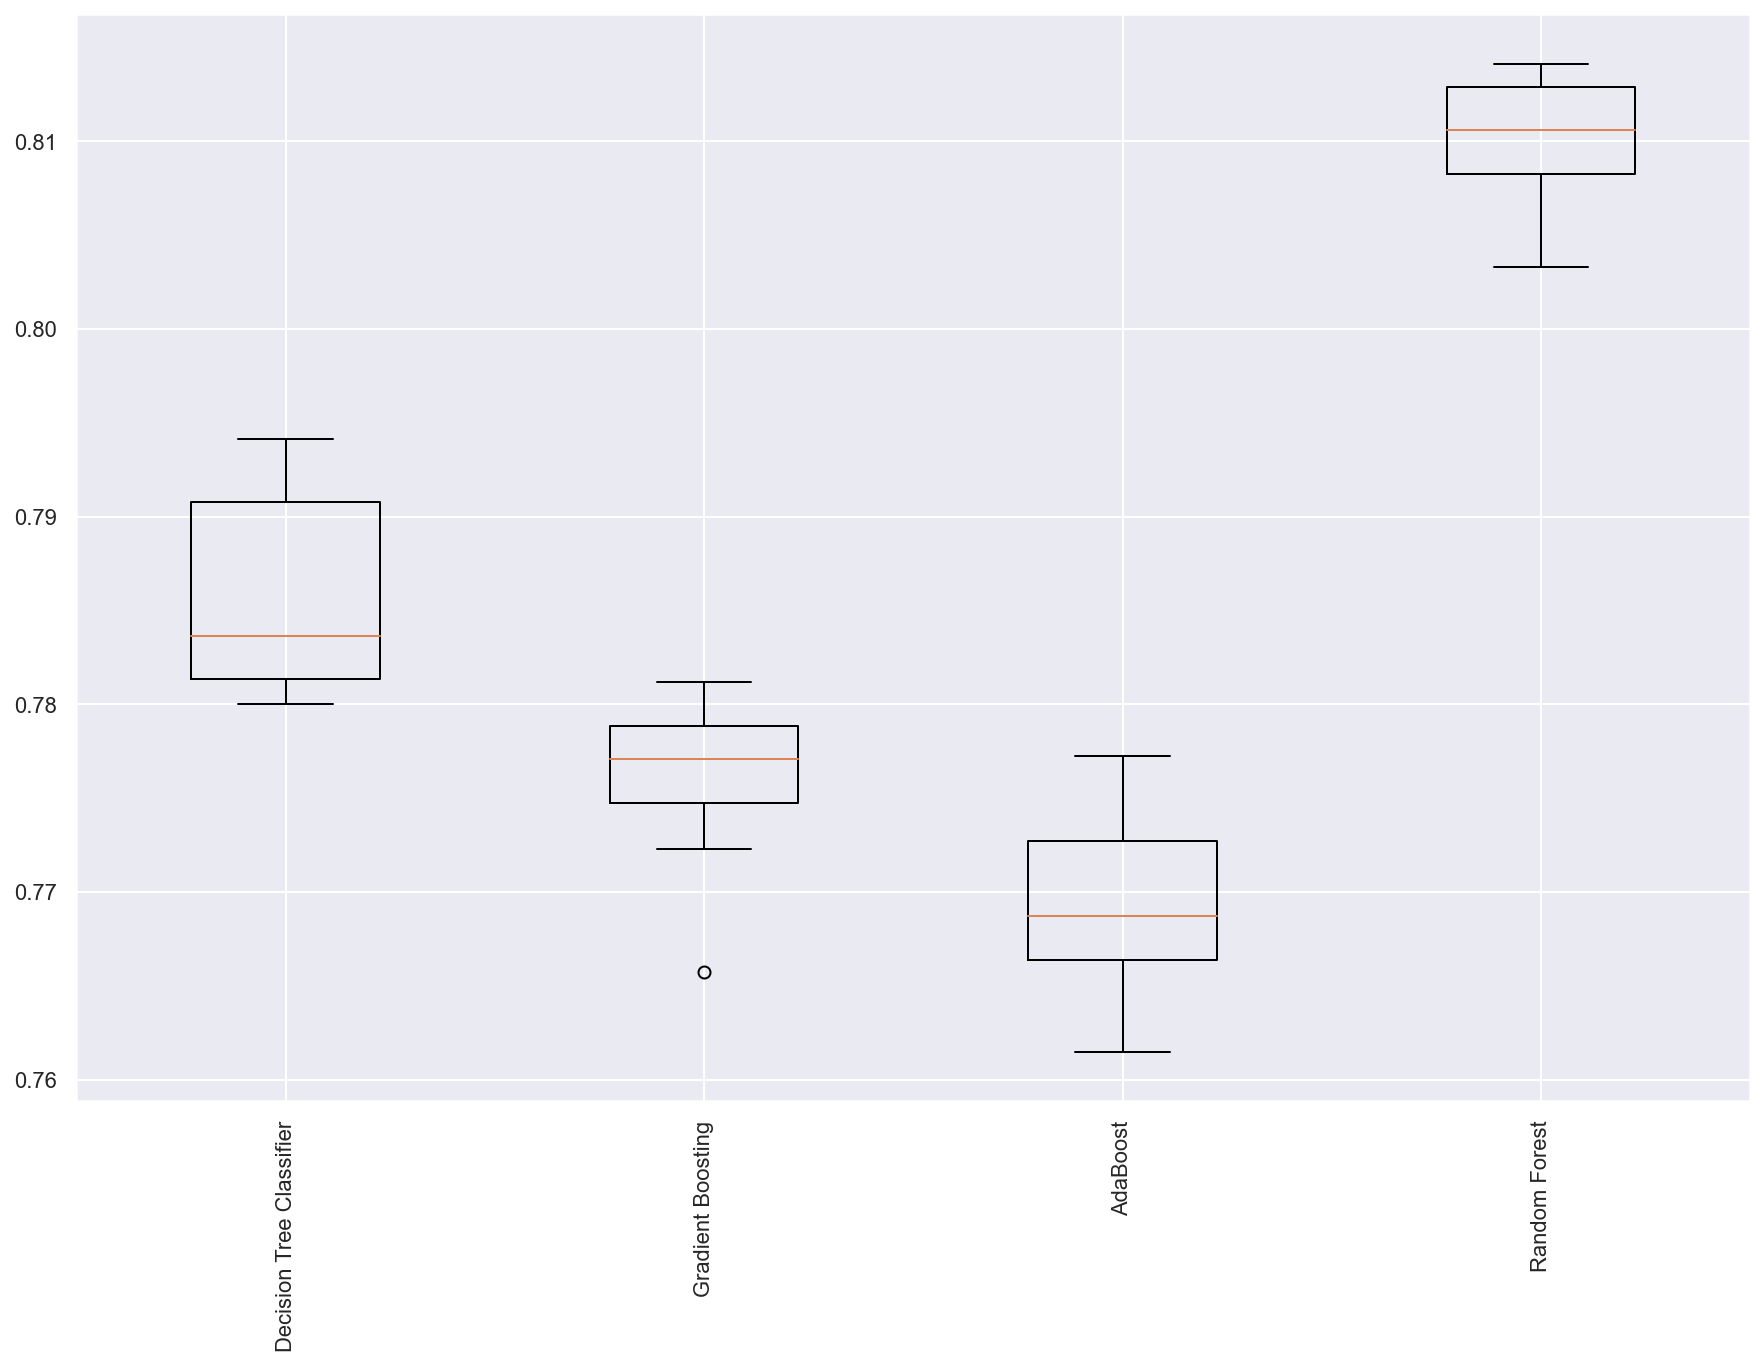

In [84]:
# 2. Create a baseline of performance and spot-check a number of different algorithms.
# select a suite of different algorithms capable of working with a binry classification problem.
# the algorithms all use default tuning parameters.

# 2.1. Evaluate algorithms using 'accuracy'

# define variance threshold           
var = VarianceThreshold(0.1)
metric = 'accuracy'
     
# define pipelines
pipelines = [('Decision Tree Classifier', Pipeline([('v', var),('m',DecisionTreeClassifier())])),
('Gradient Boosting', Pipeline([('v', var),('LR', GradientBoostingClassifier())])), 
('AdaBoost', Pipeline([('v', var),('AB', AdaBoostClassifier())])),
('Random Forest', Pipeline([('v', var),('RF', RandomForestClassifier())]))]

# get scores
results, names = list(), list()
for name, model in pipelines:
    
    cv = StratifiedKFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv= cv, scoring = metric)
    scoring_mean = round(cv_results.mean()*100, 2)
    scoring_std = round(cv_results.std()*100 , 2)
    low_interval = round(scoring_mean - 2*(scoring_std),2)
    high_interval = round(scoring_mean + 2*(scoring_std),2)
    
    names.append(name)
    results.append(cv_results)
        
    # print performance
    msg = "{} -> {} mean: {}% , std: {}% ,Low_interval: {}% , High_interval: {}% ".format(name, metric, scoring_mean, 
                                                                                  scoring_std, low_interval,high_interval )
    print(msg)
    
# plot model performance for comparison
plt.figure(figsize=(15, 10))
plt.boxplot(results, labels=names)
plt.xticks(rotation='vertical')
plt.show()

Decision Tree Classifier -> precision mean: 74.48%, std: 0.93%,Low_interval: 72.62%, High_interval: 76.34%
Gradient Boosting -> precision mean: 93.35%, std: 1.11%,Low_interval: 91.13%, High_interval: 95.57%
AdaBoost -> precision mean: 95.56%, std: 0.79%,Low_interval: 93.98%, High_interval: 97.14%
Random Forest -> precision mean: 80.33%, std: 0.75%,Low_interval: 78.83%, High_interval: 81.83%


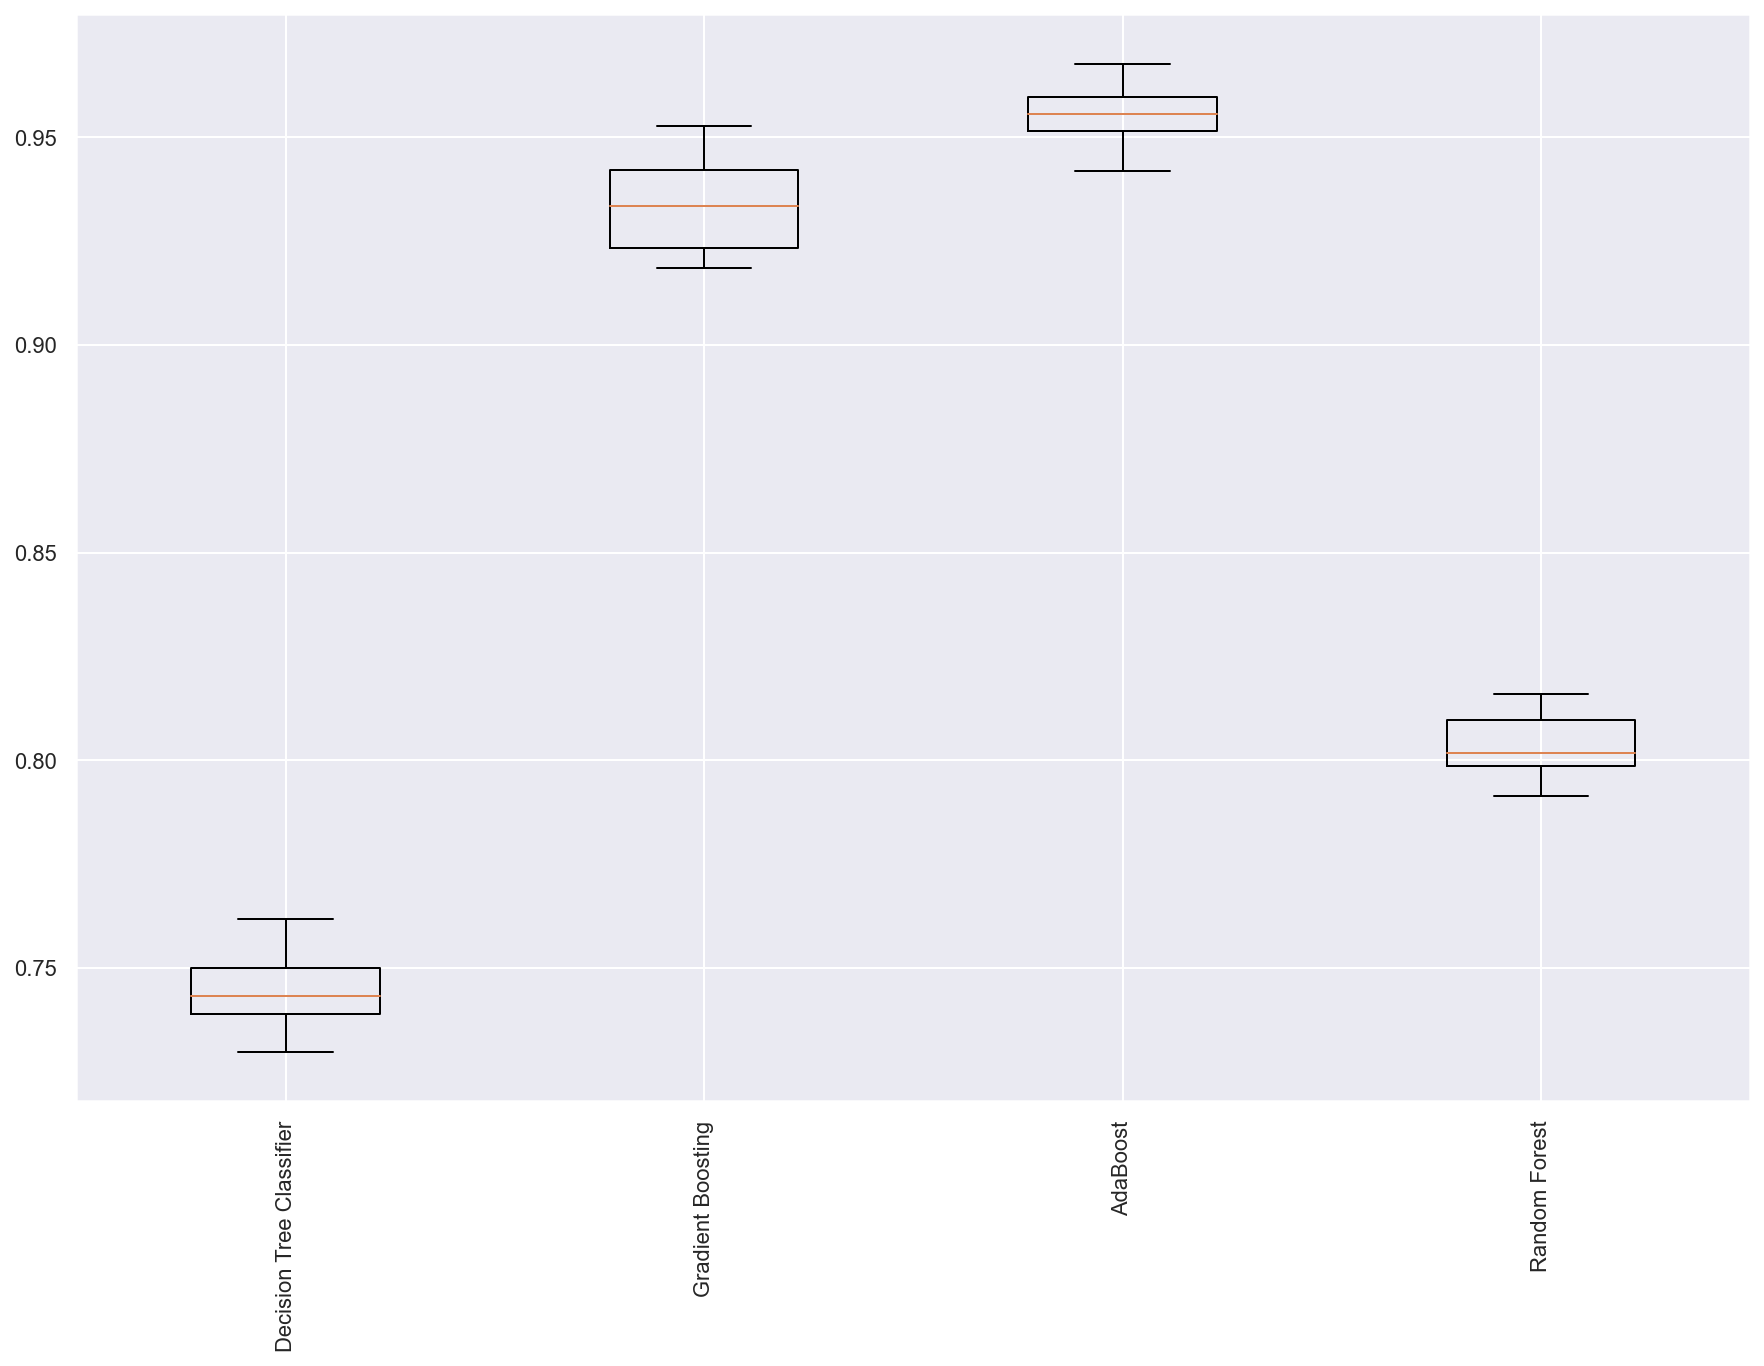

In [90]:
# 2.2. Evaluate algorithms using 'precision'

# define variance threshold            
var = VarianceThreshold(0.1)
metric = 'precision'
     
# define pipelines
pipelines = [('Decision Tree Classifier', Pipeline([('v', var),('m',DecisionTreeClassifier())])),
('Gradient Boosting', Pipeline([('v', var),('LR', GradientBoostingClassifier())])), 
('AdaBoost', Pipeline([('v', var),('AB', AdaBoostClassifier())])),
('Random Forest', Pipeline([('v', var),('RF', RandomForestClassifier())]))]

# get scores
results, names = list(), list()
for name, model in pipelines:
    
    cv = StratifiedKFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv= cv, scoring = metric)
    scoring_mean = round(cv_results.mean()*100, 2)
    scoring_std = round(cv_results.std()*100 , 2)
    low_interval = round(scoring_mean - 2*(scoring_std),2)
    high_interval = round(scoring_mean + 2*(scoring_std),2)
    
    names.append(name)
    results.append(cv_results)
        
    # print performance
    msg = "{} -> {} mean: {}%, std: {}%,Low_interval: {}%, High_interval: {}%".format(name, metric, scoring_mean, 
                                                                                  scoring_std, low_interval,high_interval )
    print(msg)
    
# plot model performance for comparison
plt.figure(figsize=(15, 10))
plt.boxplot(results, labels=names)
plt.xticks(rotation='vertical')
plt.show()

Decision Tree Classifier -> f1 mean: 74.55%, std: 0.69%,Low_interval: 73.17%, High_interval: 75.93%
Gradient Boosting -> f1 mean: 65.3%, std: 0.76%,Low_interval: 63.78%, High_interval: 66.82%
AdaBoost -> f1 mean: 63.22%, std: 1.02%,Low_interval: 61.18%, High_interval: 65.26%
Random Forest -> f1 mean: 76.23%, std: 0.56%,Low_interval: 75.11%, High_interval: 77.35%


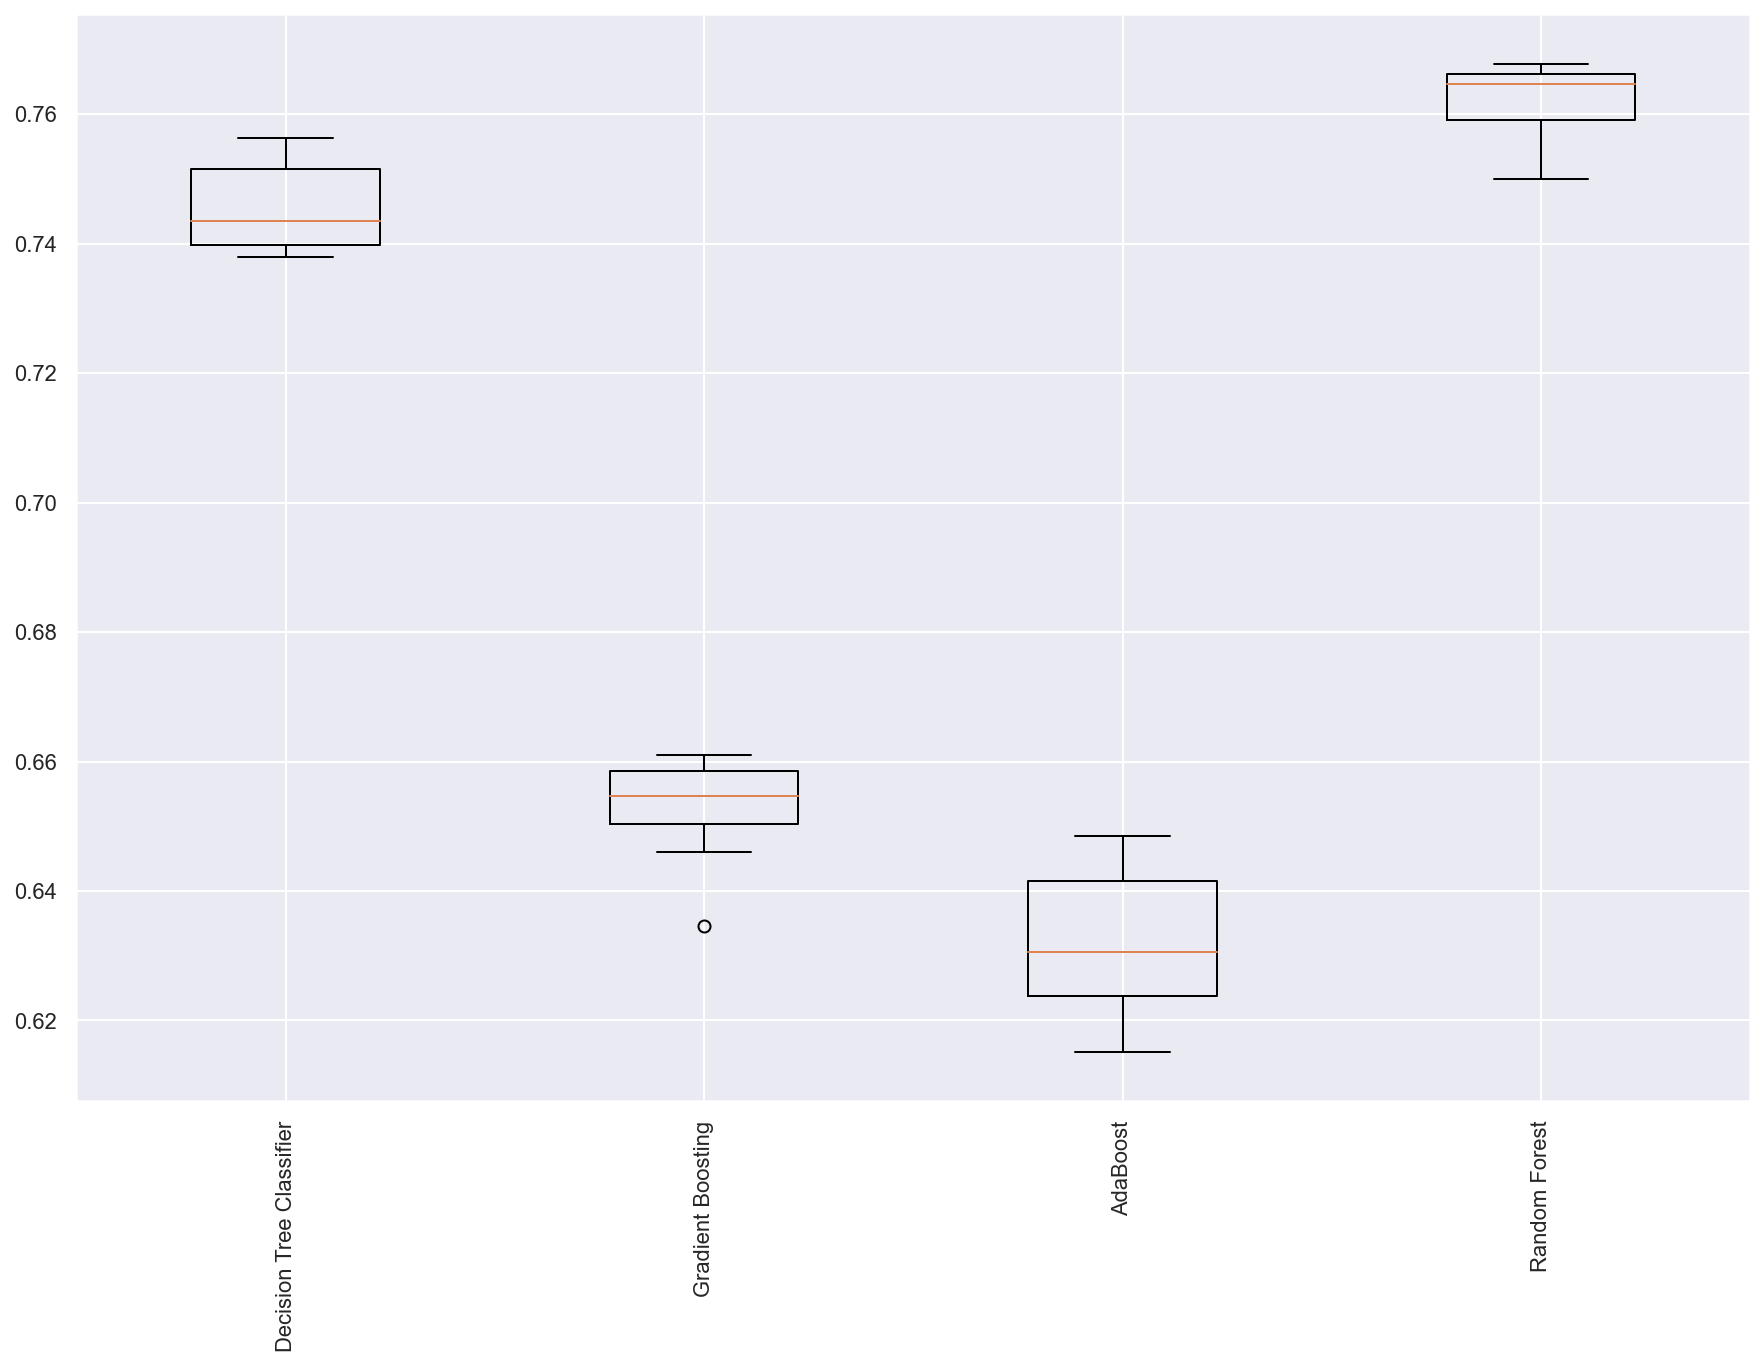

In [91]:
# 2.3. Evaluate algorithms using 'f1'

# define variance threshold         
var = VarianceThreshold(0.1)
metric = 'f1'
     
# define pipelines
pipelines = [('Decision Tree Classifier', Pipeline([('v', var),('m',DecisionTreeClassifier())])),
('Gradient Boosting', Pipeline([('v', var),('LR', GradientBoostingClassifier())])), 
('AdaBoost', Pipeline([('v', var),('AB', AdaBoostClassifier())])),
('Random Forest', Pipeline([('v', var),('RF', RandomForestClassifier())]))]

# get scores
results, names = list(), list()
for name, model in pipelines:
    
    cv = StratifiedKFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv= cv, scoring = metric)
    scoring_mean = round(cv_results.mean()*100, 2)
    scoring_std = round(cv_results.std()*100 , 2)
    low_interval = round(scoring_mean - 2*(scoring_std),2)
    high_interval = round(scoring_mean + 2*(scoring_std),2)
    
    names.append(name)
    results.append(cv_results)
        
    # print performance
    msg = "{} -> {} mean: {}%, std: {}%,Low_interval: {}%, High_interval: {}%".format(name, metric, scoring_mean, 
                                                                                  scoring_std, low_interval,high_interval )
    print(msg)
    
# plot model performance for comparison
plt.figure(figsize=(15, 10))
plt.boxplot(results, labels=names)
plt.xticks(rotation='vertical')
plt.show()

#### Feature Selection with Mutual Info coefficient

In [92]:
#Explore the features importance with Mutual coefficiente
coef = mutual_info_classif(X_train.values,y_train.values, discrete_features=True)
mutual_feature_importances = pd.DataFrame(coef, index = X_train.columns,
                                          columns=['importance']).sort_values('importance', ascending=False)
mutual_feature_importances_top = mutual_feature_importances[mutual_feature_importances['importance']>=0.01]
mutual_feature_importances_top

importance
DepositType_Non Refund          0.166750
DepositType_No Deposit          0.166642
ADR                             0.133577
LeadTime                        0.101004
PreviousCancellations           0.049306
DaysInWaitingList               0.020270
DistributionChannel_TA/TO       0.015690
CustomerType_Transient-Party    0.011289
DistributionChannel_Direct      0.011147

In [93]:
#Create a lits with the selectyed filters
selected_features_mutual = mutual_feature_importances_top.index.to_list()
selected_features_mutual

['DepositType_Non Refund     ',
 'DepositType_No Deposit     ',
 'ADR',
 'LeadTime',
 'PreviousCancellations',
 'DaysInWaitingList',
 'DistributionChannel_TA/TO',
 'CustomerType_Transient-Party',
 'DistributionChannel_Direct']

<AxesSubplot:title={'center':'Features Importance - Mutual Coefficient'}>

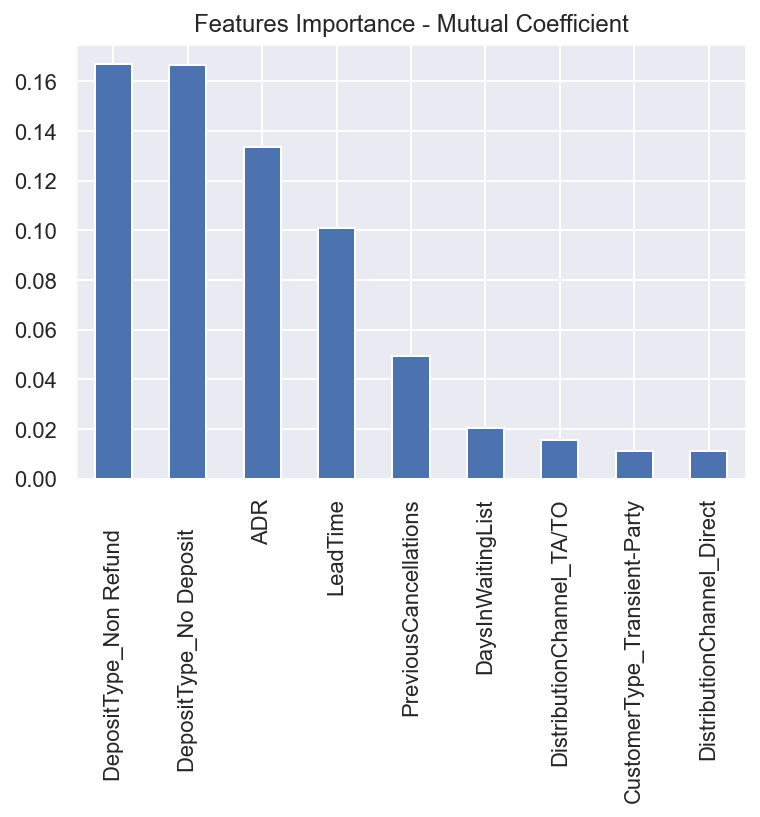

In [94]:
# Report the importance of the selected features - Mutual Coeff

mutual_feature_importances_top.plot.bar(legend = False, title = "Features Importance - Mutual Coefficient")


#### Applying the baseline with the features select by Mutual

In [95]:
#Filter X_train and X_test with the selected features
X_train_mutual = X_train[selected_features_mutual]
X_test_mutual = X_test[selected_features_mutual]

Decision Tree Classifier -> accuracy mean: 78.65% , std: 0.46% ,Low_interval: 77.73% , High_interval: 79.57% 
Gradient Boosting -> accuracy mean: 77.22% , std: 0.39% ,Low_interval: 76.44% , High_interval: 78.0% 
AdaBoost -> accuracy mean: 76.78% , std: 0.45% ,Low_interval: 75.88% , High_interval: 77.68% 
Random Forest -> accuracy mean: 79.12% , std: 0.52% ,Low_interval: 78.08% , High_interval: 80.16% 


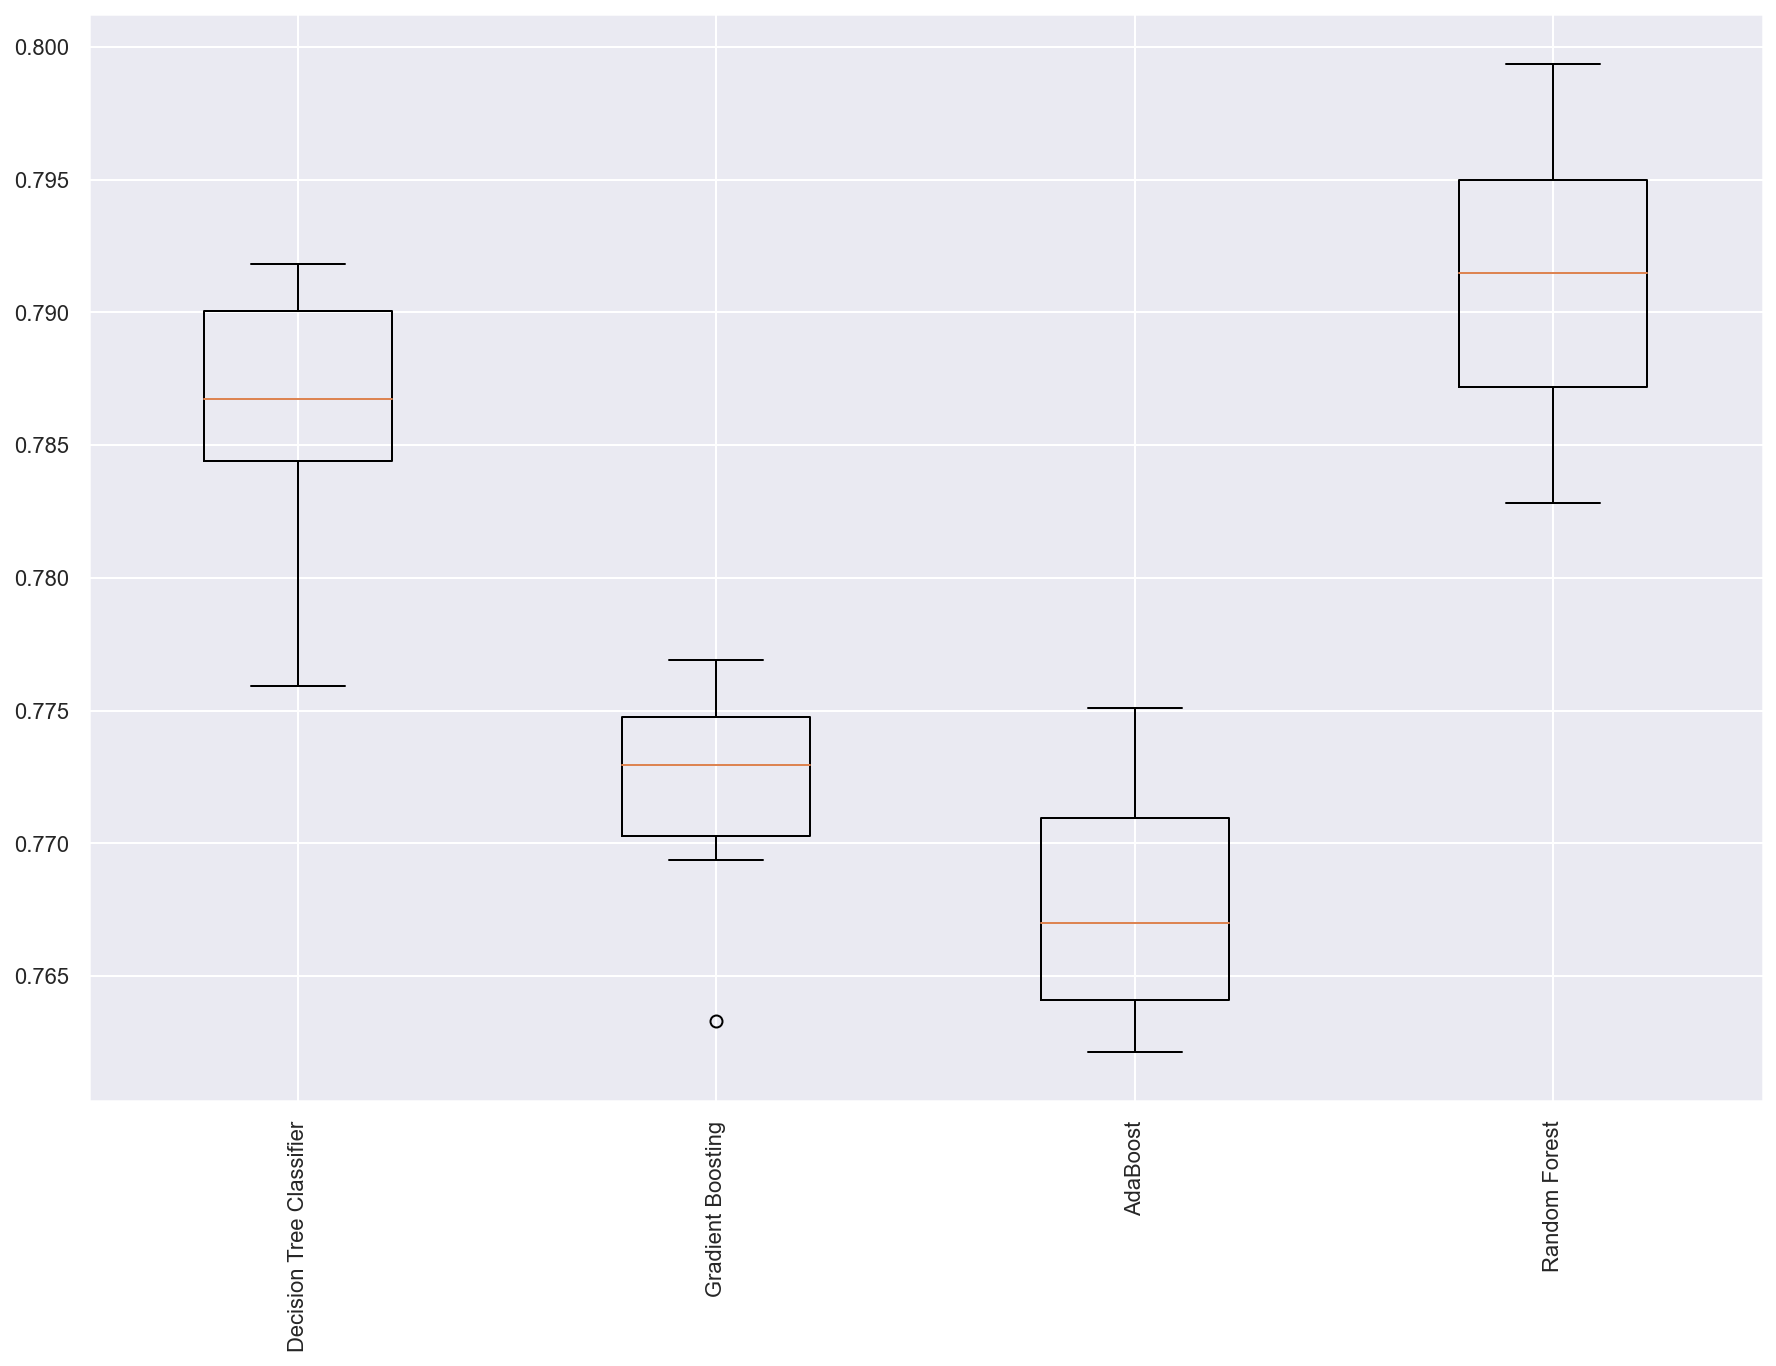

In [97]:
# 2. Create a baseline of performance and spot-check a number of different algorithms.
# select a suite of different algorithms capable of working with a binry classification problem.
# the algorithms all use default tuning parameters.

# 2.1. Evaluate algorithms using 'accuracy'

metric = 'accuracy'
     
# define pipelines
pipelines = [('Decision Tree Classifier', Pipeline([('m',DecisionTreeClassifier())])),
('Gradient Boosting', Pipeline([('LR', GradientBoostingClassifier())])), 
('AdaBoost', Pipeline([('AB', AdaBoostClassifier())])),
('Random Forest', Pipeline([('RF', RandomForestClassifier())]))]

# get scores
results, names = list(), list()
for name, model in pipelines:
    
    cv = StratifiedKFold(n_splits=10)
    cv_results = cross_val_score(model, X_train_mutual, y_train, cv= cv, scoring = metric)
    scoring_mean = round(cv_results.mean()*100, 2)
    scoring_std = round(cv_results.std()*100 , 2)
    low_interval = round(scoring_mean - 2*(scoring_std),2)
    high_interval = round(scoring_mean + 2*(scoring_std),2)
    
    names.append(name)
    results.append(cv_results)
        
    # print performance
    msg = "{} -> {} mean: {}% , std: {}% ,Low_interval: {}% , High_interval: {}% ".format(name, metric, scoring_mean, 
                                                                                  scoring_std, low_interval,high_interval )
    print(msg)
    
# plot model performance for comparison
plt.figure(figsize=(15, 10))
plt.boxplot(results, labels=names)
plt.xticks(rotation='vertical')
plt.show()

In [98]:
results_acc = results.copy()

Decision Tree Classifier -> precision mean: 76.11%, std: 0.74%,Low_interval: 74.63%, High_interval: 77.59%
Gradient Boosting -> precision mean: 95.93%, std: 0.71%,Low_interval: 94.51%, High_interval: 97.35%
AdaBoost -> precision mean: 95.88%, std: 0.59%,Low_interval: 94.7%, High_interval: 97.06%
Random Forest -> precision mean: 76.82%, std: 0.81%,Low_interval: 75.2%, High_interval: 78.44%


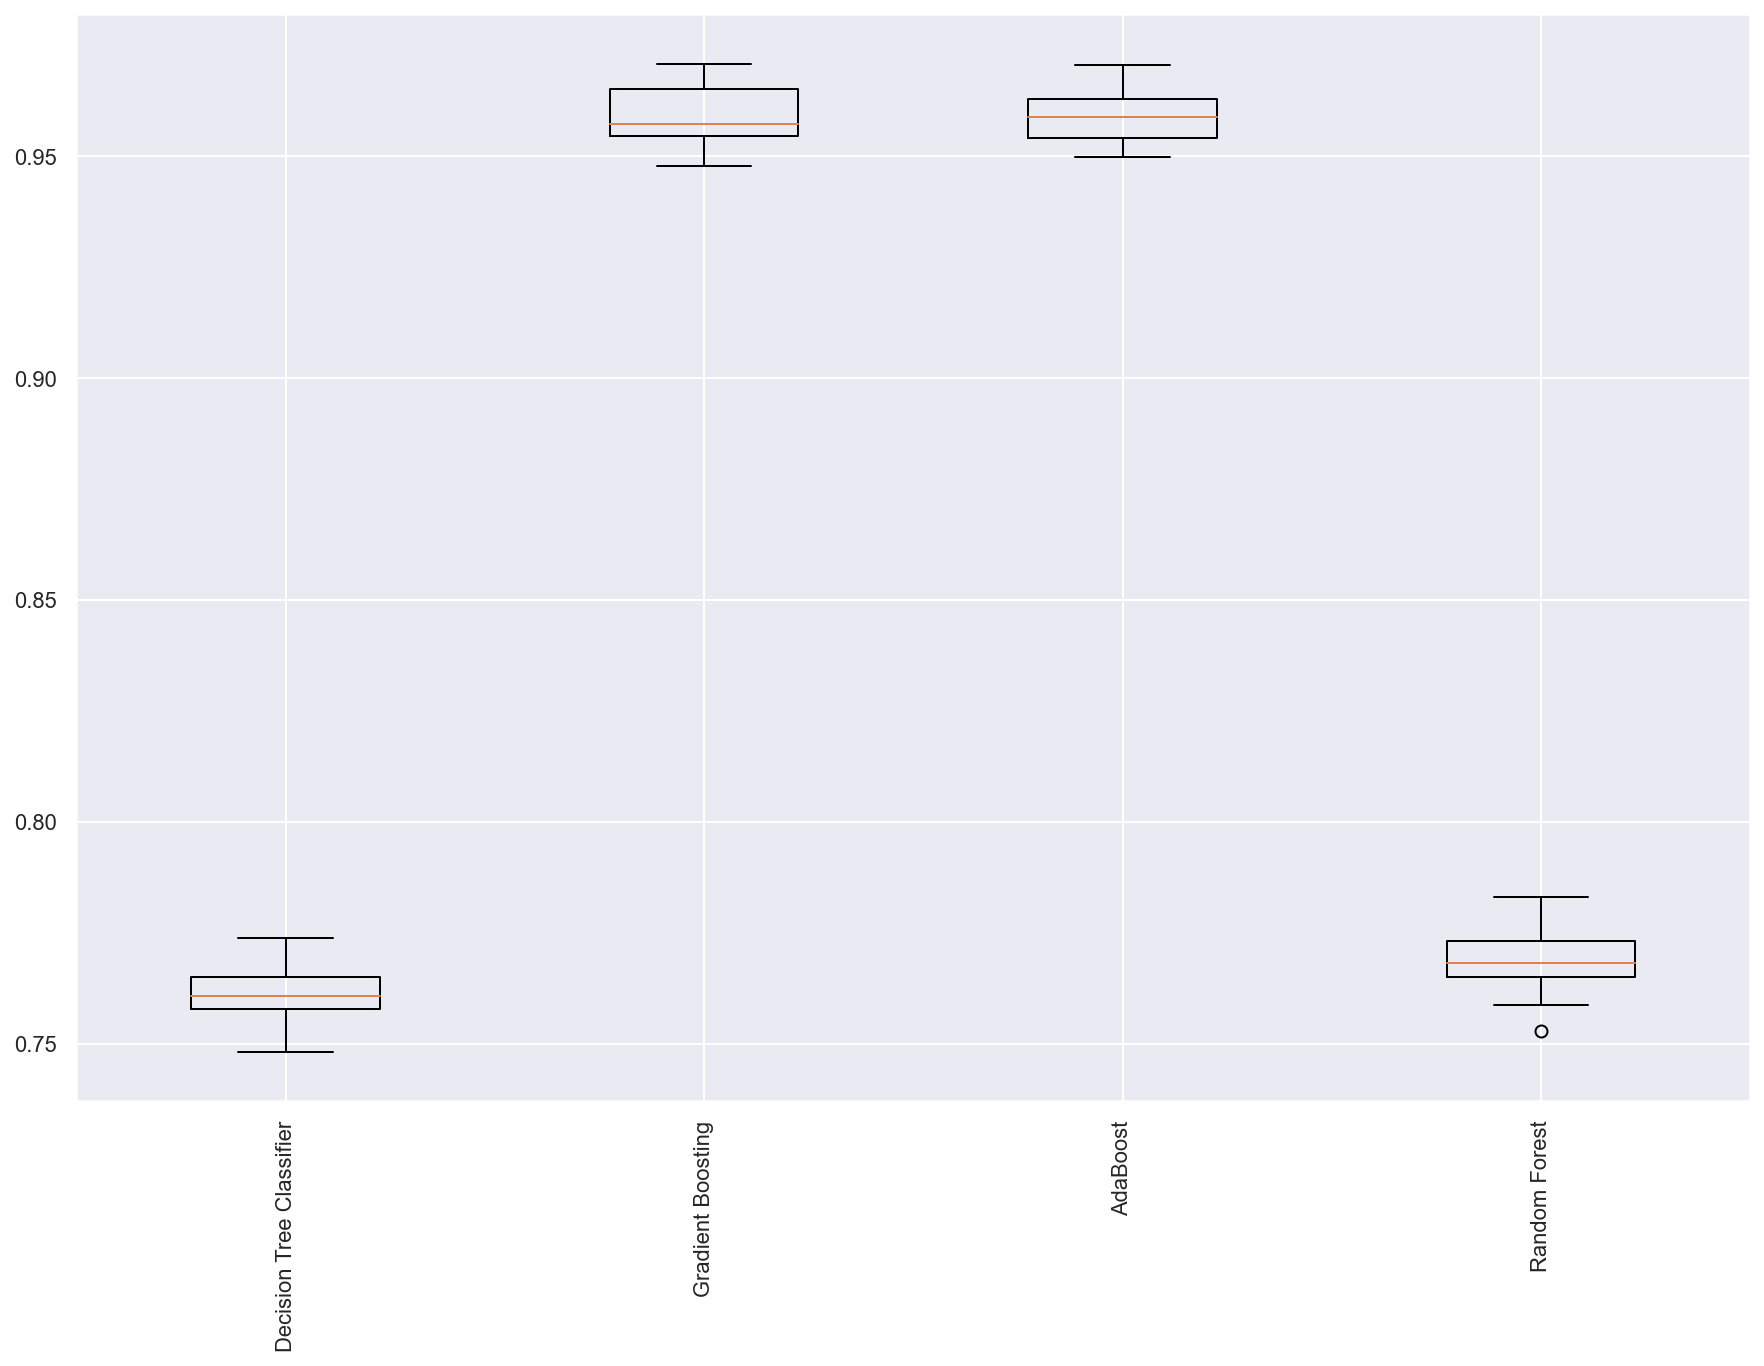

In [99]:
# 2.2. Evaluate algorithms using 'precision'

# define variance threshold            

metric = 'precision'
     
# define pipelines
pipelines = [('Decision Tree Classifier', Pipeline([('m',DecisionTreeClassifier())])),
('Gradient Boosting', Pipeline([('LR', GradientBoostingClassifier())])), 
('AdaBoost', Pipeline([('AB', AdaBoostClassifier())])),
('Random Forest', Pipeline([('RF', RandomForestClassifier())]))]

# get scores
results, names = list(), list()
for name, model in pipelines:
    
    cv = StratifiedKFold(n_splits=10)
    cv_results = cross_val_score(model, X_train_mutual, y_train, cv= cv, scoring = metric)
    scoring_mean = round(cv_results.mean()*100, 2)
    scoring_std = round(cv_results.std()*100 , 2)
    low_interval = round(scoring_mean - 2*(scoring_std),2)
    high_interval = round(scoring_mean + 2*(scoring_std),2)
    
    names.append(name)
    results.append(cv_results)
        
    # print performance
    msg = "{} -> {} mean: {}%, std: {}%,Low_interval: {}%, High_interval: {}%".format(name, metric, scoring_mean, 
                                                                                  scoring_std, low_interval,high_interval )
    print(msg)
    
# plot model performance for comparison
plt.figure(figsize=(15, 10))
plt.boxplot(results, labels=names)
plt.xticks(rotation='vertical')
plt.show()

In [100]:
results_prec = results.copy()

Decision Tree Classifier -> f1 mean: 73.8%, std: 0.71%,Low_interval: 72.38%, High_interval: 75.22%
Gradient Boosting -> f1 mean: 63.78%, std: 0.79%,Low_interval: 62.2%, High_interval: 65.36%
AdaBoost -> f1 mean: 62.82%, std: 0.92%,Low_interval: 60.98%, High_interval: 64.66%
Random Forest -> f1 mean: 74.33%, std: 0.55%,Low_interval: 73.23%, High_interval: 75.43%


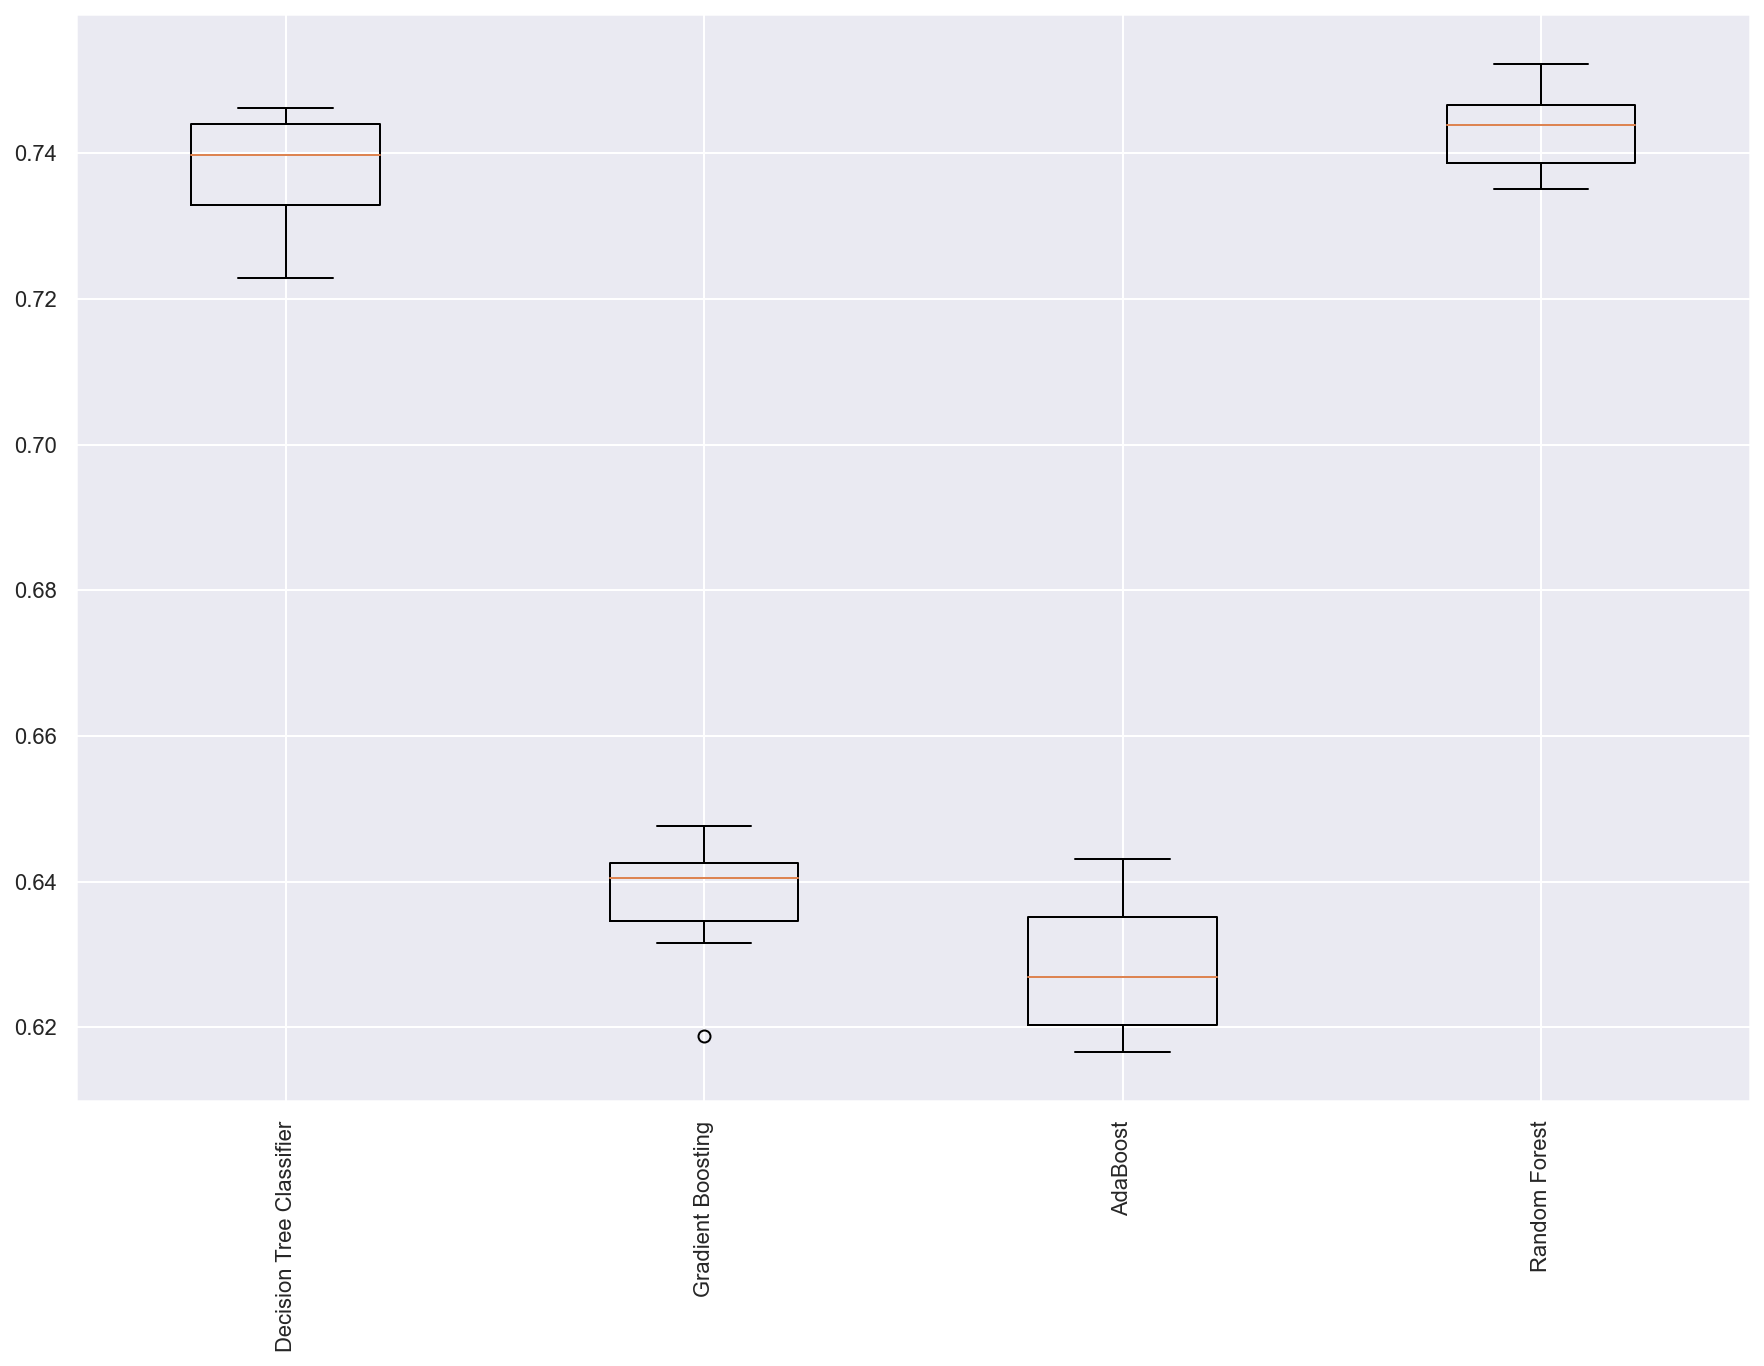

In [101]:
# 2.3. Evaluate algorithms using 'f1'

# define variance threshold         
var = VarianceThreshold(0.1)
metric = 'f1'
     
# define pipelines
pipelines = [('Decision Tree Classifier', Pipeline([('m',DecisionTreeClassifier())])),
('Gradient Boosting', Pipeline([('LR', GradientBoostingClassifier())])), 
('AdaBoost', Pipeline([('AB', AdaBoostClassifier())])),
('Random Forest', Pipeline([('RF', RandomForestClassifier())]))]

# get scores
results, names = list(), list()
for name, model in pipelines:
    
    cv = StratifiedKFold(n_splits=10)
    cv_results = cross_val_score(model, X_train_mutual, y_train, cv= cv, scoring = metric)
    scoring_mean = round(cv_results.mean()*100, 2)
    scoring_std = round(cv_results.std()*100 , 2)
    low_interval = round(scoring_mean - 2*(scoring_std),2)
    high_interval = round(scoring_mean + 2*(scoring_std),2)
    
    names.append(name)
    results.append(cv_results)
        
    # print performance
    msg = "{} -> {} mean: {}%, std: {}%,Low_interval: {}%, High_interval: {}%".format(name, metric, scoring_mean, 
                                                                                  scoring_std, low_interval,high_interval )
    print(msg)
    
# plot model performance for comparison
plt.figure(figsize=(15, 10))
plt.boxplot(results, labels=names)
plt.xticks(rotation='vertical')
plt.show()

In [102]:
results_f1 = results.copy()

In [119]:
#gROUPING THE METRICS TO GENERATE THE PLOT
DT_acc_CV = np.round(results_acc[0].mean()*100,2)
GBC_acc_CV = np.round(results_acc[1].mean()*100,2)
AB_acc_CV = np.round(results_acc[2].mean()*100,2)
RFC_acc_CV = np.round(results_acc[3].mean()*100,2)
DT_prec_CV = np.round(results_prec[0].mean()*100,2)
GBC_prec_CV = np.round(results_prec[1].mean()*100,2)
AB_prec_CV = np.round(results_prec[2].mean()*100,2)
RFC_prec_CV = np.round(results_prec[3].mean()*100,2)
DT_f1_CV = np.round(results_f1[0].mean()*100,2)
GBC_f1_CV = np.round(results_f1[1].mean()*100,2)
AB_f1_CV = np.round(results_f1[2].mean()*100,2)
RFC_f1_CV = np.round(results_f1[3].mean()*100,2)

79.12


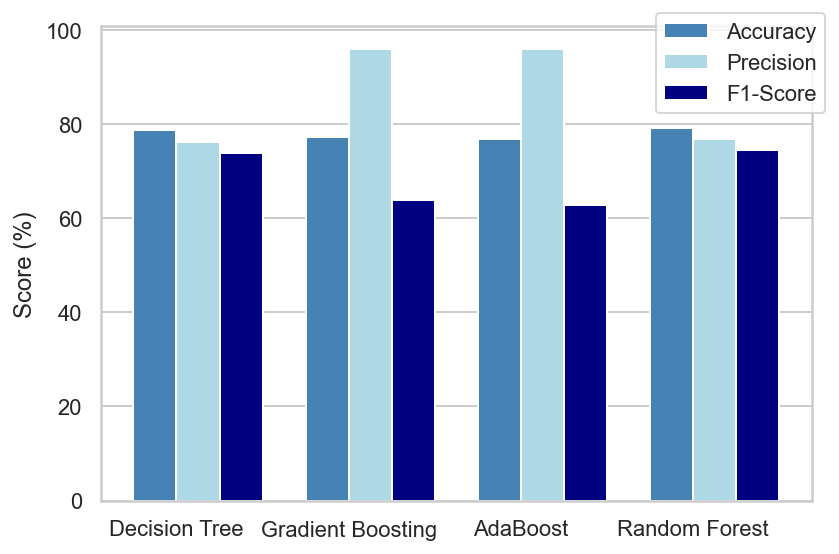

In [163]:
#sns.set(whitegrid)
labels = ['Decision Tree', 'Gradient Boosting','AdaBoost', 'Random Forest' ]
data1 = [DT_acc_CV, GBC_acc_CV, AB_acc_CV, RFC_acc_CV]
data2 = [DT_prec_CV, GBC_prec_CV, AB_prec_CV, RFC_prec_CV]
data3 = [DT_f1_CV, GBC_f1_CV, AB_f1_CV, RFC_f1_CV]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, data1, width, color = 'steelblue', label='Accuracy')
rects2 = ax.bar(x + width/2, data2, width, color = 'lightblue', label='Precision')
rects3 = ax.bar(x + width/2*3, data3, width, color = 'navy', label='F1-Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score (%)')
#ax.set_title('Models Score')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper center', bbox_to_anchor=(0.9, 1.05))
ax.set(facecolor = 'white', )

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

#autolabel(rects1)
#autolabel(rects2)
sns.set(style='whitegrid')        
fig.tight_layout()
plt.grid(axis = 'x')
plt.show()


#### Applying RFC in train and test datasets with the features selected.

#### Random Forest

In [103]:
# Applying the  model and check results
modelRF = RandomForestClassifier(random_state = 5)
modelRF.fit(X_train_mutual, y_train)

# predict the results on train dataset
RFC_y_train_pred = modelRF.predict(X_train_mutual)

# print results
print('___________________________________________________________________________________________________________')
print(' TRAIN - Random Forest Classifier')
print('-----------------------------------------------------------------------------------------------------------')
print('- Accuracy score:', accuracy_score(y_train, RFC_y_train_pred))
print('- Precision score:', precision_score(y_train, RFC_y_train_pred))
print("\n- Classification report:\n", classification_report(y_train, RFC_y_train_pred))

# predict the results on test dataset
RFC_y_test_pred = modelRF.predict(X_test_mutual)

# print results
print('___________________________________________________________________________________________________________')
print(' TEST - Random Forest Classifier')
print('-----------------------------------------------------------------------------------------------------------')
print('- Accuracy score:', accuracy_score(y_test, RFC_y_test_pred))
print('- Precision score:', precision_score(y_test, RFC_y_test_pred))
print("\n- Classification report:\n", classification_report(y_test, RFC_y_test_pred))

___________________________________________________________________________________________________________
 TRAIN - Random Forest Classifier
-----------------------------------------------------------------------------------------------------------
- Accuracy score: 0.9383858267716535
- Precision score: 0.945275863475105

- Classification report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95     35365
           1       0.95      0.91      0.93     25595

    accuracy                           0.94     60960
   macro avg       0.94      0.93      0.94     60960
weighted avg       0.94      0.94      0.94     60960

___________________________________________________________________________________________________________
 TEST - Random Forest Classifier
-----------------------------------------------------------------------------------------------------------
- Accuracy score: 0.7993438320209973
- Precision score: 0.778594089163466

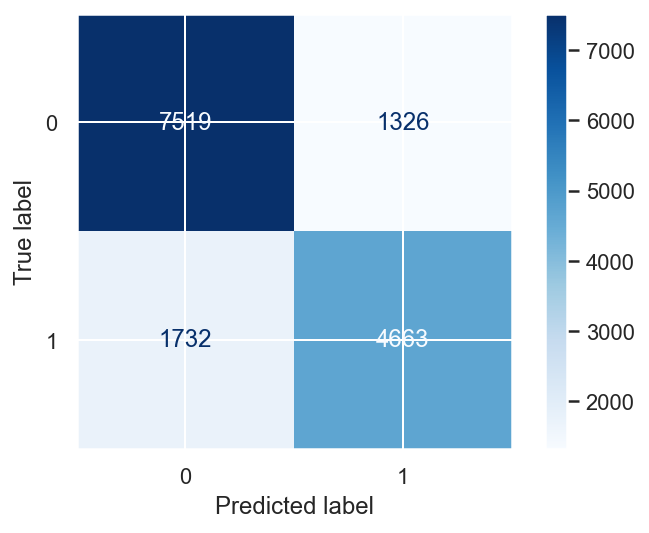

In [104]:
# Non-normalized Confusion Matrix - Random Forest
plot_confusion_matrix(modelRF,X_test_mutual,y_test, cmap='Blues')
plt.show()

In [105]:
# Applying the  model and check results
modelRF_ent = RandomForestClassifier(random_state = 5, criterion='entropy')
modelRF_ent.fit(X_train_mutual, y_train)

# predict the results on train dataset
RFC_y_train_pred = modelRF_ent.predict(X_train_mutual)

# print results
print('___________________________________________________________________________________________________________')
print(' TRAIN - Random Forest Classifier')
print('-----------------------------------------------------------------------------------------------------------')
print('- Accuracy score:', accuracy_score(y_train, RFC_y_train_pred))
print('- Precision score:', precision_score(y_train, RFC_y_train_pred))
print("\n- Classification report:\n", classification_report(y_train, RFC_y_train_pred))

# predict the results on test dataset
RFC_y_test_pred = modelRF_ent.predict(X_test_mutual)

# print results
print('___________________________________________________________________________________________________________')
print(' TEST - Random Forest Classifier')
print('-----------------------------------------------------------------------------------------------------------')
print('- Accuracy score:', accuracy_score(y_test, RFC_y_test_pred))
print('- Precision score:', precision_score(y_test, RFC_y_test_pred))
print("\n- Classification report:\n", classification_report(y_test, RFC_y_test_pred))

___________________________________________________________________________________________________________
 TRAIN - Random Forest Classifier
-----------------------------------------------------------------------------------------------------------
- Accuracy score: 0.9384022309711286
- Precision score: 0.945278094927418

- Classification report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95     35365
           1       0.95      0.91      0.93     25595

    accuracy                           0.94     60960
   macro avg       0.94      0.93      0.94     60960
weighted avg       0.94      0.94      0.94     60960

___________________________________________________________________________________________________________
 TEST - Random Forest Classifier
-----------------------------------------------------------------------------------------------------------
- Accuracy score: 0.7989501312335958
- Precision score: 0.779305718598021

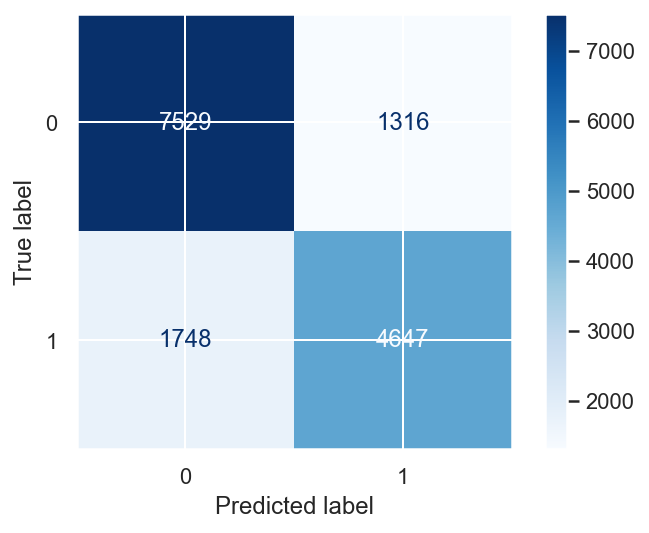

In [106]:
# Non-normalized Confusion Matrix - Random Forest
plot_confusion_matrix(modelRF_ent,X_test_mutual,y_test, cmap='Blues')
plt.show()

In [107]:
# Applying the  model and check results
modelRF_300trees = RandomForestClassifier(n_estimators = 300, random_state = 5)
modelRF_300trees.fit(X_train_mutual, y_train)

# predict the results on train dataset
RFC_y_train_pred = modelRF_300trees.predict(X_train_mutual)

# print results
print('___________________________________________________________________________________________________________')
print(' TRAIN - Random Forest Classifier')
print('-----------------------------------------------------------------------------------------------------------')
print('- Accuracy score:', accuracy_score(y_train, RFC_y_train_pred))
print('- Precision score:', precision_score(y_train, RFC_y_train_pred))
print("\n- Classification report:\n", classification_report(y_train, RFC_y_train_pred))

# predict the results on test dataset
RFC_y_test_pred = modelRF_300trees.predict(X_test_mutual)

# print results
print('___________________________________________________________________________________________________________')
print(' TEST - Random Forest Classifier')
print('-----------------------------------------------------------------------------------------------------------')
print('- Accuracy score:', accuracy_score(y_test, RFC_y_test_pred))
print('- Precision score:', precision_score(y_test, RFC_y_test_pred))
print("\n- Classification report:\n", classification_report(y_test, RFC_y_test_pred))

___________________________________________________________________________________________________________
 TRAIN - Random Forest Classifier
-----------------------------------------------------------------------------------------------------------
- Accuracy score: 0.9384350393700788
- Precision score: 0.9464840556009811

- Classification report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95     35365
           1       0.95      0.90      0.93     25595

    accuracy                           0.94     60960
   macro avg       0.94      0.93      0.94     60960
weighted avg       0.94      0.94      0.94     60960

___________________________________________________________________________________________________________
 TEST - Random Forest Classifier
-----------------------------------------------------------------------------------------------------------
- Accuracy score: 0.7992782152230972
- Precision score: 0.77911646586345

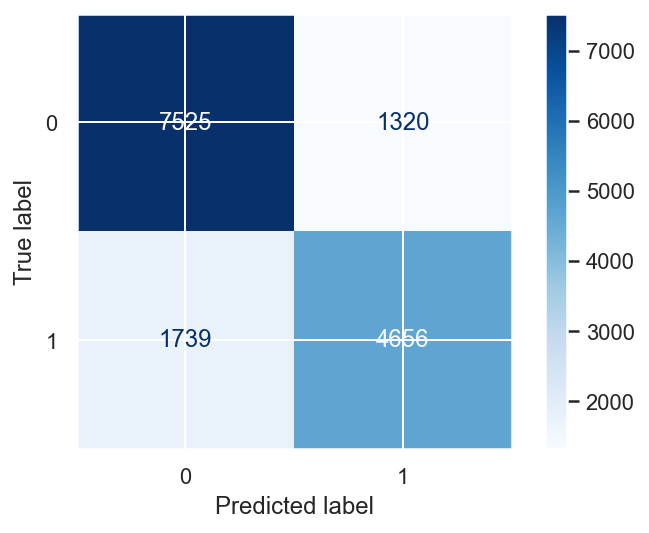

In [108]:
# Non-normalized Confusion Matrix - Random Forest
plot_confusion_matrix(modelRF_300trees,X_test_mutual,y_test, cmap='Blues')
plt.show()

In [109]:
# Applying the  model and check results
modelRF_b = RandomForestClassifier(bootstrap = False, random_state = 5)
modelRF_b.fit(X_train_mutual, y_train)

# predict the results on train dataset
RFC_y_train_pred = modelRF_b.predict(X_train_mutual)

# print results
print('___________________________________________________________________________________________________________')
print(' TRAIN - Random Forest Classifier')
print('-----------------------------------------------------------------------------------------------------------')
print('- Accuracy score:', accuracy_score(y_train, RFC_y_train_pred))
print('- Precision score:', precision_score(y_train, RFC_y_train_pred))
print("\n- Classification report:\n", classification_report(y_train, RFC_y_train_pred))

# predict the results on test dataset
RFC_y_test_pred = modelRF_b.predict(X_test_mutual)

# print results
print('___________________________________________________________________________________________________________')
print(' TEST - Random Forest Classifier')
print('-----------------------------------------------------------------------------------------------------------')
print('- Accuracy score:', accuracy_score(y_test, RFC_y_test_pred))
print('- Precision score:', precision_score(y_test, RFC_y_test_pred))
print("\n- Classification report:\n", classification_report(y_test, RFC_y_test_pred))

___________________________________________________________________________________________________________
 TRAIN - Random Forest Classifier
-----------------------------------------------------------------------------------------------------------
- Accuracy score: 0.9384350393700788
- Precision score: 0.9675485914889973

- Classification report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     35365
           1       0.97      0.88      0.92     25595

    accuracy                           0.94     60960
   macro avg       0.94      0.93      0.94     60960
weighted avg       0.94      0.94      0.94     60960

___________________________________________________________________________________________________________
 TEST - Random Forest Classifier
-----------------------------------------------------------------------------------------------------------
- Accuracy score: 0.7956692913385827
- Precision score: 0.77659753835778

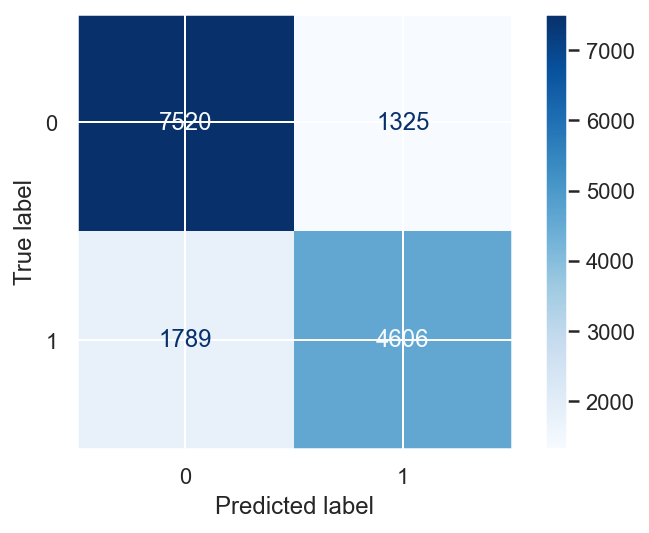

In [110]:
# Non-normalized Confusion Matrix - Random Forest
plot_confusion_matrix(modelRF_b,X_test_mutual,y_test, cmap='Blues')
plt.show()

In [174]:
# Applying the  model and check results
modelRF_s = RandomForestClassifier(max_samples = 0.7, random_state = 5)
modelRF_s.fit(X_train_mutual, y_train)

# predict the results on train dataset
RFC_y_train_pred = modelRF_s.predict(X_train_mutual)

# print results
print('___________________________________________________________________________________________________________')
print(' TRAIN - Random Forest Classifier')
print('-----------------------------------------------------------------------------------------------------------')
print('- Accuracy score:', accuracy_score(y_train, RFC_y_train_pred))
print('- Precision score:', precision_score(y_train, RFC_y_train_pred))
print("\n- Classification report:\n", classification_report(y_train, RFC_y_train_pred))

# predict the results on test dataset
RFC_y_test_pred = modelRF_s.predict(X_test_mutual)

# print results
print('___________________________________________________________________________________________________________')
print(' TEST - Random Forest Classifier')
print('-----------------------------------------------------------------------------------------------------------')
print('- Accuracy score:', round(accuracy_score(y_test, RFC_y_test_pred),2))
print('- Precision score:', round(precision_score(y_test, RFC_y_test_pred),2))
print("\n- Classification report:\n", classification_report(y_test, RFC_y_test_pred))

___________________________________________________________________________________________________________
 TRAIN - Random Forest Classifier
-----------------------------------------------------------------------------------------------------------
- Accuracy score: 0.9335629921259843
- Precision score: 0.9466395787553381

- Classification report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94     35365
           1       0.95      0.89      0.92     25595

    accuracy                           0.93     60960
   macro avg       0.94      0.93      0.93     60960
weighted avg       0.93      0.93      0.93     60960

___________________________________________________________________________________________________________
 TEST - Random Forest Classifier
-----------------------------------------------------------------------------------------------------------
- Accuracy score: 0.8
- Precision score: 0.79

- Classification report:


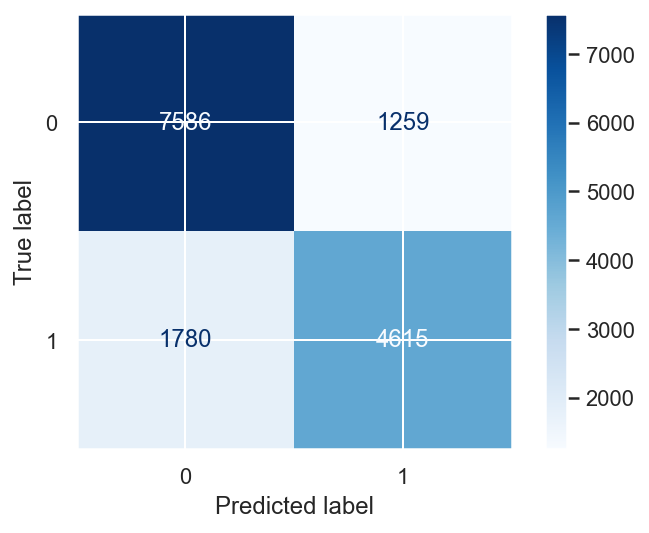

In [112]:
# Non-normalized Confusion Matrix - Random Forest
plot_confusion_matrix(modelRF_s,X_test_mutual,y_test, cmap='Blues')
plt.show()

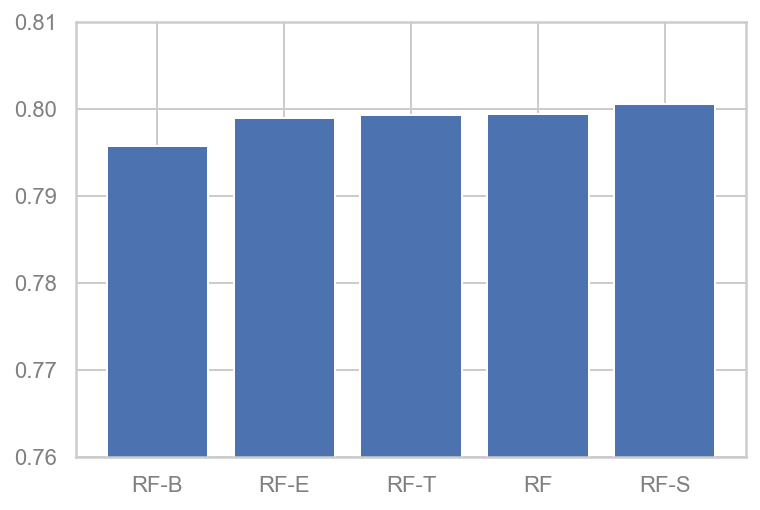

In [172]:
accuracies = [modelRF.score(X_test_mutual, y_test), modelRF_300trees.score(X_test_mutual, y_test),
              modelRF_b.score(X_test_mutual, y_test),modelRF_ent.score(X_test_mutual, y_test),
              modelRF_s.score(X_test_mutual, y_test)]
models = ['RF', 'RF-T','RF-B', 'RF-E','RF-S']
data_tuples = list(zip(models,accuracies))
data = pd.DataFrame(data_tuples)
data = data.sort_values(1)
plt.bar(data[0], data[1])
plt.xticks(color='gray')
plt.yticks(color='gray')
plt.ylim(0.76,0.81)

plt.show()

Text(0.5, 1.0, 'Best Features - RFC')

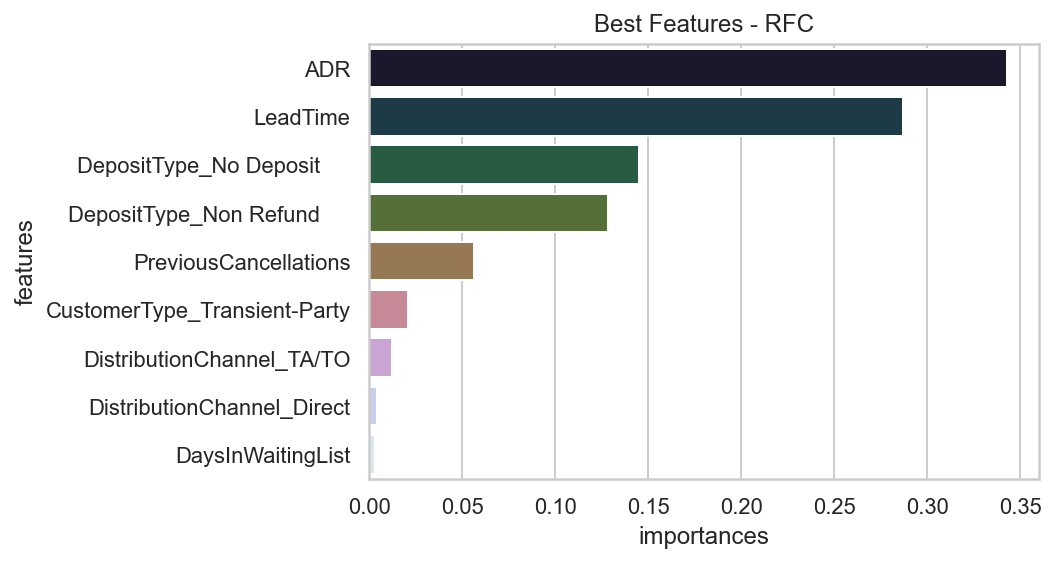

In [198]:
importances = modelRF_s.feature_importances_
features = X_train_mutual.columns
data_tuples = list(zip(importances, features))
data = pd.DataFrame(data_tuples, columns = ['importances', 'features'])
data = data.sort_values('importances', ascending = False)
sns.barplot(data['importances'], data['features'], palette = 'cubehelix', orient = 'h')
plt.title('Best Features - RFC')

<function matplotlib.pyplot.show(close=None, block=None)>

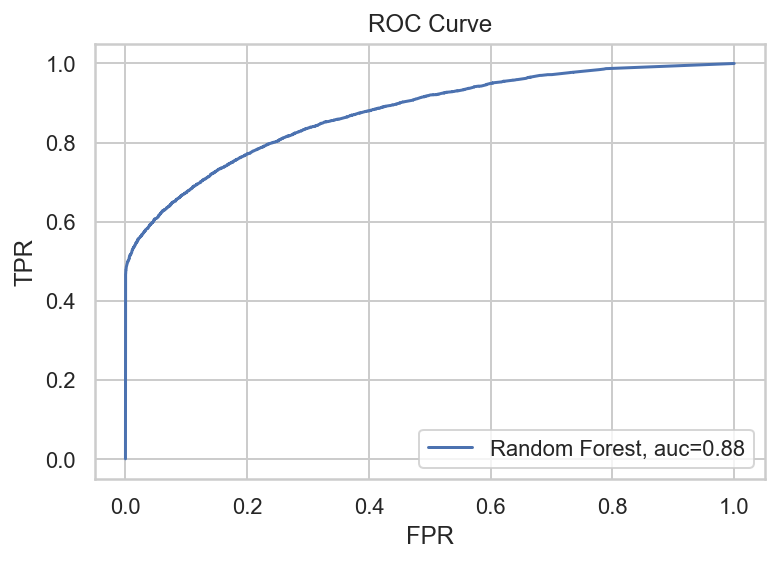

In [193]:
from sklearn import metrics
y_pred_probability = modelRF_s.predict_proba(X_test_mutual)[::,1]
fpr,tpr, _ = metrics.roc_curve(y_test,y_pred_probability)
auc = metrics.roc_auc_score(y_test,y_pred_probability)
plt.plot(fpr,tpr, label = 'Random Forest, auc='+str(round(auc,2)))
plt.title('ROC Curve')
plt.legend(loc = 4)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show

In [182]:
metric

'f1'

#### DBSCAN TENTATIVE

#### 6) DBSCAN set a point p and the density around a point can be measured by the number of points surrounding it. To measure the density around a point p, it used the topological definition of neighborhood. The 𝜀-neighborhood of a point p is the space within a radius 𝜀 > 0 centered in p. For this algorithm, it's necessary set the minimal number of points in each neighborhood (min_samples) and the size of the radius (area) of neighborhood (eps). It's considered a core point when a point there is at least the minimal points around it into your radius. Not core points are points inside the radium of a core point, but they don't have the minimal number of points around them. The noise point are points they are neither a core point and not core point. We are interest in this analyse to detect the noise points. The 2 plots bellow are to find the eps to run the dbscan algorithm.  

In [ ]:
#Elbow plot to find the number of neighbors
inert = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df1_out)
    inert.append(kmeanModel.inertia_)
#Define name for x axis and y axis
plt.xlabel("clusters")
plt.ylabel("avg_square distance")
plt.plot(K,inert,"o-",color="blue")

In [ ]:
# K-distance graph to find out the right eps value
#Use the number of neighbors detect in the elbow plot. 
neigh = NearestNeighbors(n_neighbors=2)
neigh.fit(df1_out)
distances, _ = neigh.kneighbors(df1_out)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.figure(1, figsize=(20, 15))
plt.show()

In [ ]:
# After finding the eps value, we run the DBSCAN algorithm
dbscan = DBSCAN(eps=1, min_samples=30, n_jobs=-1)
dbscan_labels = dbscan.fit_predict(df1_out)
dbscan_outliers = pd.Series(dbscan.fit_predict(df1_out), index = df1_out.index)
dbscan_outliers.value_counts(normalize = True)